In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [218]:
linelevel_pre_false = pd.read_json('linelevel_pre_false.json')
linelevel_pre_true = pd.read_json('linelevel_pre_true.json')

linelevel_attribution_false = pd.read_json('linelevel_attribution_false.json')
linelevel_attribution_true = pd.read_json('linelevel_attribution_true.json')
linelevel_attribution_false['value'] = linelevel_attribution_false['value'] * 10
linelevel_attribution_true['value'] = linelevel_attribution_true['value'] * 10

In [219]:
len(linelevel_pre_false),len(linelevel_attribution_false)

(965, 6079)

In [220]:
len(linelevel_pre_true),len(linelevel_attribution_true)

(2174, 14274)

In [221]:
def get_list_print_df(df, name):
    col_list = []
    for i in range(len(df)):
        if df.loc[i]['key'] == name:
            attr = df.loc[i]['value']
            col_list.append(attr)
    df = pd.DataFrame(col_list, columns=[name])
    return df

In [222]:
def get_all_df(df):
    unique_values = df['key'].value_counts().index
    plt.figure(figsize=(40,10))

    for uniq in unique_values:
        attr = get_list_print_df(df, uniq)

        sns.kdeplot(data=attr, x=uniq, label=uniq, bw_adjust=8)

        xticks = np.arange(min(attr[uniq]), max(attr[uniq]), step=0.5)
        plt.xticks(xticks)
        # 添加图例
    plt.legend()
    plt.axvline(x=0, color='r', linestyle='--')  # 在 x=0 的位置添加一条红色的虚线
    plt.show()

true

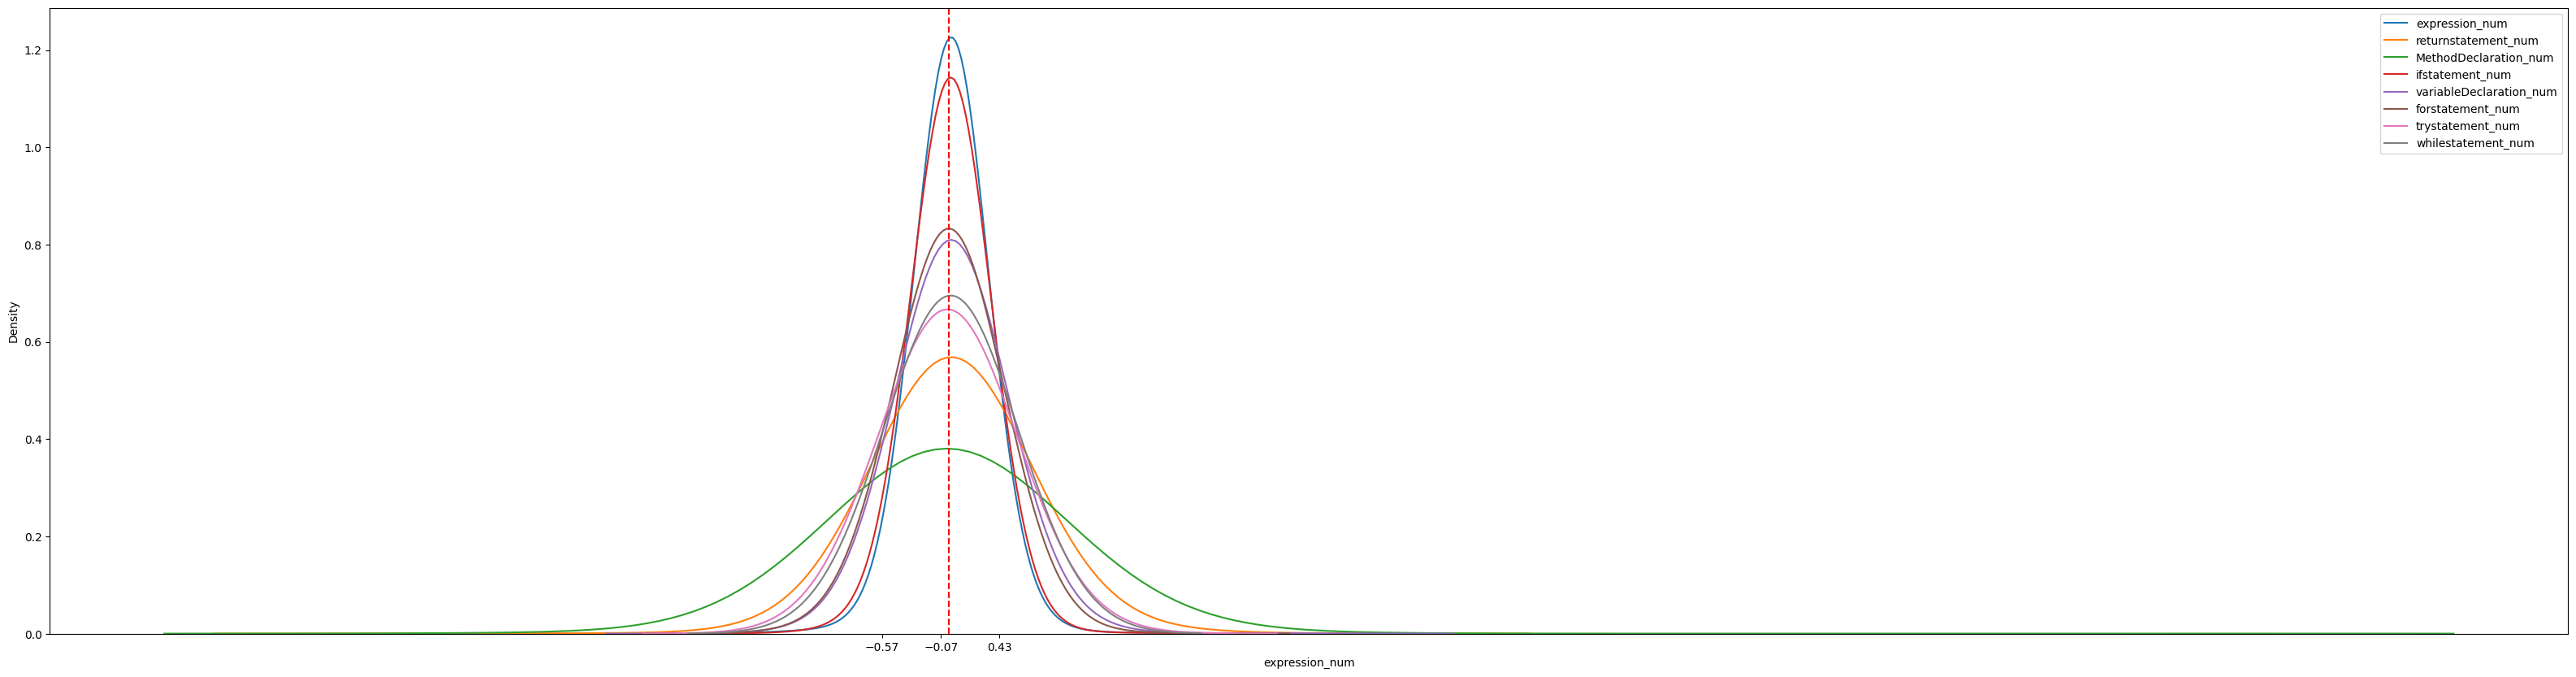

In [223]:
get_all_df(linelevel_attribution_true)

In [224]:
def get_all_df_for_boxplot(df):
    unique_values = df['key'].value_counts().index
    plt.figure(figsize=(40,10))

    num_plots = len(unique_values)
    num_cols = num_plots  # 每行显示的子图数量
    num_rows = 1   # 计算行数
    
    for i, uniq in enumerate(unique_values):
        attr = get_list_print_df(df, uniq)
        
        # 创建子图
        plt.subplot(num_rows, num_cols, i + 1)
        attr.boxplot(column=uniq)
        plt.title(uniq)


    plt.legend()
    plt.axhline(y=0, color='r', linestyle='--')
    plt.tight_layout()  # 调整子图间距
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


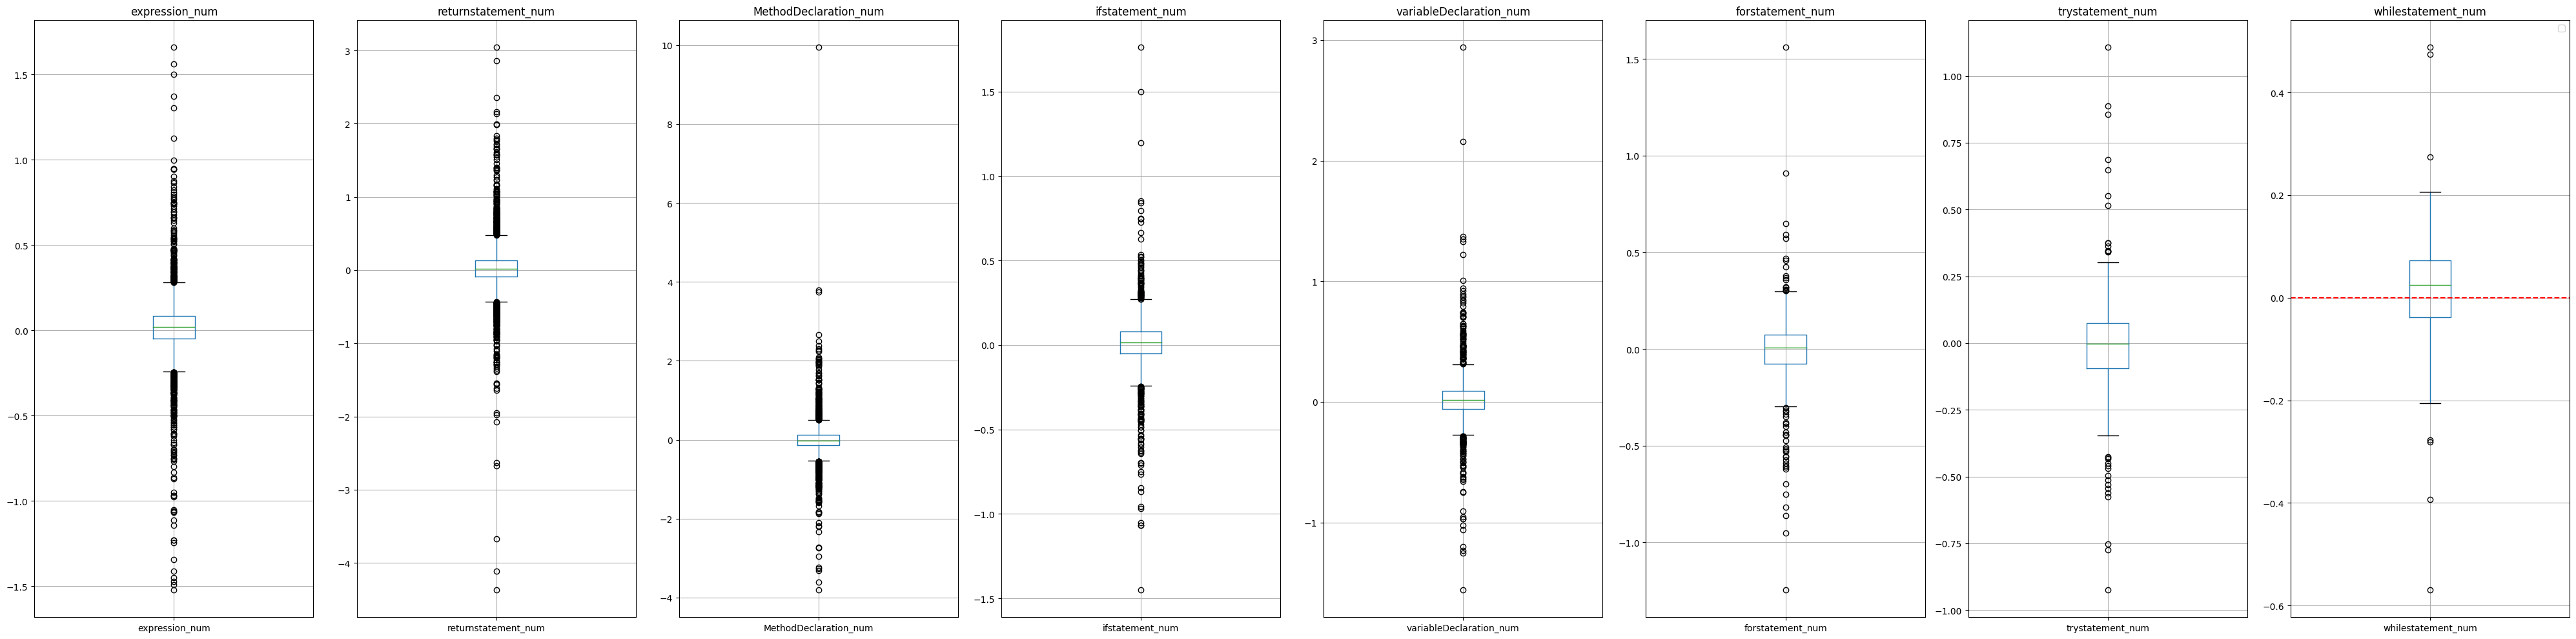

In [225]:
get_all_df_for_boxplot(linelevel_attribution_true)

In [226]:
def get_all_colunm_df(df):
    unique_values = df['key'].value_counts().index
    result = pd.DataFrame()

    for uniq in unique_values:
        attr = get_list_print_df(df, uniq)
        result = pd.concat([result, attr], axis=1)
        
    return result 

In [227]:
all_colunm_df_true = get_all_colunm_df(linelevel_attribution_true)
all_colunm_df_true.head()

expression_num  returnstatement_num  MethodDeclaration_num  \
0        0.191197            -0.026822               0.013571   
1        0.048397             0.131420               0.412345   
2        0.034493             0.166484               0.211686   
3       -0.050494             0.035449               0.023537   
4        0.023919             0.232338              -0.060836   

   ifstatement_num  variableDeclaration_num  forstatement_num  \
0         0.224068                 0.191197          0.131420   
1         0.267434                 0.048397          0.222676   
2         0.034493                 0.266712               NaN   
3         0.136808                 0.166484               NaN   
4        -0.031834                -0.050494               NaN   

   trystatement_num  whilestatement_num  
0         -0.087215           -0.135945  
1          0.005061            0.487758  
2          0.145905            0.199363  
3         -0.041888           -0.011297  
4         -0.003133            0.038573

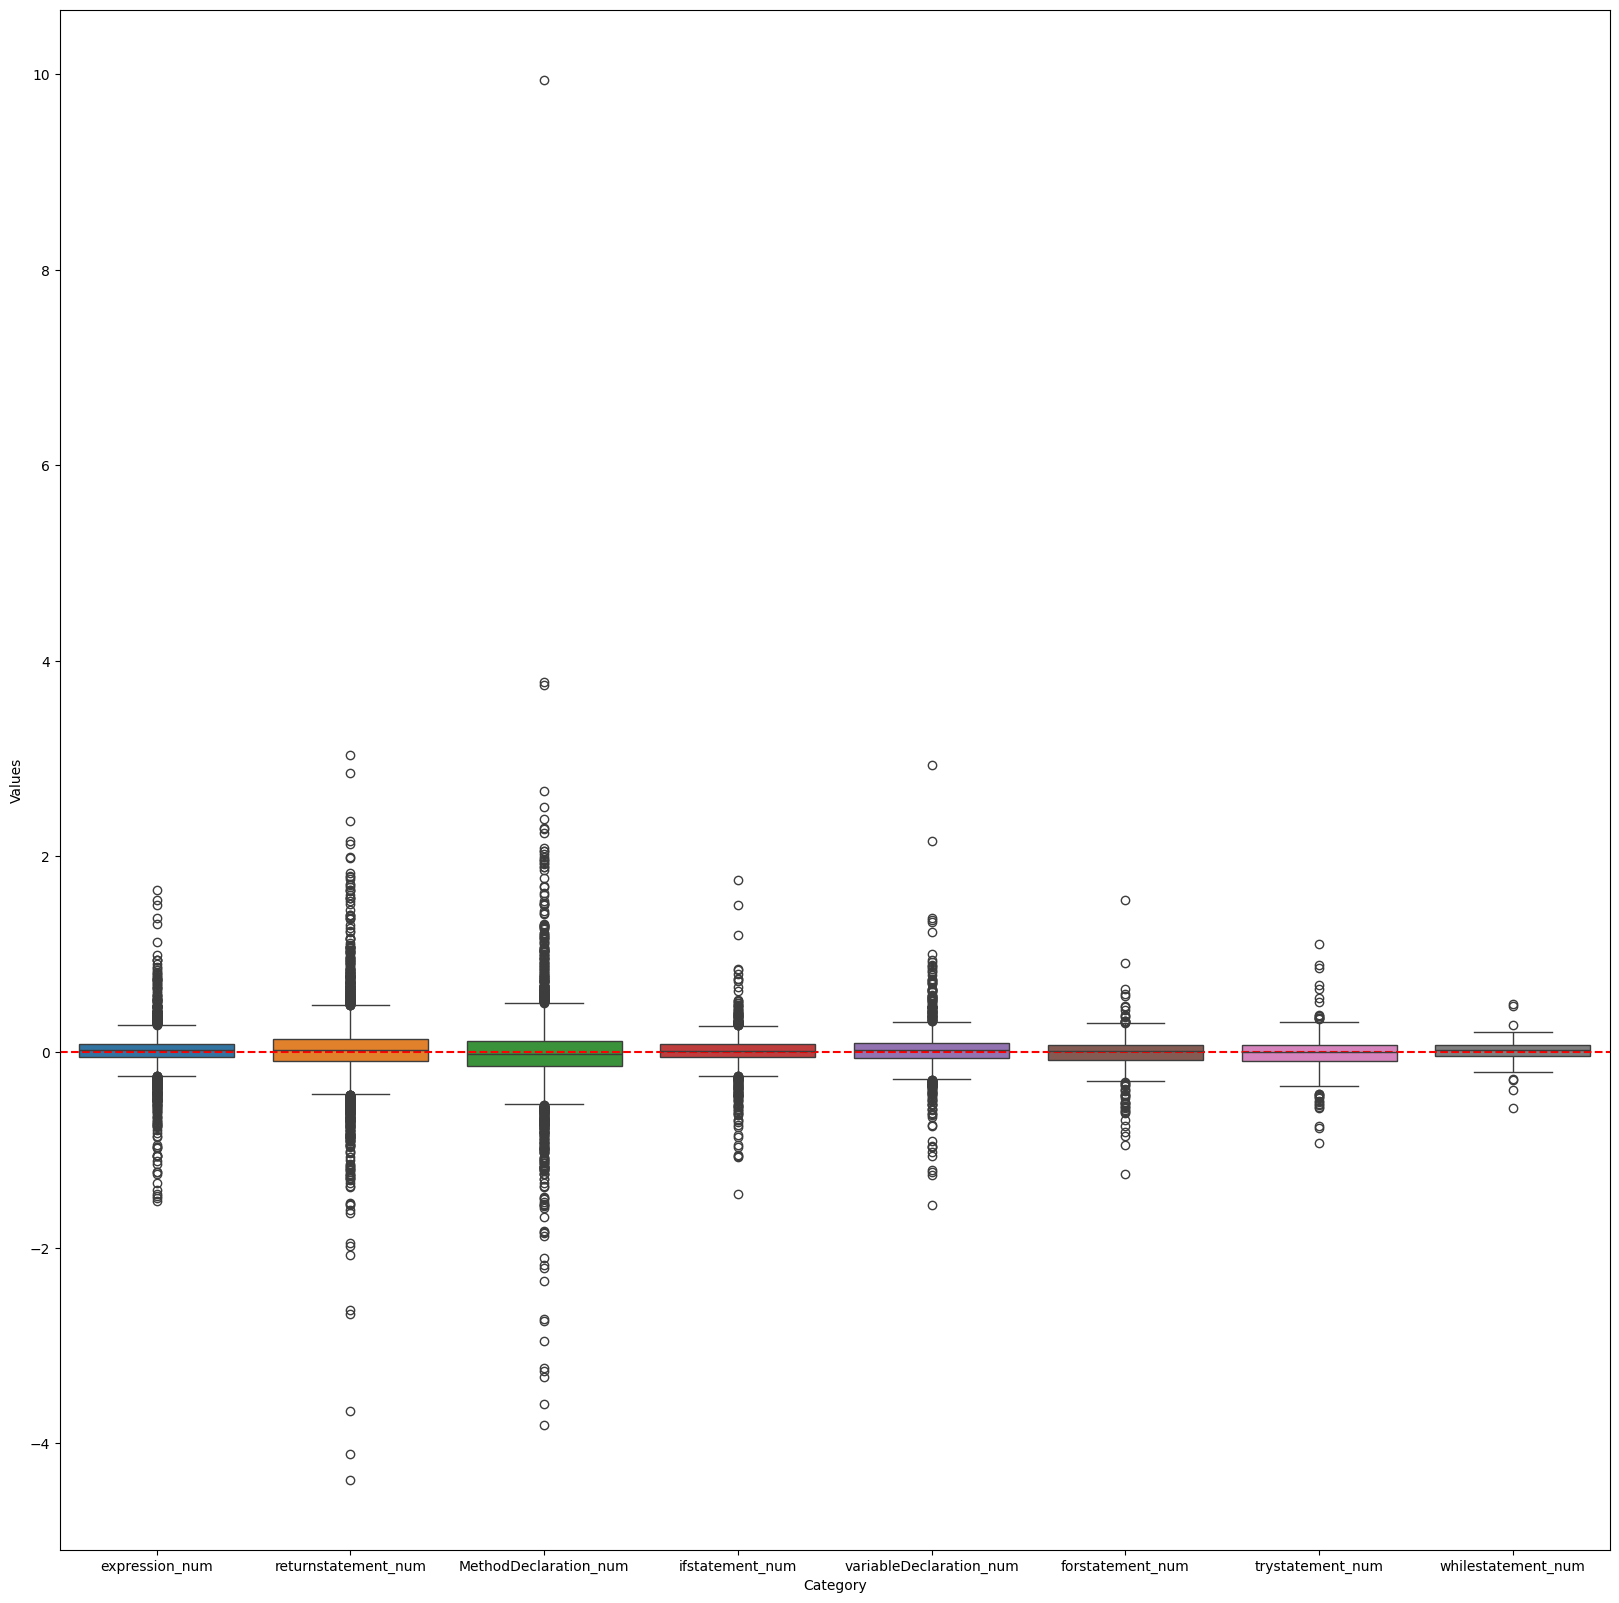

In [228]:
# 绘制箱线图
plt.figure(figsize=(20, 20))
sns.boxplot(data=all_colunm_df_true)

plt.xlabel('Category')
plt.ylabel('Values')

plt.axhline(y=0, color='r', linestyle='--')
plt.show()

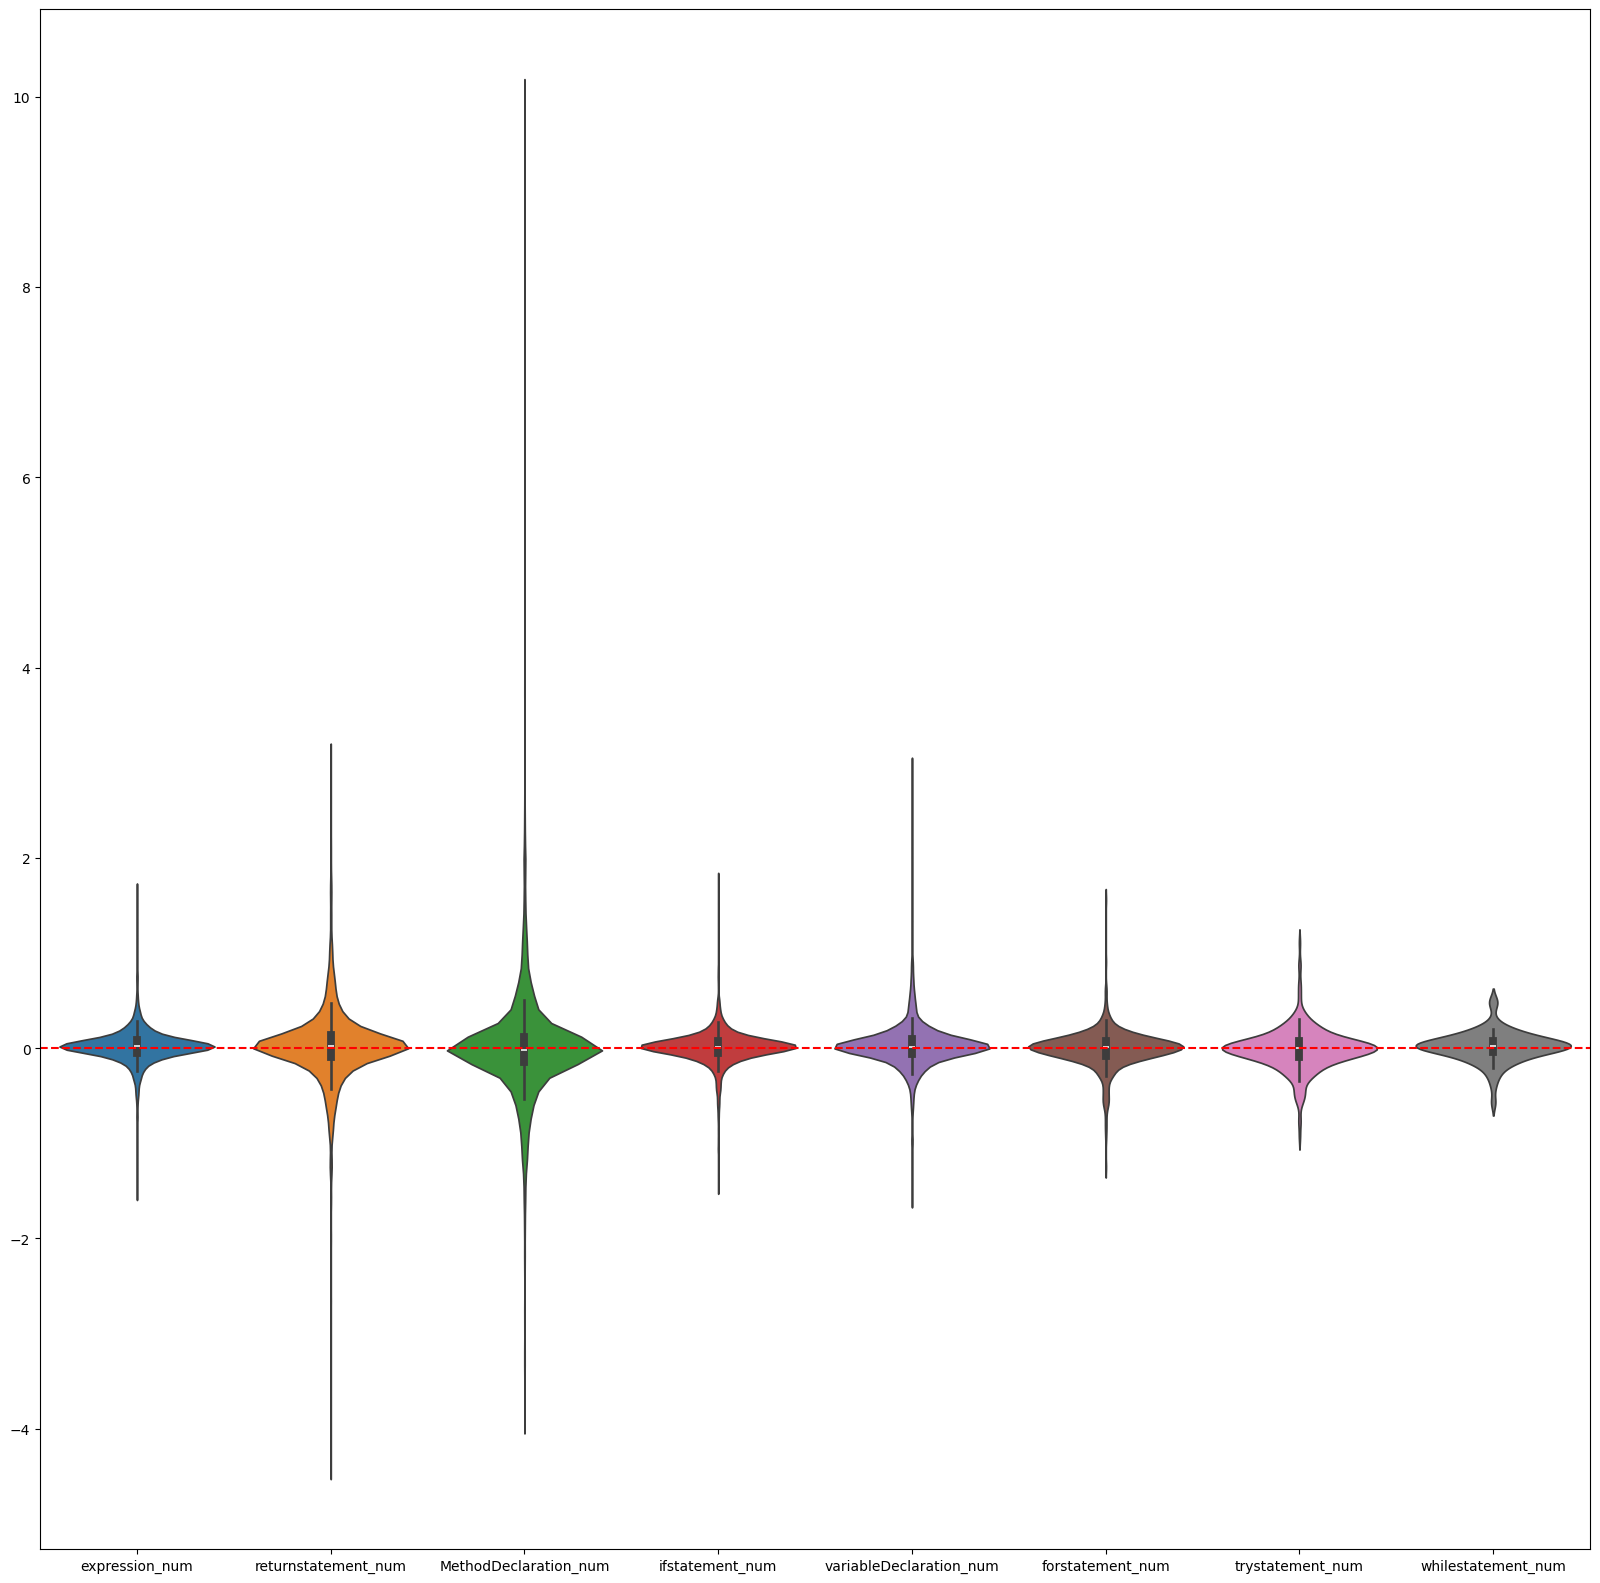

In [229]:
# 数据 x 10  小提琴图
plt.figure(figsize=(20,20))
sns.violinplot(data=all_colunm_df_true)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [230]:
abs_df = all_colunm_df_true.abs()
mean_abs_values = abs_df.mean()
mean_abs_values

expression_num             0.114826
returnstatement_num        0.226889
MethodDeclaration_num      0.298500
ifstatement_num            0.107835
variableDeclaration_num    0.140652
forstatement_num           0.121815
trystatement_num           0.145207
whilestatement_num         0.108463
dtype: float64

In [231]:
mean_value = all_colunm_df_true.mean()
mean_value 

expression_num             0.014970
returnstatement_num        0.021527
MethodDeclaration_num     -0.010310
ifstatement_num            0.008851
variableDeclaration_num    0.025459
forstatement_num          -0.010513
trystatement_num          -0.011785
whilestatement_num         0.012638
dtype: float64

In [232]:
std_value = all_colunm_df_true.std()
std_value

expression_num             0.191643
returnstatement_num        0.393347
MethodDeclaration_num      0.558137
ifstatement_num            0.179088
variableDeclaration_num    0.243739
forstatement_num           0.199029
trystatement_num           0.220961
whilestatement_num         0.160666
dtype: float64

In [233]:
# 画出和论文一样的图
def get_paper_picture(df):
    
    # 图形大小，随时改
    plt.figure(figsize=(40, 8))

    # 定义颜色
    palette = sns.color_palette('pastel')

    # 画图
    for i, col in enumerate(df.columns):
        # 小提琴
        sns.violinplot(x=np.full(len(df), i), y=df[col], inner=None, hue=np.full(len(df), i), palette=[palette[i]], legend=False)
        # 散点图
        sns.stripplot(x=np.full(len(df), i) - 0.5, y=df[col], color=palette[i], alpha=0.5, jitter=0.2, legend=False)
        # 箱线图
        sns.boxplot(x=np.full(len(df), i), y=df[col], width=0.2, showcaps=True, showfliers=False,  # 不显示异常值
                    boxprops=dict(facecolor='none', edgecolor='black', linewidth=1.5),  # 更改边框线条粗细
                    whiskerprops=dict(color='black', linewidth=2), 
                    capprops=dict(color='black', linewidth=2), 
                    medianprops=dict(color='#8B8B83', linewidth=2), 
                    flierprops=dict(marker='o', color='red', alpha=0.5))
    # 均值线
    mean_value = df.mean()
    print(mean_value)
    new_mean_value = [item for item in mean_value for _ in range(2)]
    for i in range(len(new_mean_value)):
        if i % 2 == 0:
            plt.plot([i - 0.5, i + 0.5], [new_mean_value[i], new_mean_value[i]], color='blue', linestyle='--', linewidth=2)
        else:
            plt.plot([i - 0.3, i + 0.3], [new_mean_value[i], new_mean_value[i]], color='blue', linestyle='--', linewidth=2)



    # 横坐标标签
    label_name = [item for sublist in [[x, f'{x}_num'] for x in df.columns] for item in sublist]
    ax = plt.gca()
    ax.set_xticks(np.arange(len(label_name)))  # 设置标签的位置
    ax.set_xticklabels(label_name)

    plt.ylabel('value')

    plt.show()


expression_num             0.014970
returnstatement_num        0.021527
MethodDeclaration_num     -0.010310
ifstatement_num            0.008851
variableDeclaration_num    0.025459
forstatement_num          -0.010513
trystatement_num          -0.011785
whilestatement_num         0.012638
dtype: float64


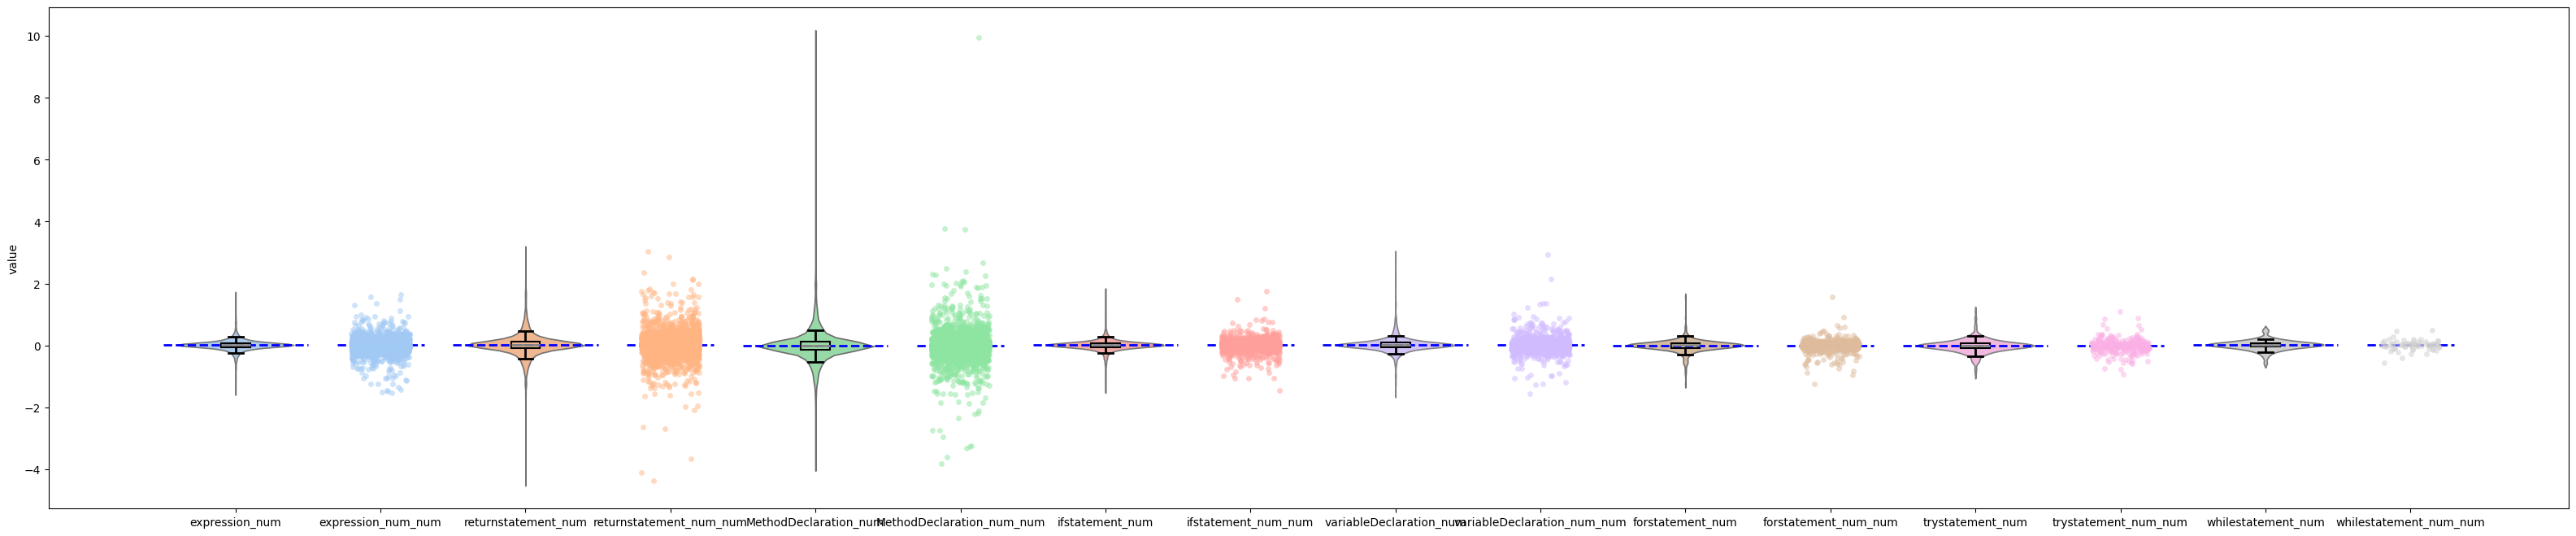

In [234]:
get_paper_picture(all_colunm_df_true)

In [235]:
# 画出和论文一样的图
def get_paper_picture_other_color(df):
    
    # 图形大小，随时改
    plt.figure(figsize=(40, 8))

    # 使用 'viridis' colormap
    colormap = plt.colormaps['viridis']
    palette = [colormap(i) for i in np.linspace(0, 1, len(df.columns))]
    
    # 画图
    for i, col in enumerate(df.columns):
        # 小提琴
        sns.violinplot(x=np.full(len(df), i), y=df[col], inner=None, hue=np.full(len(df), i), palette=[palette[i]], legend=False)
        # 散点图
        sns.stripplot(x=np.full(len(df), i) - 0.5, y=df[col], color=palette[i], alpha=0.5, jitter=0.2, legend=False)
        # 箱线图
        sns.boxplot(x=np.full(len(df), i), y=df[col], width=0.2, showcaps=True, showfliers=False,  # 不显示异常值
                    boxprops=dict(facecolor='none', edgecolor='black', linewidth=1.5),  # 更改边框线条粗细
                    whiskerprops=dict(color='black', linewidth=2), 
                    capprops=dict(color='black', linewidth=2), 
                    medianprops=dict(color='#8B8B83', linewidth=2), 
                    flierprops=dict(marker='o', color='red', alpha=0.5))
    # 均值线
    mean_value = df.mean()
    print(mean_value)
    new_mean_value = [item for item in mean_value for _ in range(2)]
    for i in range(len(new_mean_value)):
        if i % 2 == 0:
            plt.plot([i - 0.5, i + 0.5], [new_mean_value[i], new_mean_value[i]], color='#FF00FF', linestyle='--', linewidth=2)
        else:
            plt.plot([i - 0.3, i + 0.3], [new_mean_value[i], new_mean_value[i]], color='#FF00FF', linestyle='--', linewidth=2)



    # 横坐标标签
    label_name = [item for sublist in [[x, f'{x}_num'] for x in df.columns] for item in sublist]
    ax = plt.gca()
    ax.set_xticks(np.arange(len(label_name)))  # 设置标签的位置
    ax.set_xticklabels(label_name)

    plt.ylabel('value')

    plt.show()

expression_num             0.149704
returnstatement_num        0.215266
MethodDeclaration_num     -0.103100
ifstatement_num            0.088510
variableDeclaration_num    0.254585
forstatement_num          -0.105135
trystatement_num          -0.117847
whilestatement_num         0.126383
dtype: float64


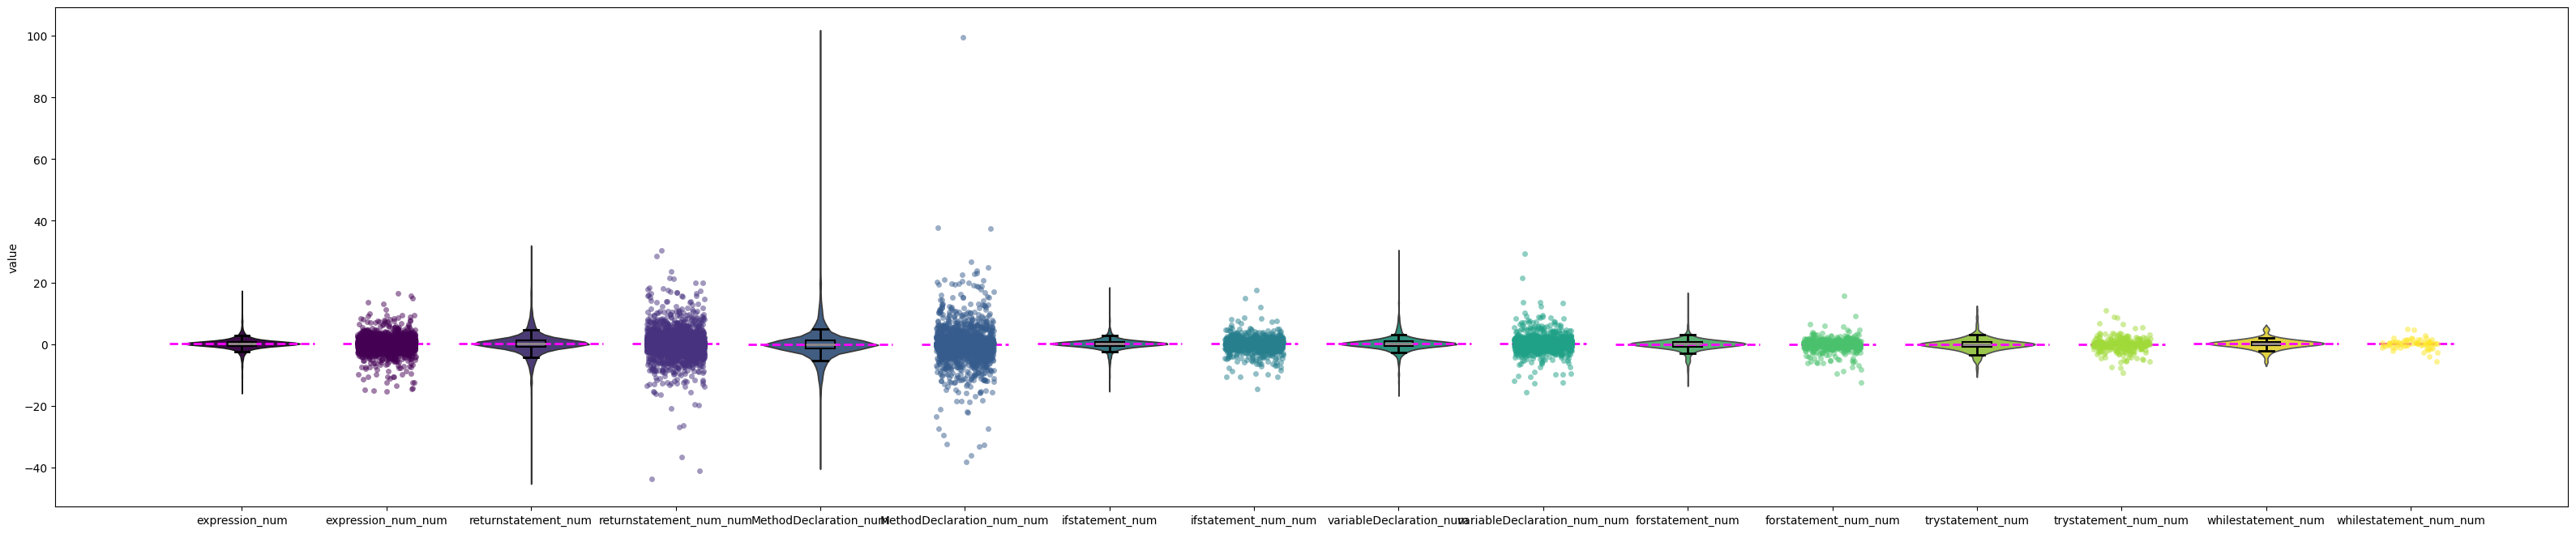

In [236]:
# 原数据  * 100  ，按照道理数据分布应不会变
all_colunm_df_true_copy = all_colunm_df_true.copy() * 10
get_paper_picture_other_color(all_colunm_df_true_copy)

In [237]:
# 截尾处理

def Winsorization_outliers(df):
    for column_name in df.columns:
        q1 = np.percentile(df[column_name].dropna() , 1)
        q3 = np.percentile(df[column_name].dropna() , 99)

        for index,_ in df.iterrows():
            i = df.at[index, column_name]   # 不能用loc
            if i > q3 or i < q1:
                df.at[index, column_name] = np.nan

        print(f'列{column_name}的第1个分位数{q1},第99个分位数{q3}')
    return df

all_colunm_df_true_for_Winsorization = all_colunm_df_true.copy()
all_colunm_df_true_Winsorization = Winsorization_outliers(all_colunm_df_true_for_Winsorization)

列expression_num的第1个分位数-0.5860716002199999,第99个分位数0.5487505199599985
列returnstatement_num的第1个分位数-1.15898541216,第99个分位数1.2796566937200045
列MethodDeclaration_num的第1个分位数-1.5406791286400001,第99个分位数1.8000435060399986
列ifstatement_num的第1个分位数-0.58640354059,第99个分位数0.4727679175199993
列variableDeclaration_num的第1个分位数-0.6254275038,第99个分位数0.8041537126000027
列forstatement_num的第1个分位数-0.647687309,第99个分位数0.4605896086600004
列trystatement_num的第1个分位数-0.5746408190800001,第99个分位数0.6837417618399999
列whilestatement_num的第1个分位数-0.45112757323,第99个分位数0.47850189625


expression_num             0.016281
returnstatement_num        0.021905
MethodDeclaration_num     -0.013368
ifstatement_num            0.009668
variableDeclaration_num    0.023326
forstatement_num          -0.009689
trystatement_num          -0.013809
whilestatement_num         0.014260
dtype: float64


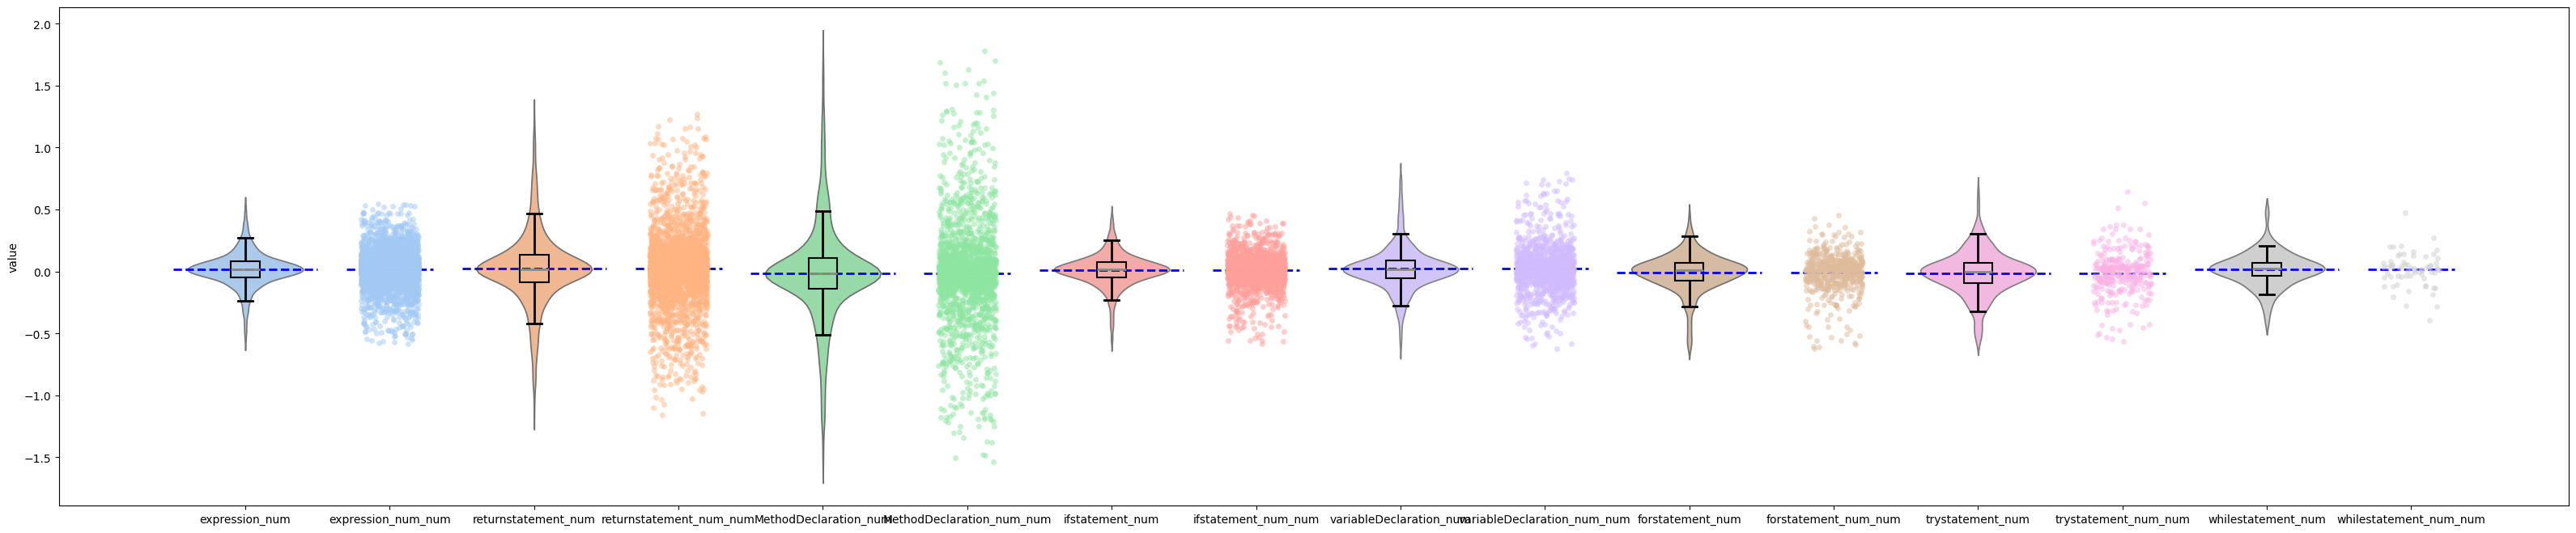

In [238]:
get_paper_picture(all_colunm_df_true_Winsorization)

expression_num             0.098917
returnstatement_num        0.195553
MethodDeclaration_num      0.253571
ifstatement_num            0.093396
variableDeclaration_num    0.120588
forstatement_num           0.106293
trystatement_num           0.127133
whilestatement_num         0.095730
dtype: float64


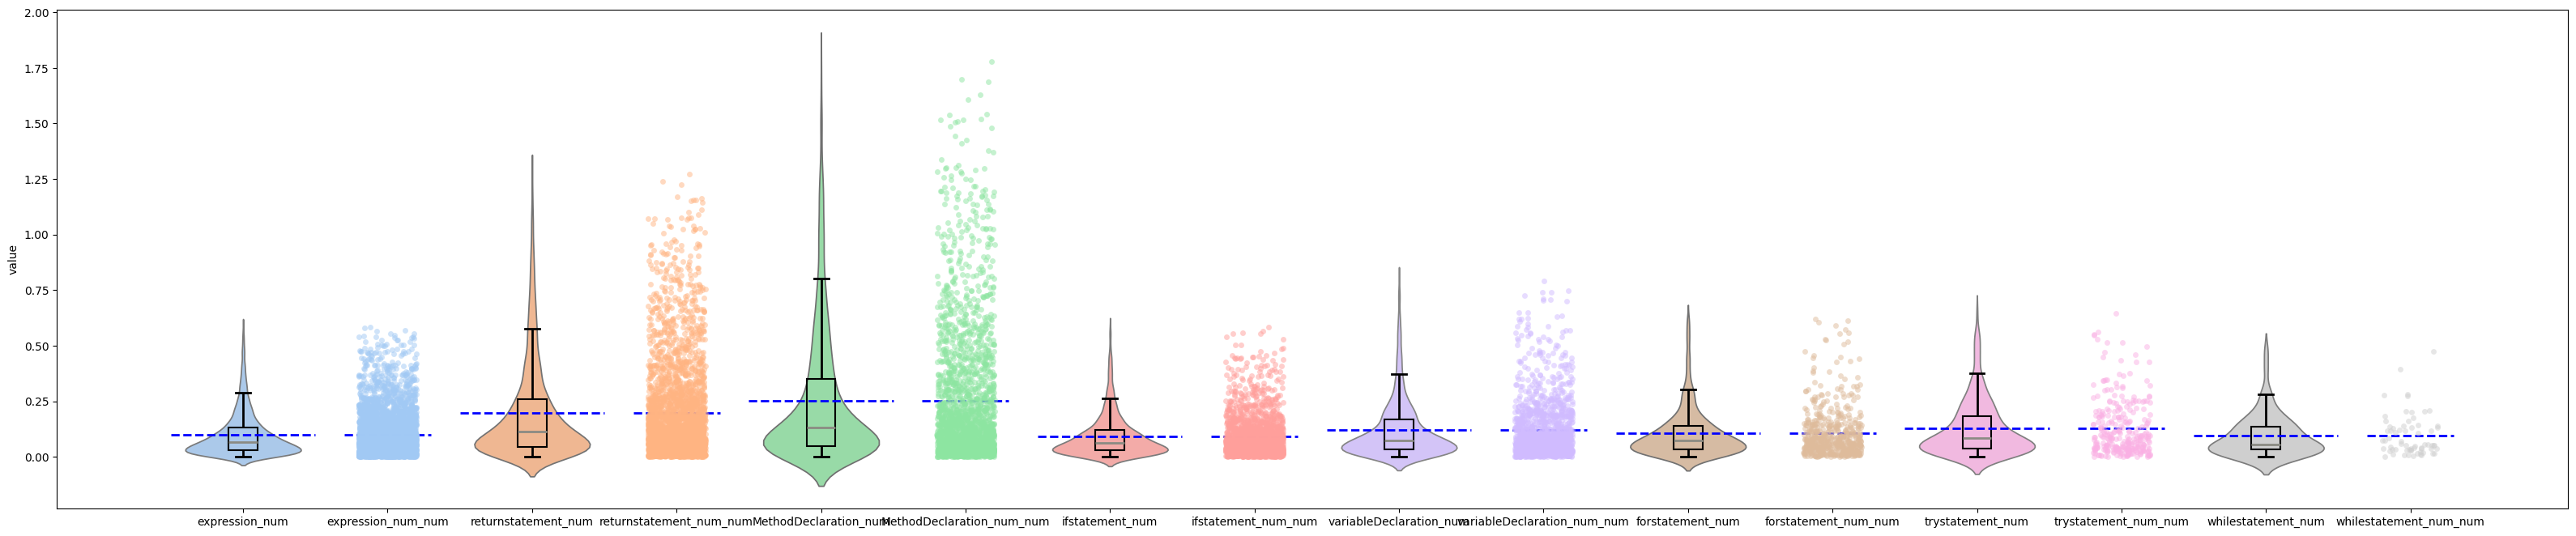

In [239]:
all_colunm_df_Winsorization_true_abs = all_colunm_df_true_Winsorization.abs()
get_paper_picture(all_colunm_df_Winsorization_true_abs)

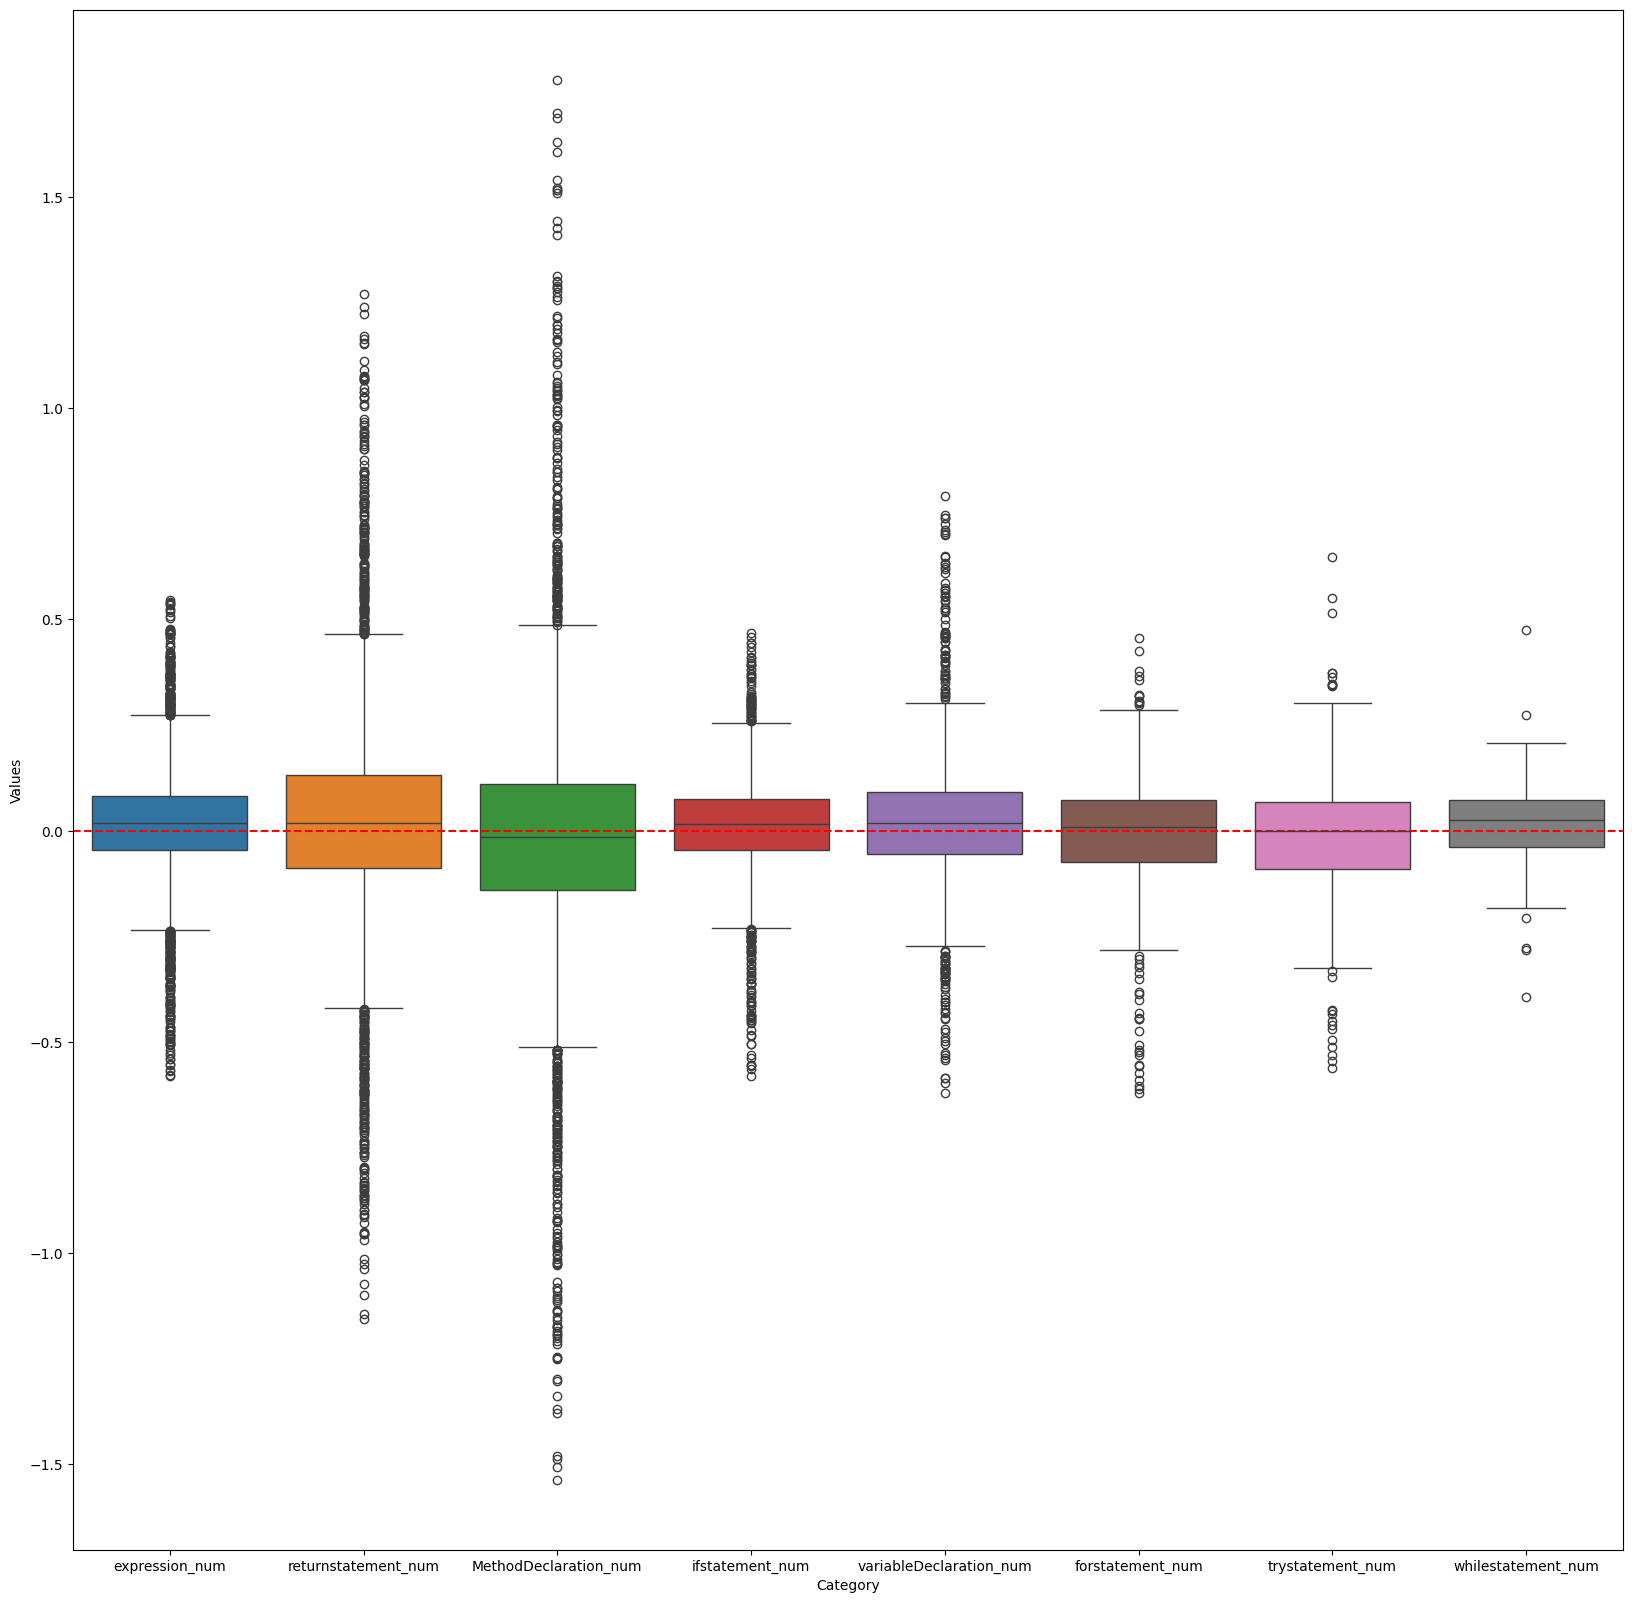

In [240]:
# 绘制箱线图
plt.figure(figsize=(20, 20))
sns.boxplot(data=all_colunm_df_true_Winsorization)

plt.xlabel('Category')
plt.ylabel('Values')
plt.axhline(y=0, color='r', linestyle='--')

plt.show()

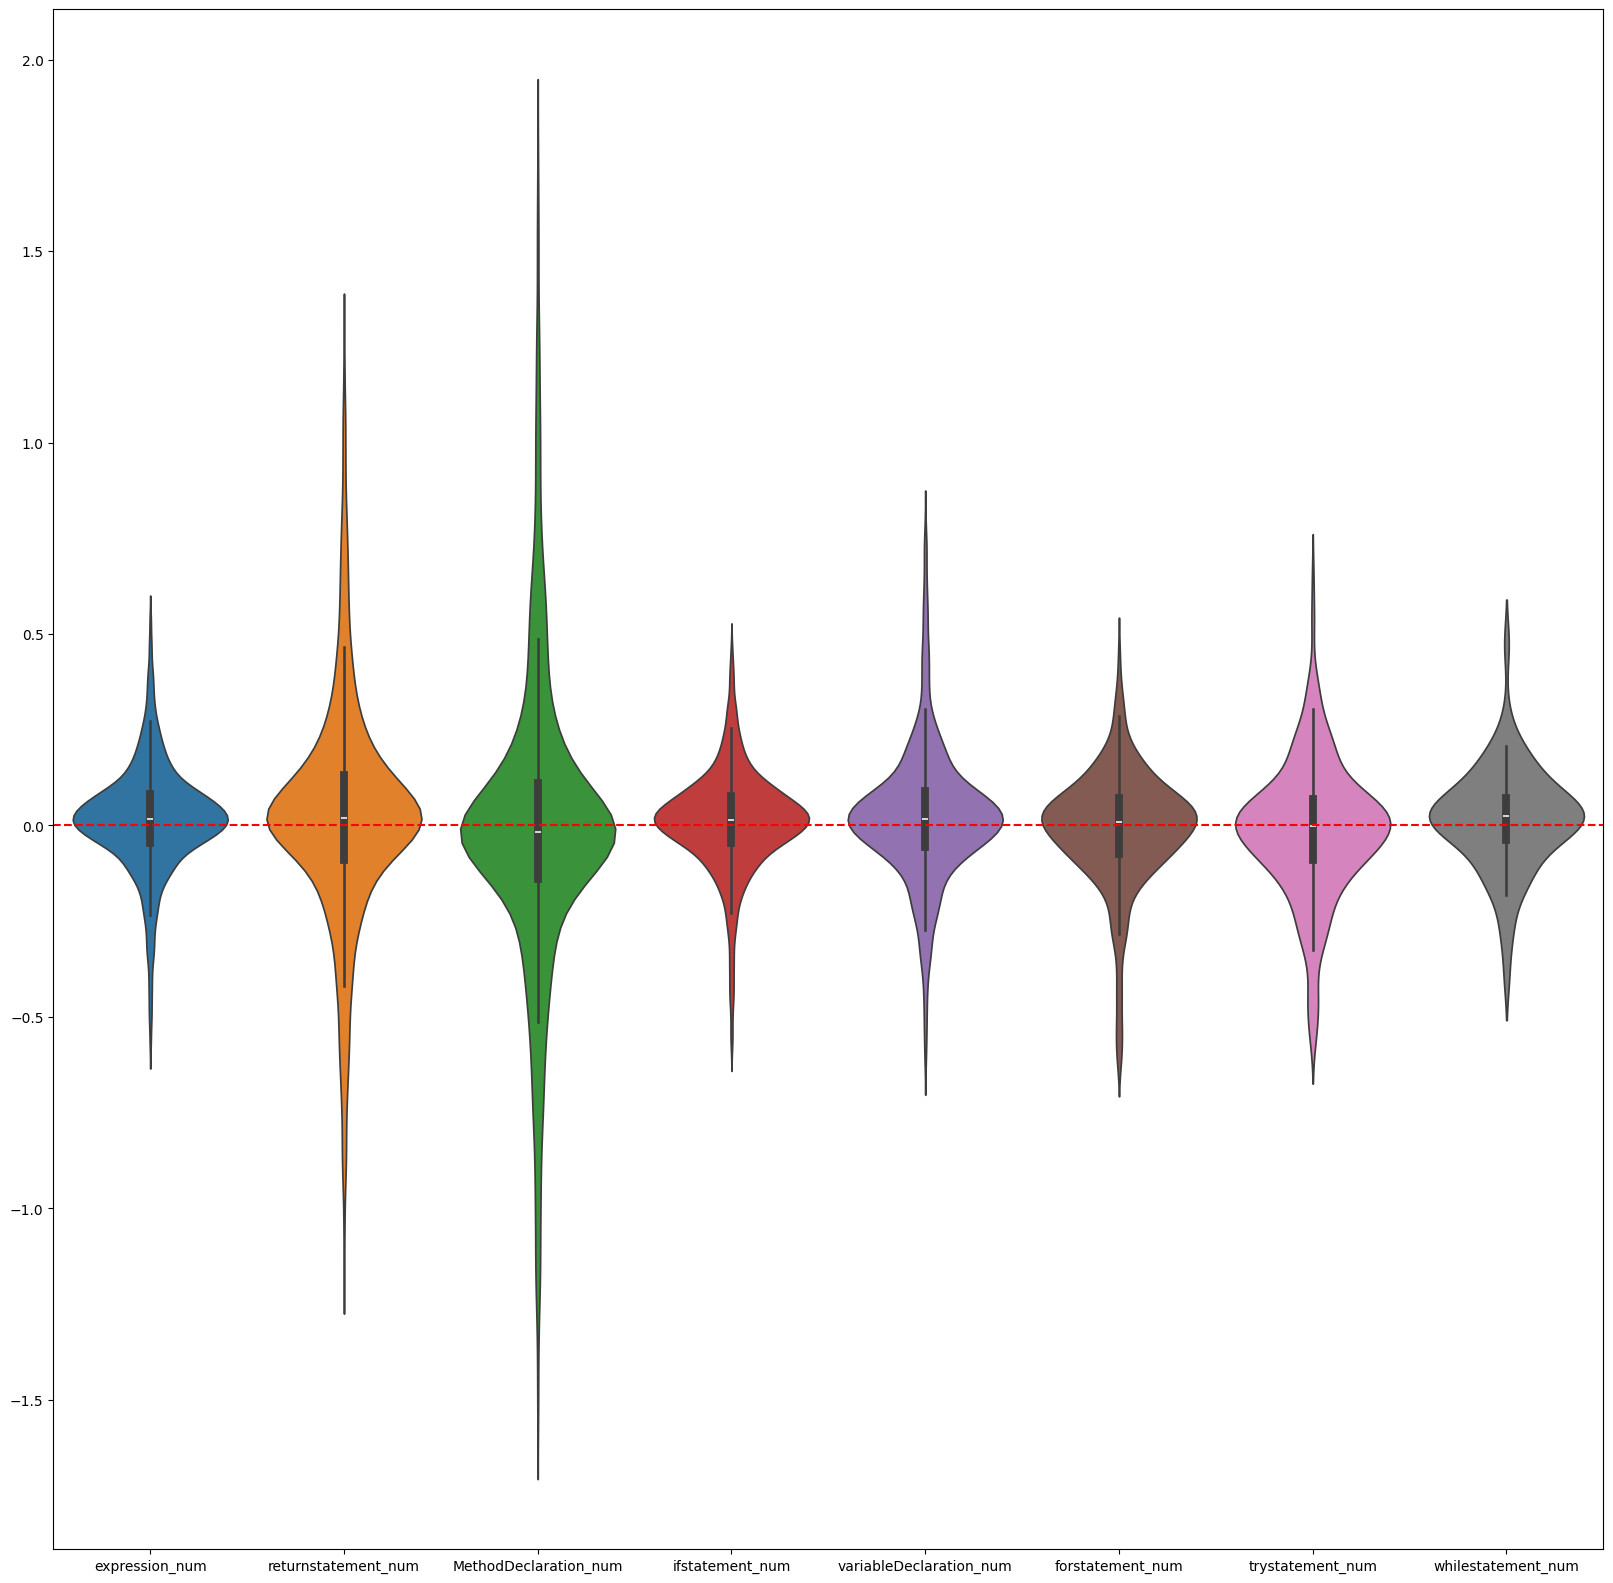

In [241]:
# Winsorization 小提琴图
plt.figure(figsize=(20,20))
sns.violinplot(data=all_colunm_df_true_Winsorization)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [242]:
# 四分位距法
def iqr_outliers(df):
    for column_name in df.columns:
        q1 = df[column_name].quantile(0.25)
        q3 = df[column_name].quantile(0.75)
        iqr = q3-q1
        Lower_tail = q1 - 1.5 * iqr
        Upper_tail = q3 + 1.5 * iqr
        for index,_ in df.iterrows():
            i = df.at[index, column_name]
            if i > Upper_tail or i < Lower_tail:
                df.at[index, column_name] = np.nan
        print(f'下四分位数{q1},上四分位数{q3},最小值下界{Lower_tail},最大值上界{Upper_tail}')
    return df

all_colunm_df_true_for_iqr = all_colunm_df_true.copy()
all_colunm_df_true_iqr = iqr_outliers(all_colunm_df_true_for_iqr)

下四分位数-0.047109599,上四分位数0.08409236850000001,最小值下界-0.24391255025000003,最大值上界0.28089531975000004
下四分位数-0.09212901000000001,上四分位数0.136373932,最小值下界-0.43488342300000005,最大值上界0.479128345
下四分位数-0.14422835875,上四分位数0.11582931175000001,最小值下界-0.5343148645,最大值上界0.5059158175
下四分位数-0.049094056500000004,上四分位数0.07909114075000001,最小值下界-0.24137185237500006,最大值上界0.27136893662500006
下四分位数-0.0566338,上四分位数0.092249568,最小值下界-0.27995885200000004,最大值上界0.31557462000000003
下四分位数-0.0771169565,上四分位数0.0738741835,最小值下界-0.3036036665,最大值上界0.30036089349999995
下四分位数-0.094124529,上四分位数0.07584775700000002,最小值下界-0.34908295800000005,最大值上界0.33080618600000006
下四分位数-0.038585701,上四分位数0.07311296475000001,最小值下界-0.20613369962500003,最大值上界0.24066096337500004


expression_num             0.019723
returnstatement_num        0.021247
MethodDeclaration_num     -0.018693
ifstatement_num            0.015444
variableDeclaration_num    0.015560
forstatement_num           0.003854
trystatement_num          -0.010856
whilestatement_num         0.018774
dtype: float64


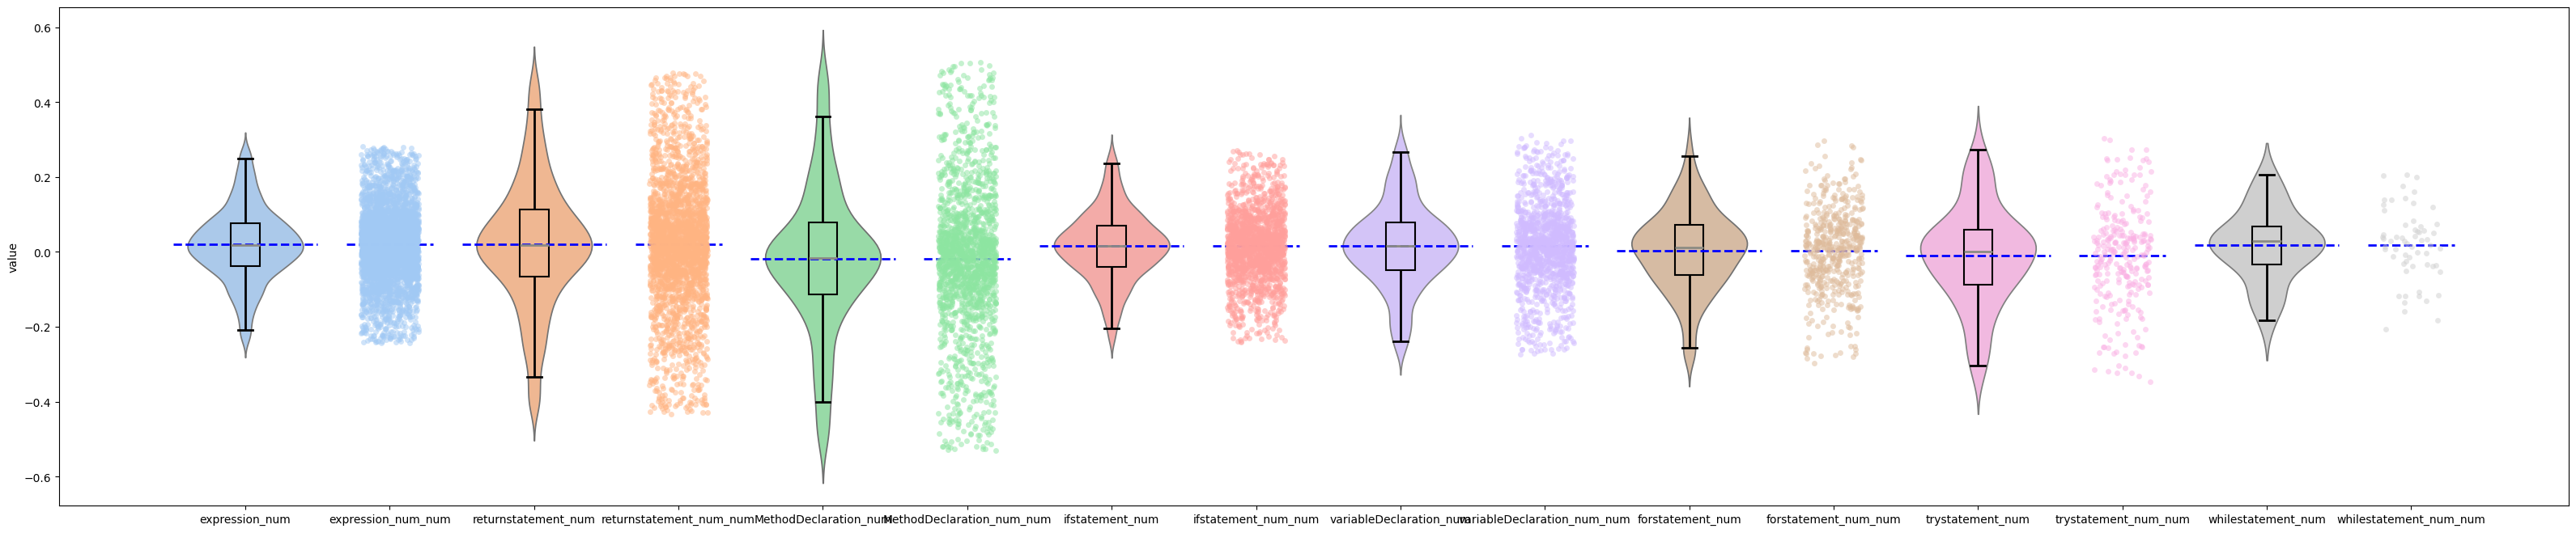

In [243]:
get_paper_picture(all_colunm_df_true_iqr)

expression_num             0.077297
returnstatement_num        0.129656
MethodDeclaration_num      0.143263
ifstatement_num            0.073722
variableDeclaration_num    0.087433
forstatement_num           0.084424
trystatement_num           0.102507
whilestatement_num         0.075708
dtype: float64


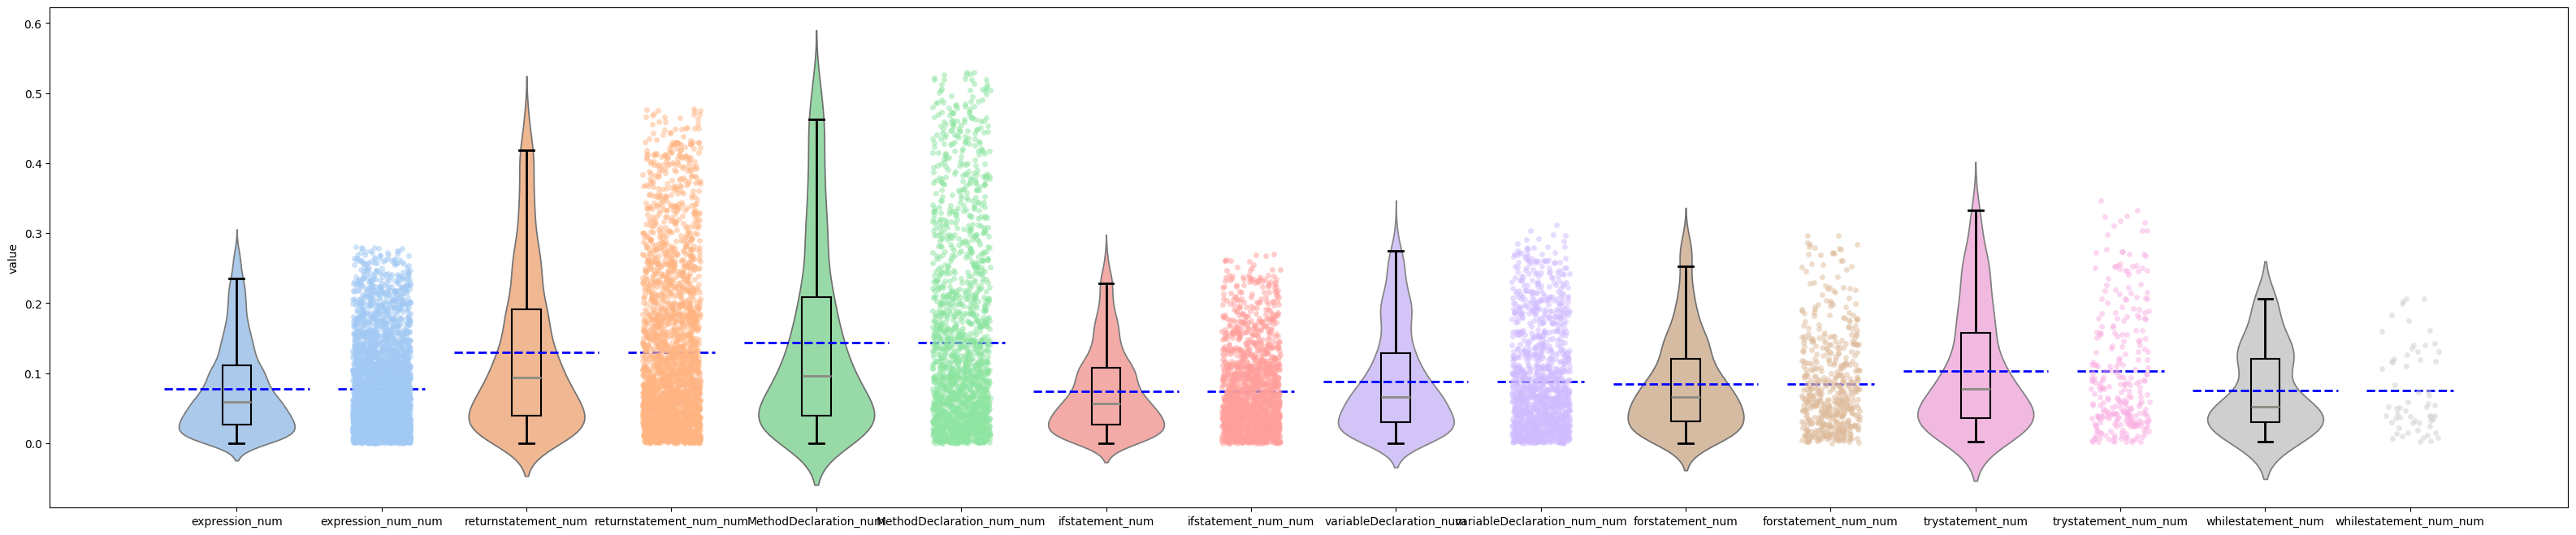

In [244]:
all_colunm_df_iqr_true_abs = all_colunm_df_true_iqr.abs()
get_paper_picture(all_colunm_df_iqr_true_abs)

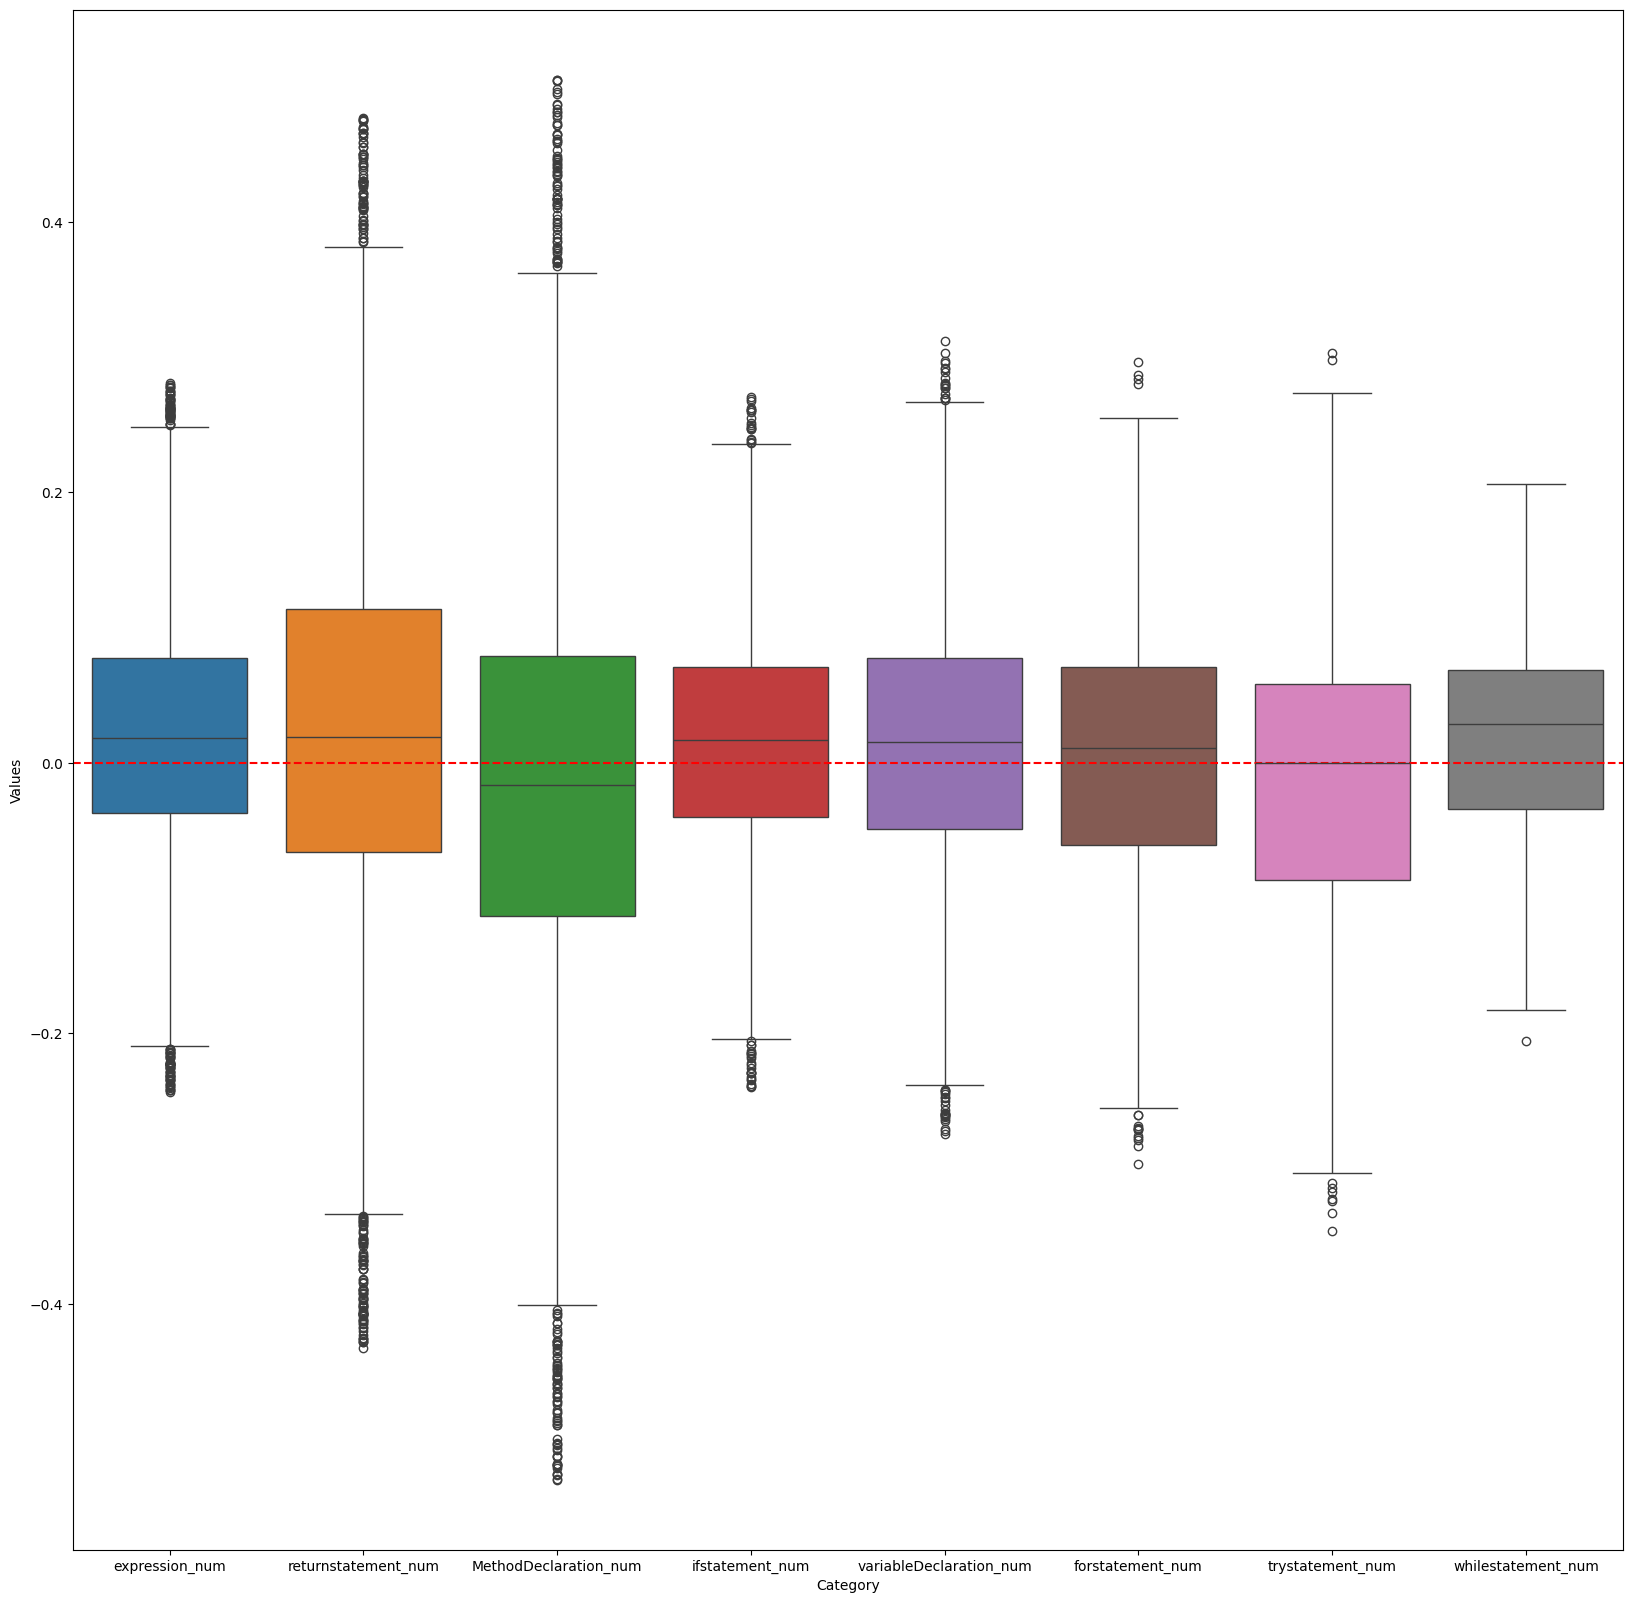

In [245]:
# 绘制箱线图
plt.figure(figsize=(20, 20))
sns.boxplot(data=all_colunm_df_true_iqr)

plt.xlabel('Category')
plt.ylabel('Values')
plt.axhline(y=0, color='r', linestyle='--')

plt.show()

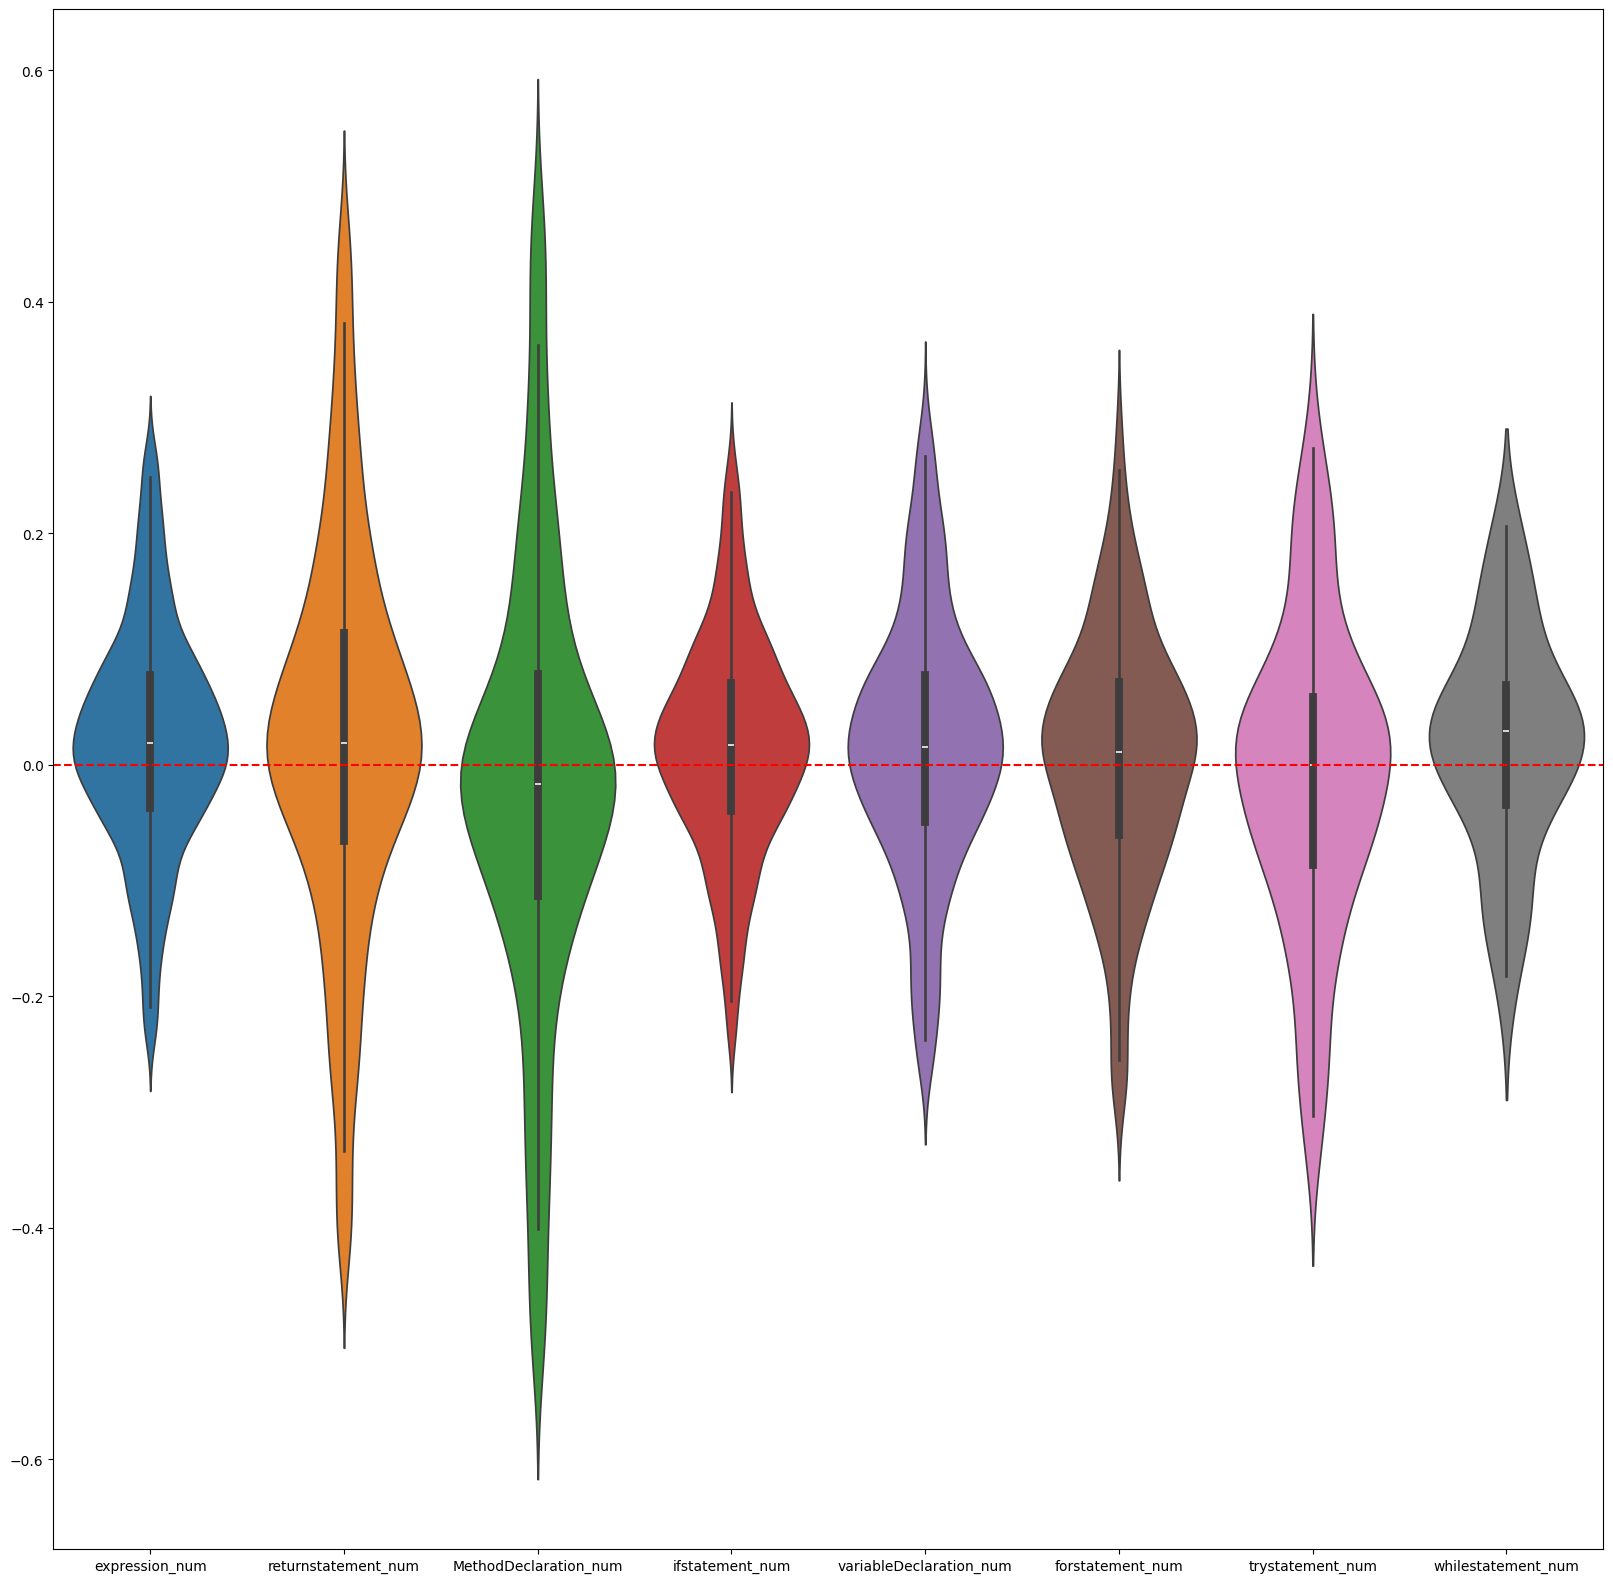

In [246]:
# iqr 小提琴图
plt.figure(figsize=(20,20))
sns.violinplot(data=all_colunm_df_true_iqr)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

绝对值均值

In [247]:
all_colunm_df_true_abs = all_colunm_df_true.abs()
all_colunm_df_true_abs.head()

expression_num  returnstatement_num  MethodDeclaration_num  \
0        0.191197             0.026822               0.013571   
1        0.048397             0.131420               0.412345   
2        0.034493             0.166484               0.211686   
3        0.050494             0.035449               0.023537   
4        0.023919             0.232338               0.060836   

   ifstatement_num  variableDeclaration_num  forstatement_num  \
0         0.224068                 0.191197          0.131420   
1         0.267434                 0.048397          0.222676   
2         0.034493                 0.266712               NaN   
3         0.136808                 0.166484               NaN   
4         0.031834                 0.050494               NaN   

   trystatement_num  whilestatement_num  
0          0.087215            0.135945  
1          0.005061            0.487758  
2          0.145905            0.199363  
3          0.041888            0.011297  
4          0.003133            0.038573

In [248]:
count_greater_than_1 = (all_colunm_df_true_abs > 1).sum().sum()
count_greater_than_2 = (all_colunm_df_true_abs > 2).sum().sum()
count_greater_than_4 = (all_colunm_df_true_abs > 4).sum().sum()
count_greater_than_5 = (all_colunm_df_true_abs > 5).sum().sum()
count_greater_than_1,count_greater_than_2,count_greater_than_4,count_greater_than_5

(271, 38, 3, 1)

In [249]:
# 计算大于8的值的数量
all_colunm_df_true_abs[all_colunm_df_true_abs > 8] = np.nan

In [250]:
mean_abs_values_true = all_colunm_df_true_abs.mean()
print(mean_abs_values_true)

expression_num             0.114826
returnstatement_num        0.226889
MethodDeclaration_num      0.294062
ifstatement_num            0.107835
variableDeclaration_num    0.140652
forstatement_num           0.121815
trystatement_num           0.145207
whilestatement_num         0.108463
dtype: float64


expression_num             0.114826
returnstatement_num        0.226889
MethodDeclaration_num      0.294062
ifstatement_num            0.107835
variableDeclaration_num    0.140652
forstatement_num           0.121815
trystatement_num           0.145207
whilestatement_num         0.108463
dtype: float64


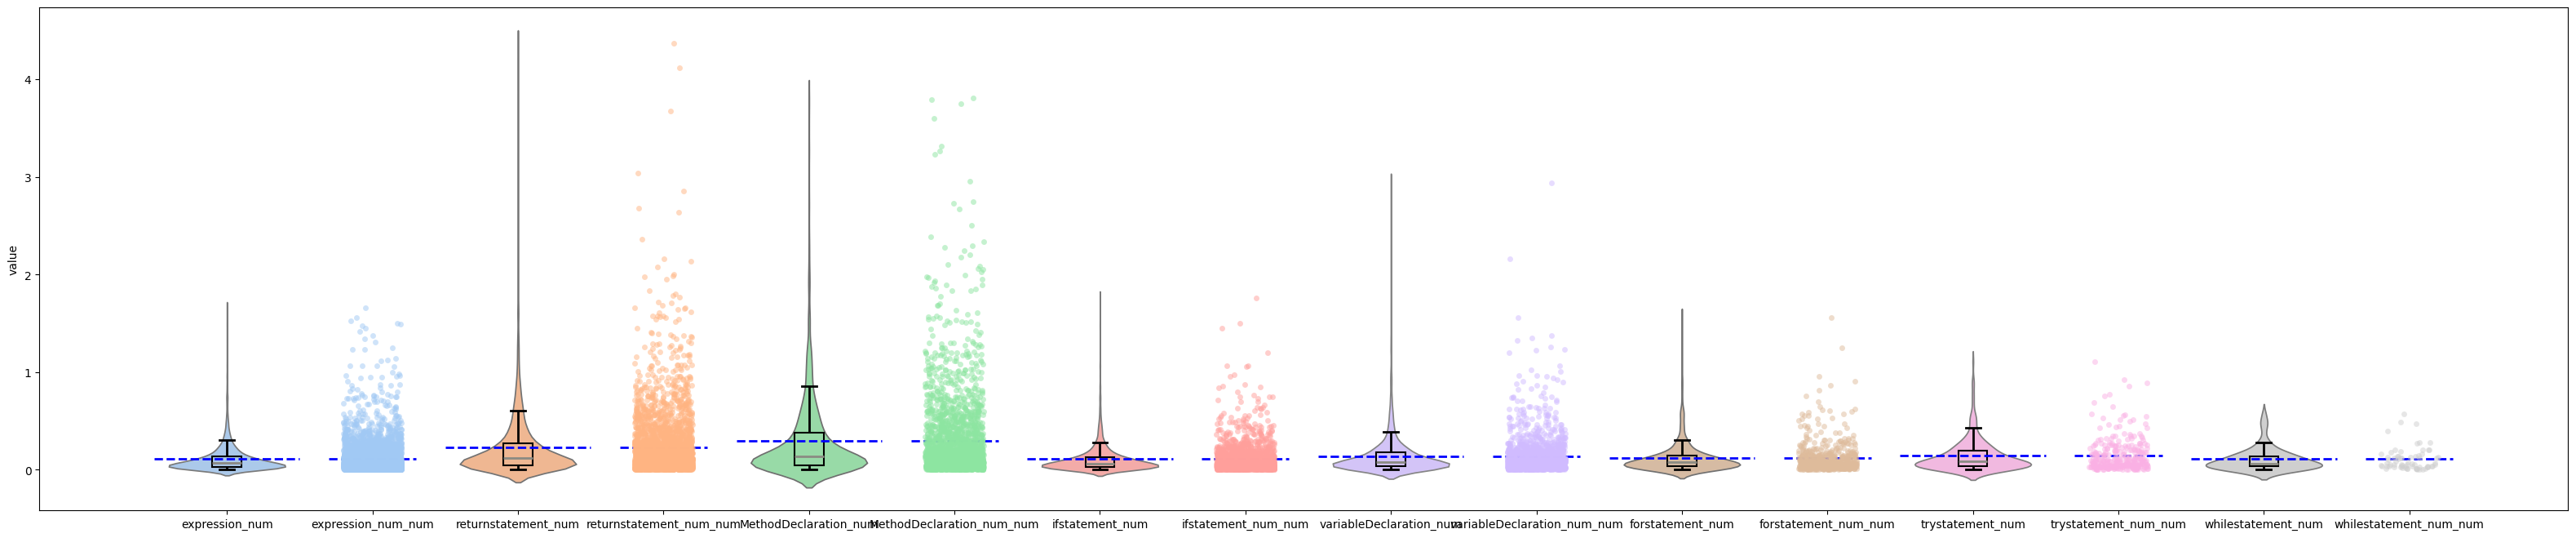

In [251]:
get_paper_picture(all_colunm_df_true_abs)

使用标准化方法，对全体数值进行标准化，结果与原本一致

In [252]:
pre_true = pd.read_json('linelevel_pre_true.json')
attribution_true = pd.read_json('linelevel_attribution_true.json')
attribution_true['value'] = attribution_true['value'] * 10

In [253]:
attribution_true.head()

value              key
0  0.224068  ifstatement_num
1  0.267434  ifstatement_num
2  0.034493  ifstatement_num
3  0.136808  ifstatement_num
4 -0.031834  ifstatement_num

In [254]:
# 使用 Z-score 标准化
from sklearn.preprocessing import StandardScaler

attribution_true_Z_score = attribution_true.copy()
scaler = StandardScaler()
attribution_true_Z_score['value'] = scaler.fit_transform(attribution_true_Z_score[['value']])

In [255]:
attribution_true_Z_score_all_column = get_all_colunm_df(attribution_true_Z_score)
attribution_true_Z_score_all_column.head()

expression_num  returnstatement_num  MethodDeclaration_num  \
0        0.544004            -0.114257               0.007700   
1        0.112851             0.363520               1.211714   
2        0.070871             0.469388               0.605866   
3       -0.185730             0.073757               0.037792   
4        0.038946             0.668222              -0.216954   

   ifstatement_num  variableDeclaration_num  forstatement_num  \
0         0.643252                 0.544004          0.363520   
1         0.774185                 0.112851          0.639047   
2         0.070871                 0.772005               NaN   
3         0.379790                 0.469388               NaN   
4        -0.129391                -0.185730               NaN   

   trystatement_num  whilestatement_num  
0         -0.296602           -0.443732  
1         -0.017993            1.439407  
2          0.407254            0.568658  
3         -0.159745           -0.067383  
4         -0.042734            0.083190

expression_num             0.011926
returnstatement_num        0.031721
MethodDeclaration_num     -0.064403
ifstatement_num           -0.006550
variableDeclaration_num    0.043593
forstatement_num          -0.065017
trystatement_num          -0.068855
whilestatement_num         0.004885
dtype: float64


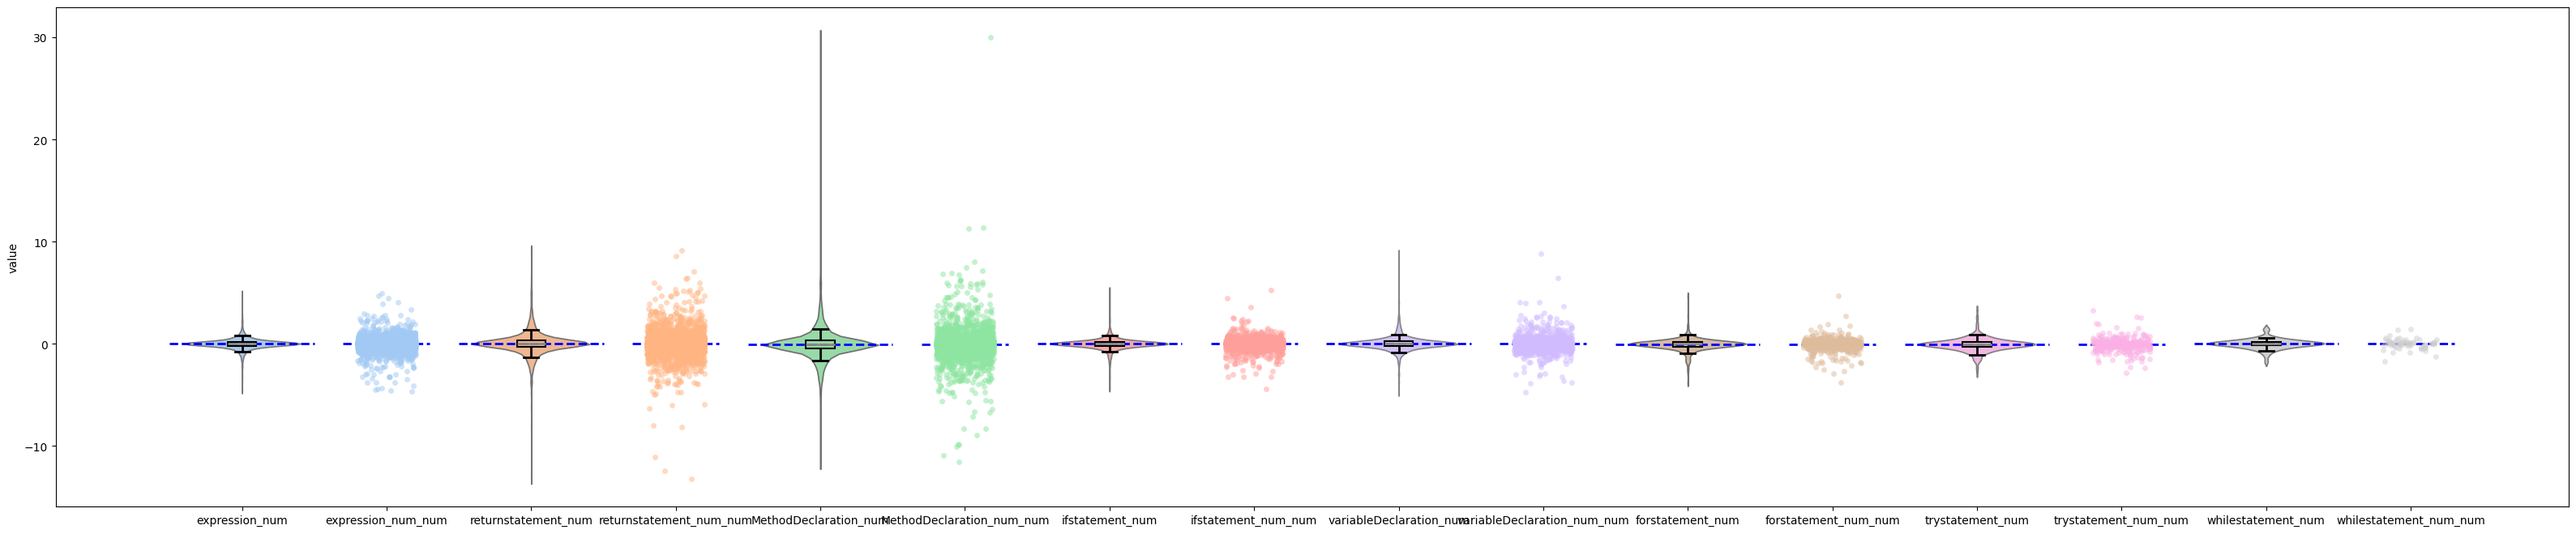

In [256]:
get_paper_picture(attribution_true_Z_score_all_column)

In [257]:
# 使用 Min-Max 标准化
from sklearn.preprocessing import MinMaxScaler

attribution_true_MinMax = attribution_true.copy()
scaler = MinMaxScaler(feature_range=(0, 10))
attribution_true_MinMax['value'] = scaler.fit_transform(attribution_true_MinMax[['value']])

In [258]:
attribution_true_MinMax_all_column = get_all_colunm_df(attribution_true_MinMax)
attribution_true_MinMax_all_column.head()

expression_num  returnstatement_num  MethodDeclaration_num  \
0        3.187240             3.034923               3.063143   
1        3.087475             3.145477               3.341743   
2        3.077761             3.169974               3.201554   
3        3.018385             3.078429               3.070107   
4        3.070373             3.215983               3.011160   

   ifstatement_num  variableDeclaration_num  forstatement_num  \
0         3.210205                 3.187240          3.145477   
1         3.240502                 3.087475          3.209232   
2         3.077761                 3.239997               NaN   
3         3.149242                 3.169974               NaN   
4         3.031422                 3.018385               NaN   

   trystatement_num  whilestatement_num  
0          2.992731            2.958686  
1          3.057198            3.394429  
2          3.155597            3.192945  
3          3.024398            3.045770  
4          3.051473            3.080611

expression_num             3.064121
returnstatement_num        3.068702
MethodDeclaration_num      3.046459
ifstatement_num            3.059846
variableDeclaration_num    3.071449
forstatement_num           3.046317
trystatement_num           3.045429
whilestatement_num         3.062492
dtype: float64


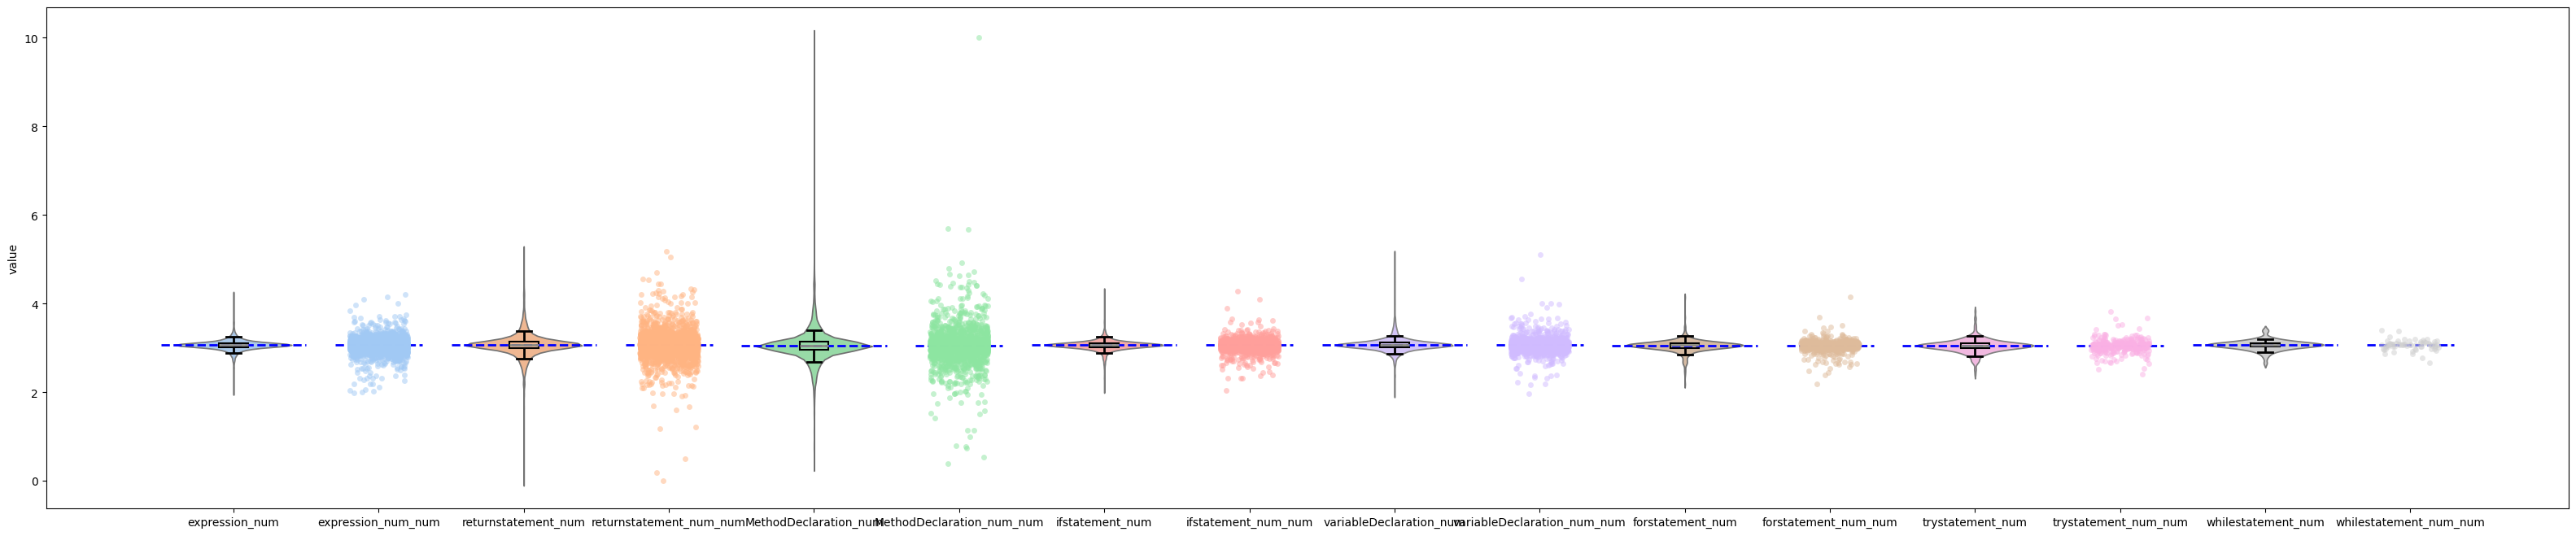

In [259]:
get_paper_picture(attribution_true_MinMax_all_column)

false

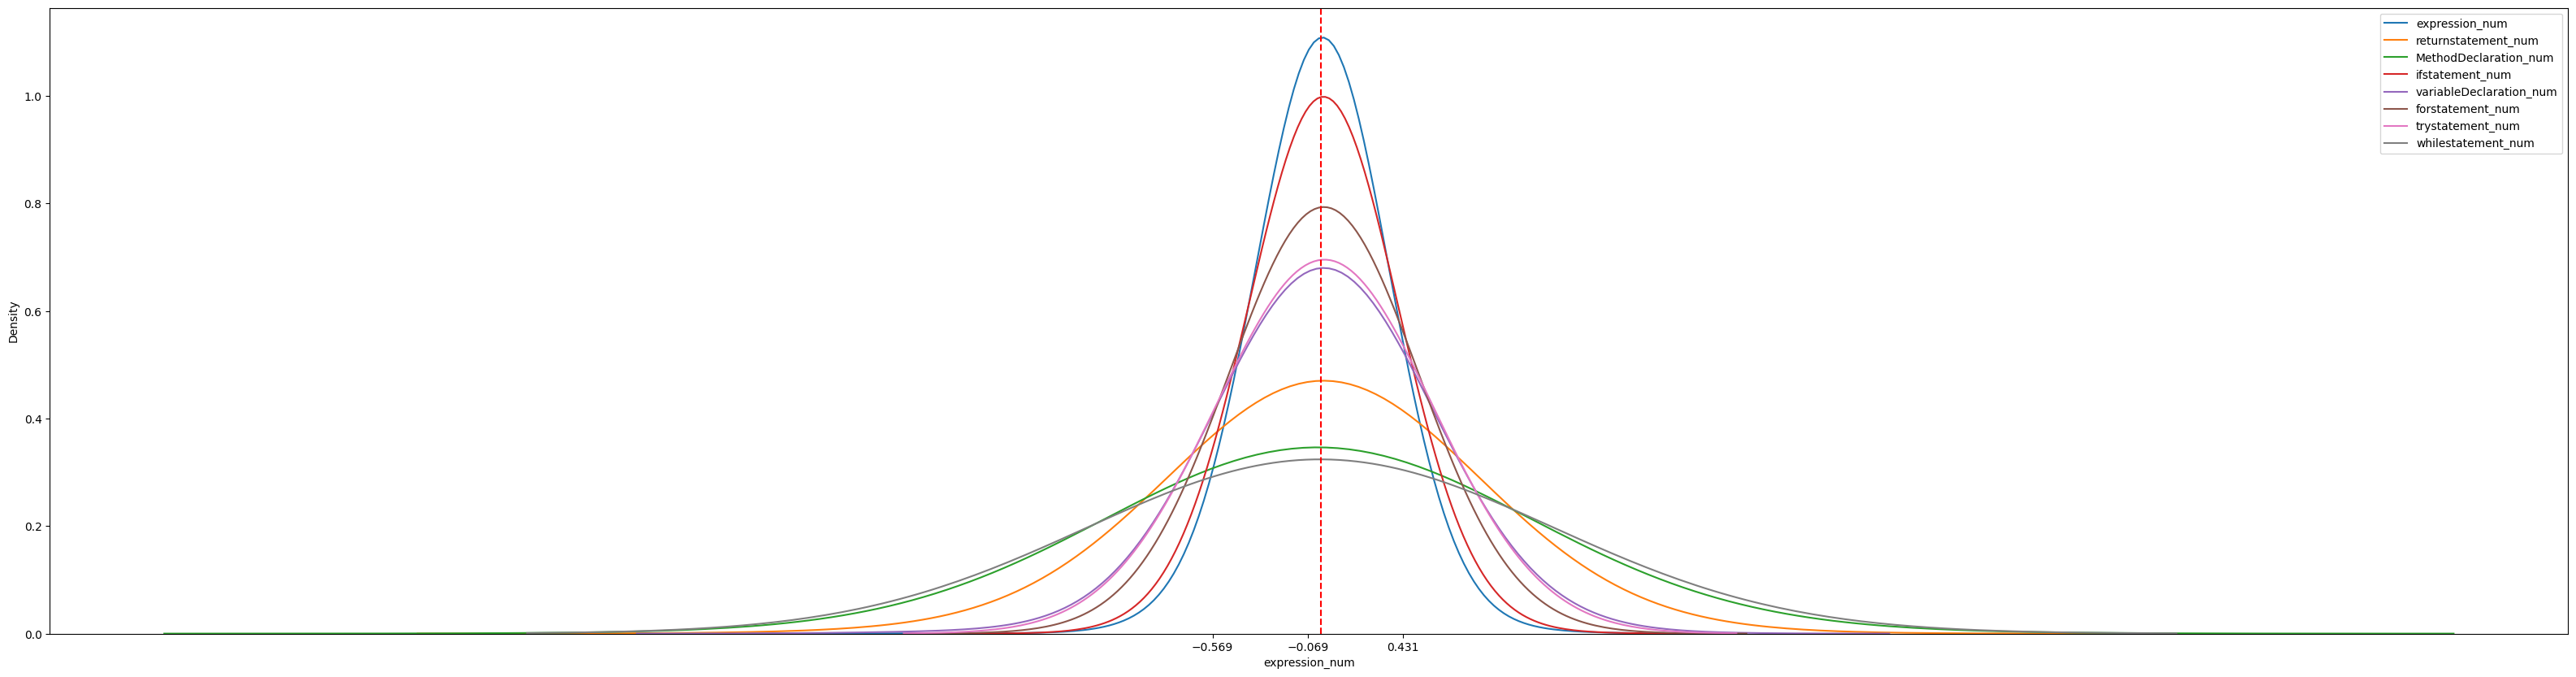

In [260]:
get_all_df(linelevel_attribution_false)

In [261]:
all_colunm_df_false = get_all_colunm_df(linelevel_attribution_false)
all_colunm_df_false.head()

expression_num  returnstatement_num  MethodDeclaration_num  \
0        0.193835             0.139482              -0.012378   
1       -0.052063            -0.202758              -0.131840   
2       -0.364585            -0.176777              -0.425897   
3       -0.091895            -2.430000               1.048487   
4       -0.140216             0.548456               0.224376   

   ifstatement_num  variableDeclaration_num  forstatement_num  \
0        -0.052063                 0.193835         -0.015434   
1        -0.042921                 0.139482          0.031946   
2        -0.072009                -0.202758         -0.030566   
3        -0.146474                -0.364585         -0.074697   
4        -0.477257                -0.091895          0.166823   

   trystatement_num  whilestatement_num  
0         -0.015434            0.028533  
1         -0.052992           -0.025739  
2         -0.042921            0.130149  
3         -0.074167            0.895594  
4         -0.043912            0.237688

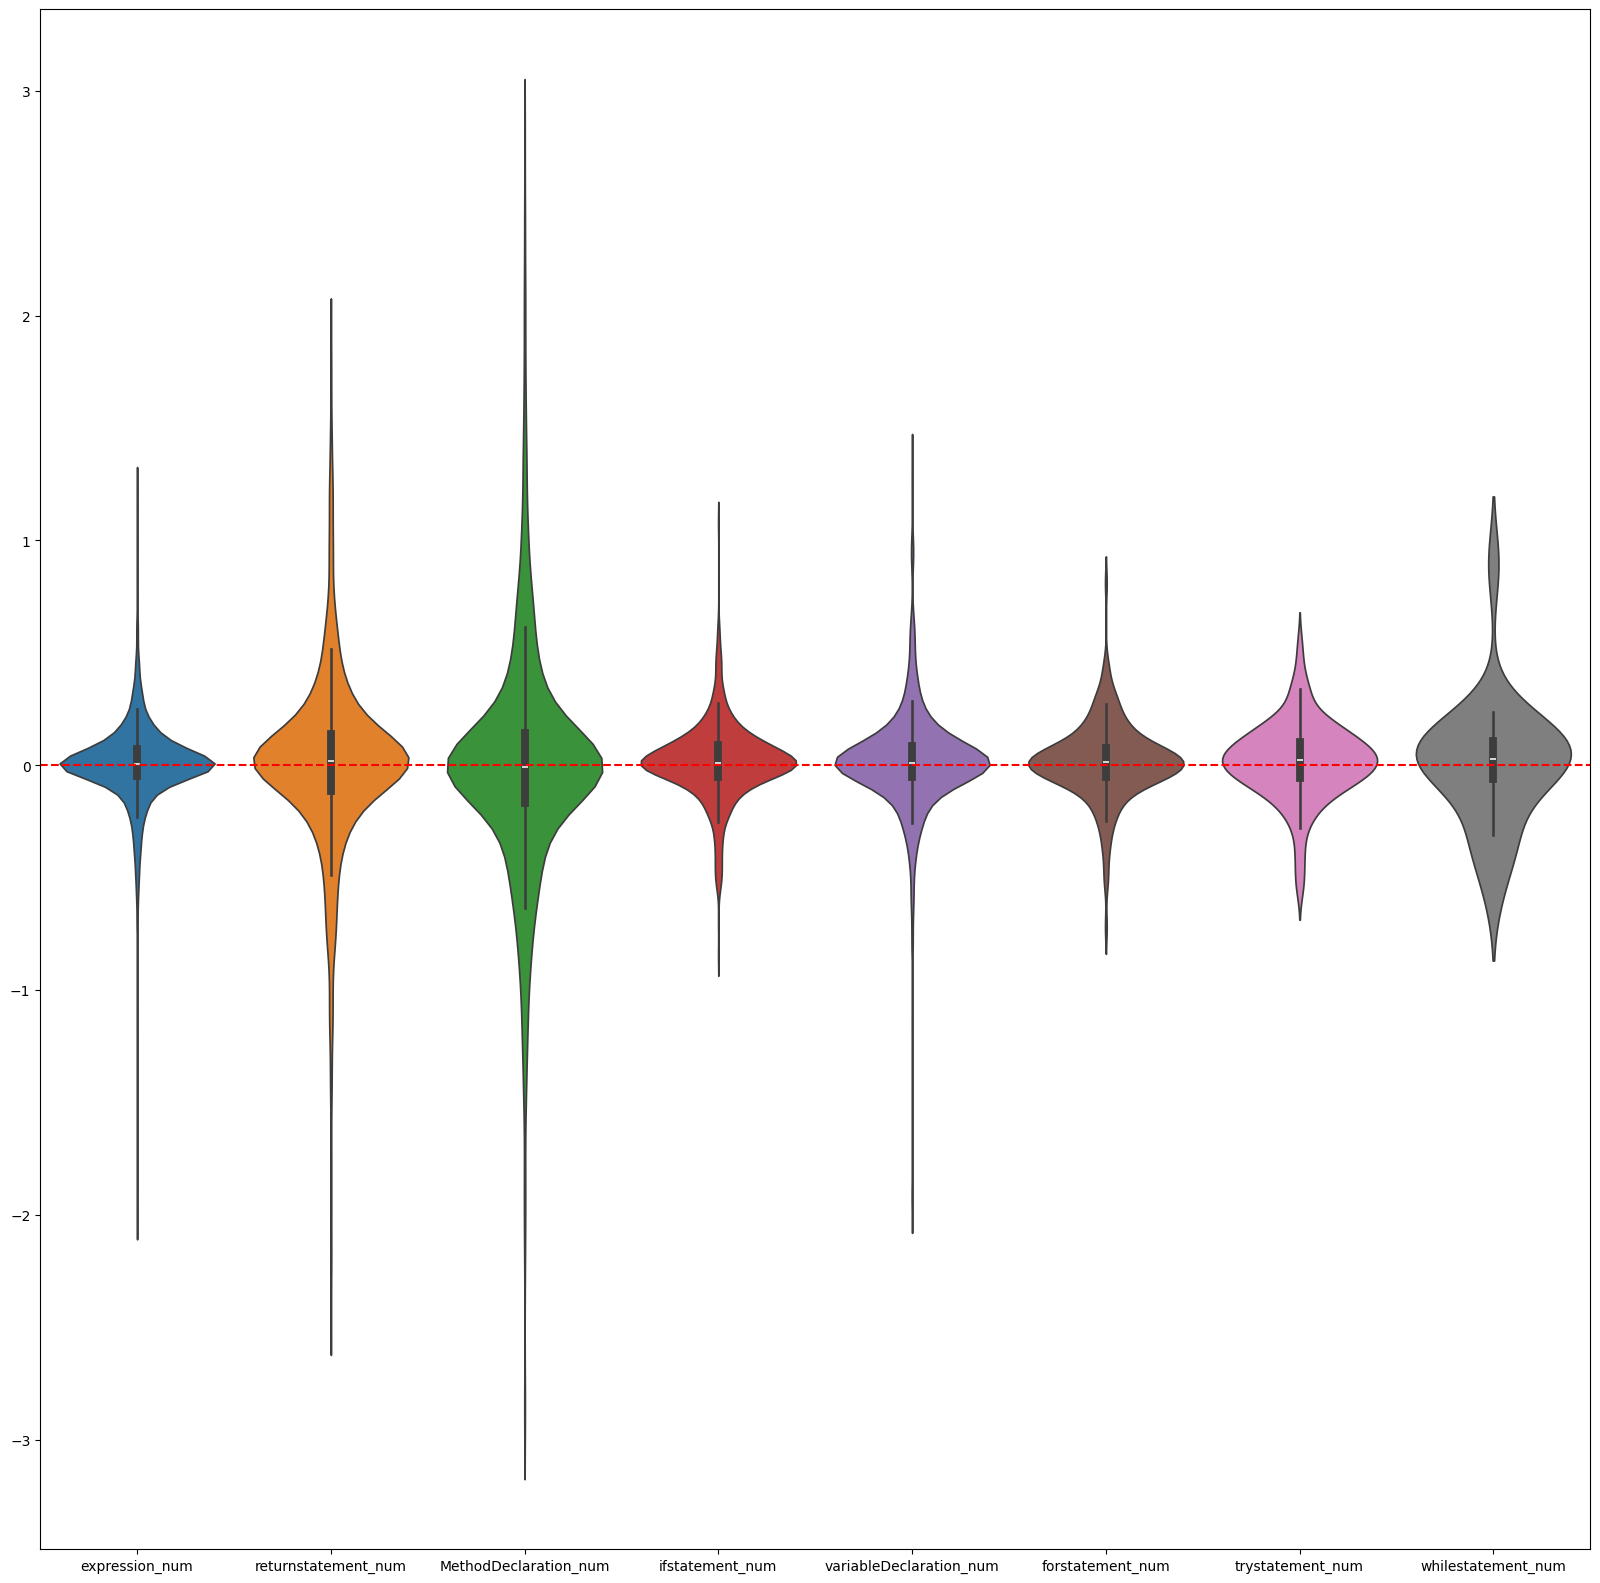

In [262]:
# 数据 x 10  小提琴图
plt.figure(figsize=(20,20))
sns.violinplot(data=all_colunm_df_false)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

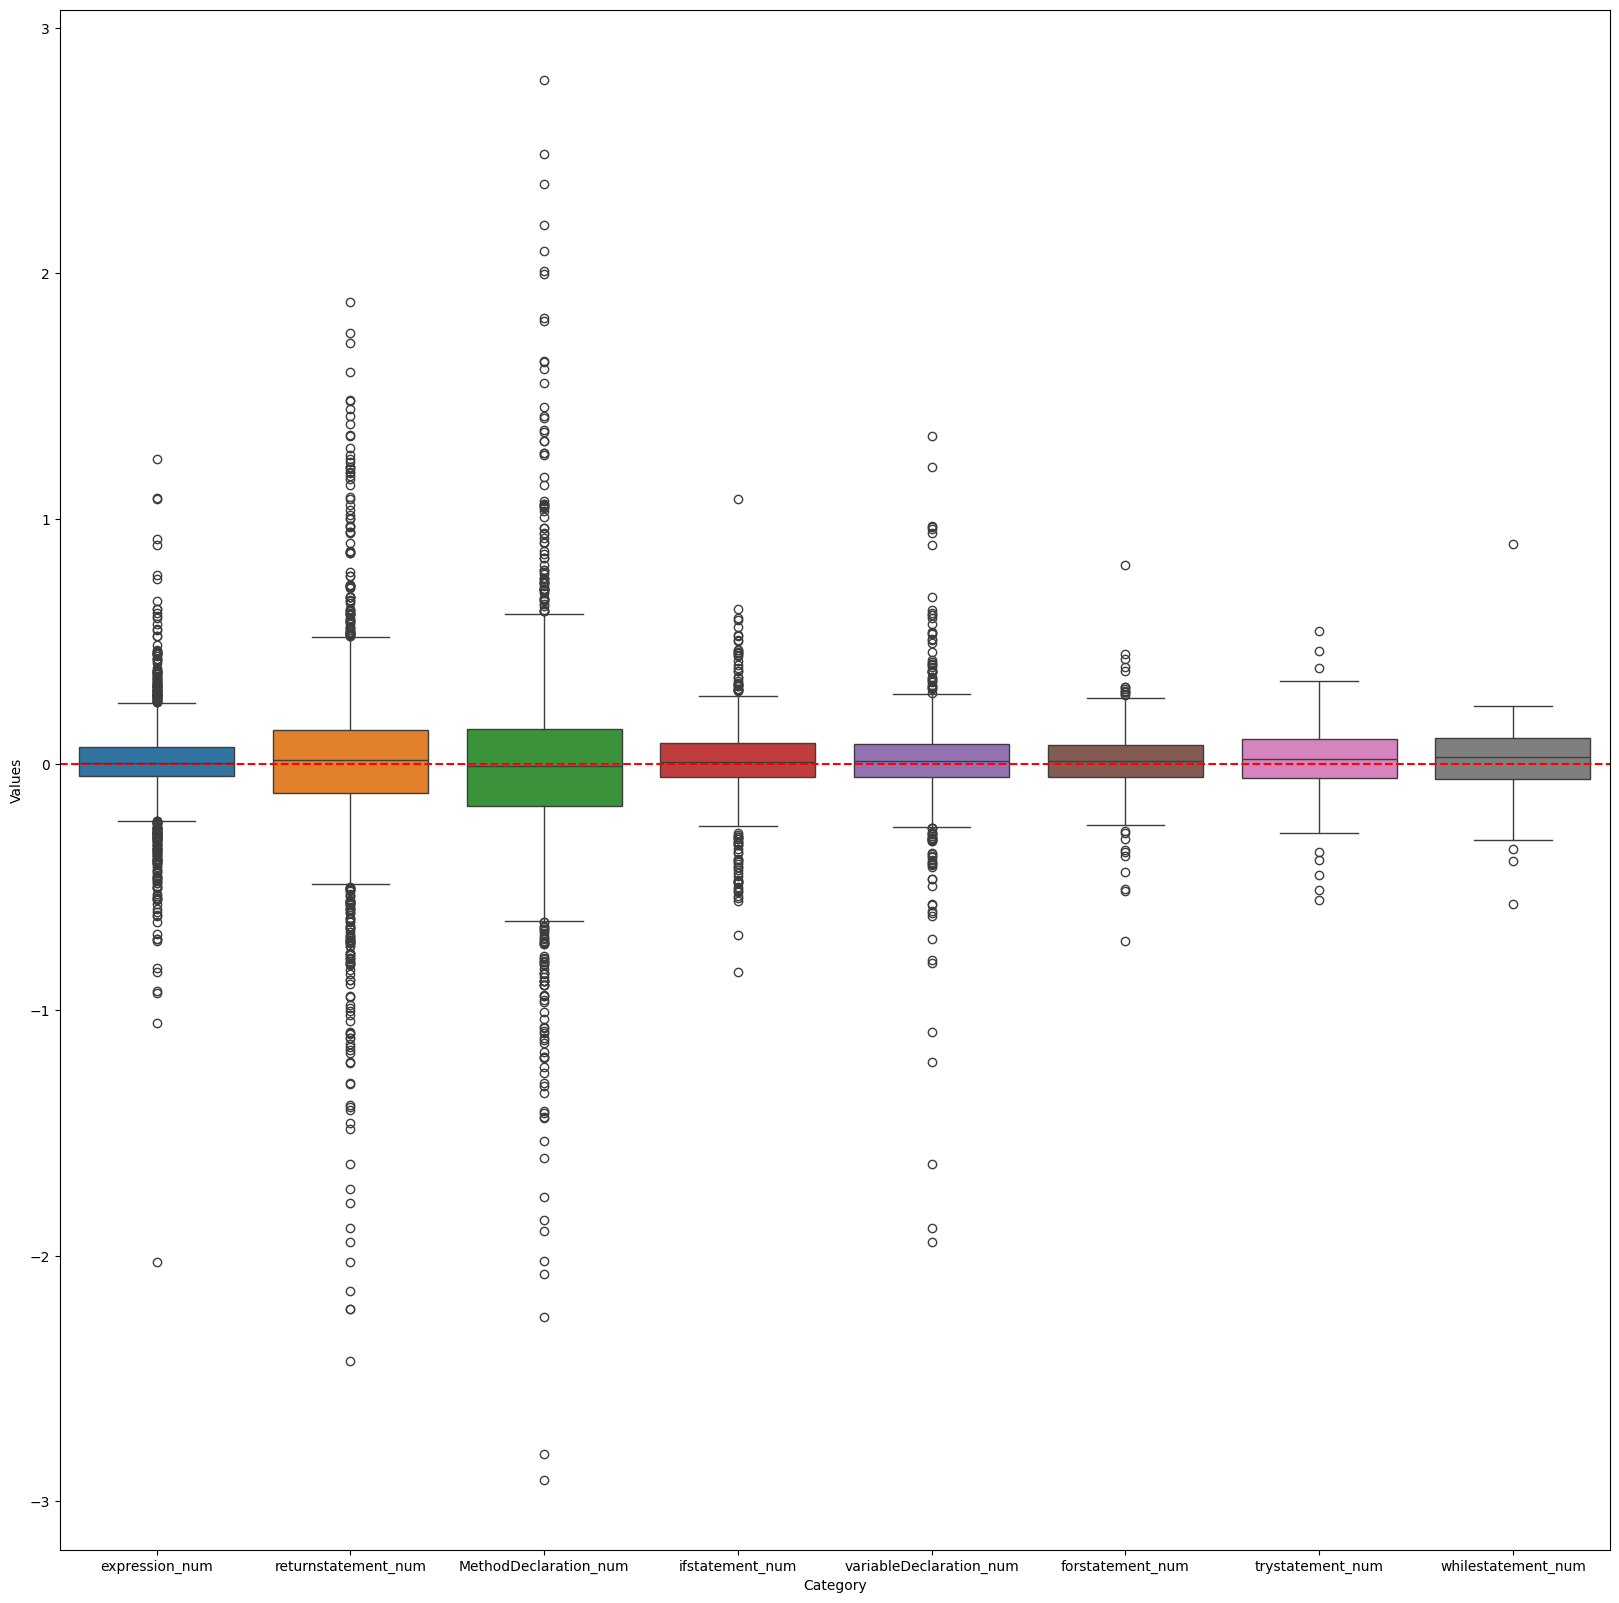

In [263]:
# 绘制箱线图
plt.figure(figsize=(20, 20))
sns.boxplot(data=all_colunm_df_false)

plt.xlabel('Category')
plt.ylabel('Values')

plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [264]:
abs_df = all_colunm_df_false.abs()
mean_abs_values = abs_df.mean()
mean_abs_values

expression_num             0.110752
returnstatement_num        0.247453
MethodDeclaration_num      0.320285
ifstatement_num            0.114660
variableDeclaration_num    0.138849
forstatement_num           0.115220
trystatement_num           0.127914
whilestatement_num         0.178806
dtype: float64

In [265]:
mean_value = all_colunm_df_false.mean()
mean_value 

expression_num             0.005447
returnstatement_num        0.004467
MethodDeclaration_num     -0.010966
ifstatement_num            0.012324
variableDeclaration_num    0.012231
forstatement_num           0.015566
trystatement_num           0.017562
whilestatement_num         0.001811
dtype: float64

In [266]:
std_value = all_colunm_df_false.std()
std_value

expression_num             0.182197
returnstatement_num        0.408748
MethodDeclaration_num      0.521774
ifstatement_num            0.172235
variableDeclaration_num    0.251430
forstatement_num           0.171067
trystatement_num           0.176106
whilestatement_num         0.281131
dtype: float64

In [267]:
# 画出和论文一样的图
def get_paper_picture(df):
    
    # 图形大小，随时改
    plt.figure(figsize=(40, 8))

    # 定义颜色
    palette = sns.color_palette('pastel')

    # 画图
    for i, col in enumerate(df.columns):
        # 小提琴
        sns.violinplot(x=np.full(len(df), i), y=df[col], inner=None, hue=np.full(len(df), i), palette=[palette[i]], legend=False)
        # 散点图
        sns.stripplot(x=np.full(len(df), i) - 0.5, y=df[col], color=palette[i], alpha=0.5, jitter=0.2, legend=False)
        # 箱线图
        sns.boxplot(x=np.full(len(df), i), y=df[col], width=0.2, showcaps=True, showfliers=False,  # 不显示异常值
                    boxprops=dict(facecolor='none', edgecolor='black', linewidth=1.5),  # 更改边框线条粗细
                    whiskerprops=dict(color='black', linewidth=2), 
                    capprops=dict(color='black', linewidth=2), 
                    medianprops=dict(color='#8B8B83', linewidth=2), 
                    flierprops=dict(marker='o', color='red', alpha=0.5))
    # 均值线
    mean_value = df.mean()
    print(mean_value)
    new_mean_value = [item for item in mean_value for _ in range(2)]
    for i in range(len(new_mean_value)):
        if i % 2 == 0:
            plt.plot([i - 0.5, i + 0.5], [new_mean_value[i], new_mean_value[i]], color='blue', linestyle='--', linewidth=2)
        else:
            plt.plot([i - 0.3, i + 0.3], [new_mean_value[i], new_mean_value[i]], color='blue', linestyle='--', linewidth=2)



    # 横坐标标签
    label_name = [item for sublist in [[x, f'{x}_num'] for x in df.columns] for item in sublist]
    ax = plt.gca()
    ax.set_xticks(np.arange(len(label_name)))  # 设置标签的位置
    ax.set_xticklabels(label_name)

    plt.ylabel('value')

    plt.show()

expression_num             0.005447
returnstatement_num        0.004467
MethodDeclaration_num     -0.010966
ifstatement_num            0.012324
variableDeclaration_num    0.012231
forstatement_num           0.015566
trystatement_num           0.017562
whilestatement_num         0.001811
dtype: float64


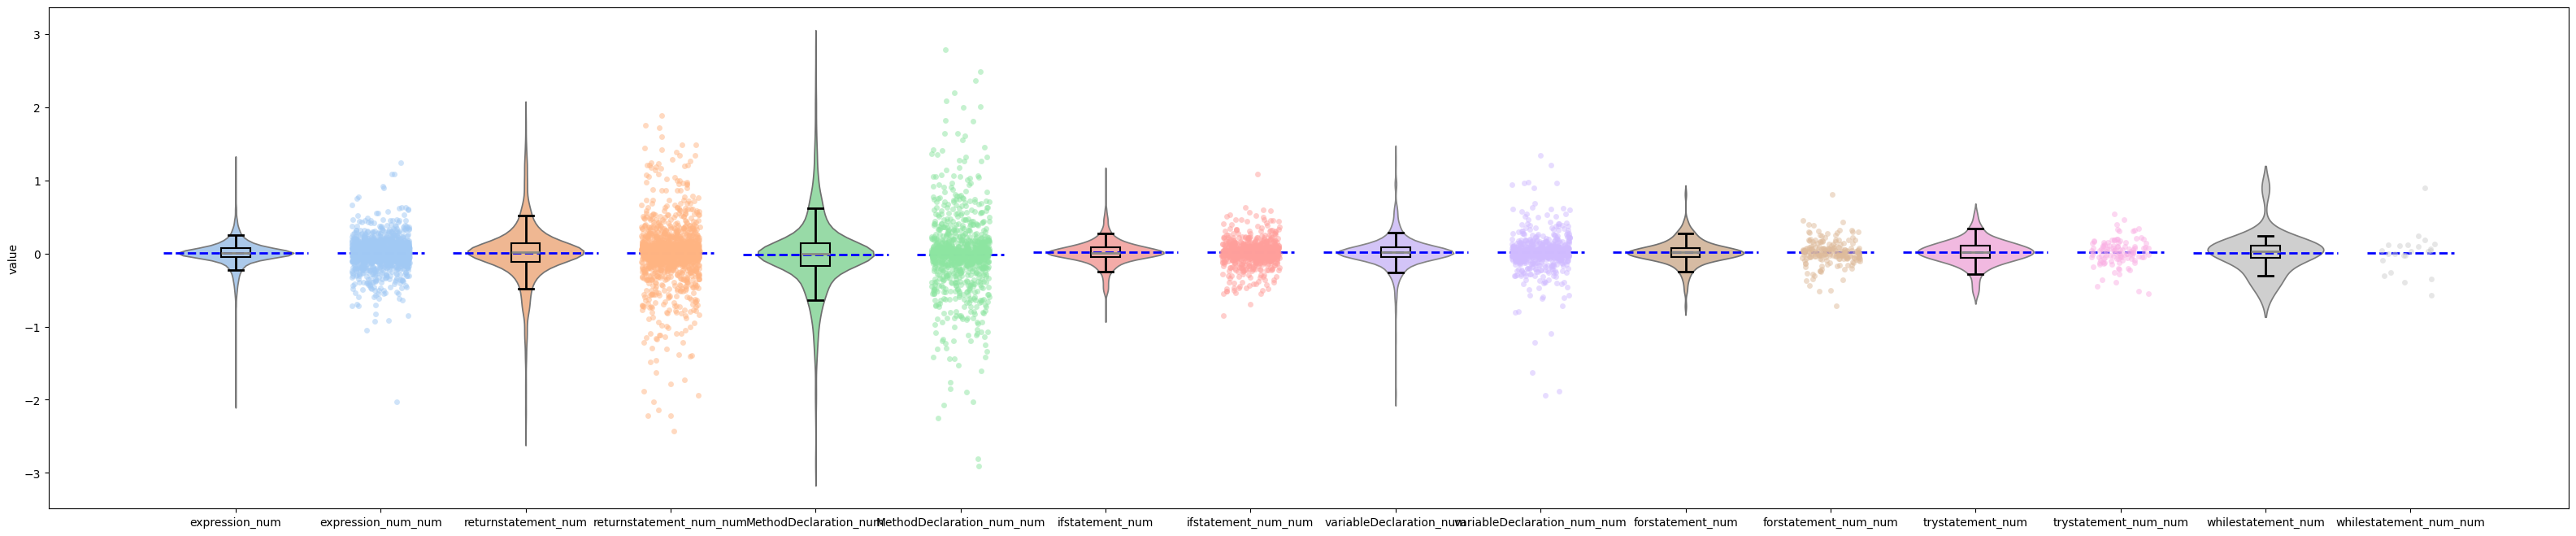

In [268]:
get_paper_picture(all_colunm_df_false)

In [269]:
# 画出和论文一样的图
def get_paper_picture_other_color(df):
    
    # 图形大小，随时改
    plt.figure(figsize=(40, 8))

    # 使用 'viridis' colormap
    colormap = plt.colormaps['viridis']
    palette = [colormap(i) for i in np.linspace(0, 1, len(df.columns))]
    
    # 画图
    for i, col in enumerate(df.columns):
        # 小提琴
        sns.violinplot(x=np.full(len(df), i), y=df[col], inner=None, hue=np.full(len(df), i), palette=[palette[i]], legend=False)
        # 散点图
        sns.stripplot(x=np.full(len(df), i) - 0.5, y=df[col], color=palette[i], alpha=0.5, jitter=0.2, legend=False)
        # 箱线图
        sns.boxplot(x=np.full(len(df), i), y=df[col], width=0.2, showcaps=True, showfliers=False,  # 不显示异常值
                    boxprops=dict(facecolor='none', edgecolor='black', linewidth=1.5),  # 更改边框线条粗细
                    whiskerprops=dict(color='black', linewidth=2), 
                    capprops=dict(color='black', linewidth=2), 
                    medianprops=dict(color='#8B8B83', linewidth=2), 
                    flierprops=dict(marker='o', color='red', alpha=0.5))
    # 均值线
    mean_value = df.mean()
    print(mean_value)
    new_mean_value = [item for item in mean_value for _ in range(2)]
    for i in range(len(new_mean_value)):
        if i % 2 == 0:
            plt.plot([i - 0.5, i + 0.5], [new_mean_value[i], new_mean_value[i]], color='#FF00FF', linestyle='--', linewidth=2)
        else:
            plt.plot([i - 0.3, i + 0.3], [new_mean_value[i], new_mean_value[i]], color='#FF00FF', linestyle='--', linewidth=2)



    # 横坐标标签
    label_name = [item for sublist in [[x, f'{x}_num'] for x in df.columns] for item in sublist]
    ax = plt.gca()
    ax.set_xticks(np.arange(len(label_name)))  # 设置标签的位置
    ax.set_xticklabels(label_name)

    plt.ylabel('value')

    plt.show()

expression_num             0.054474
returnstatement_num        0.044665
MethodDeclaration_num     -0.109656
ifstatement_num            0.123235
variableDeclaration_num    0.122311
forstatement_num           0.155662
trystatement_num           0.175621
whilestatement_num         0.018109
dtype: float64


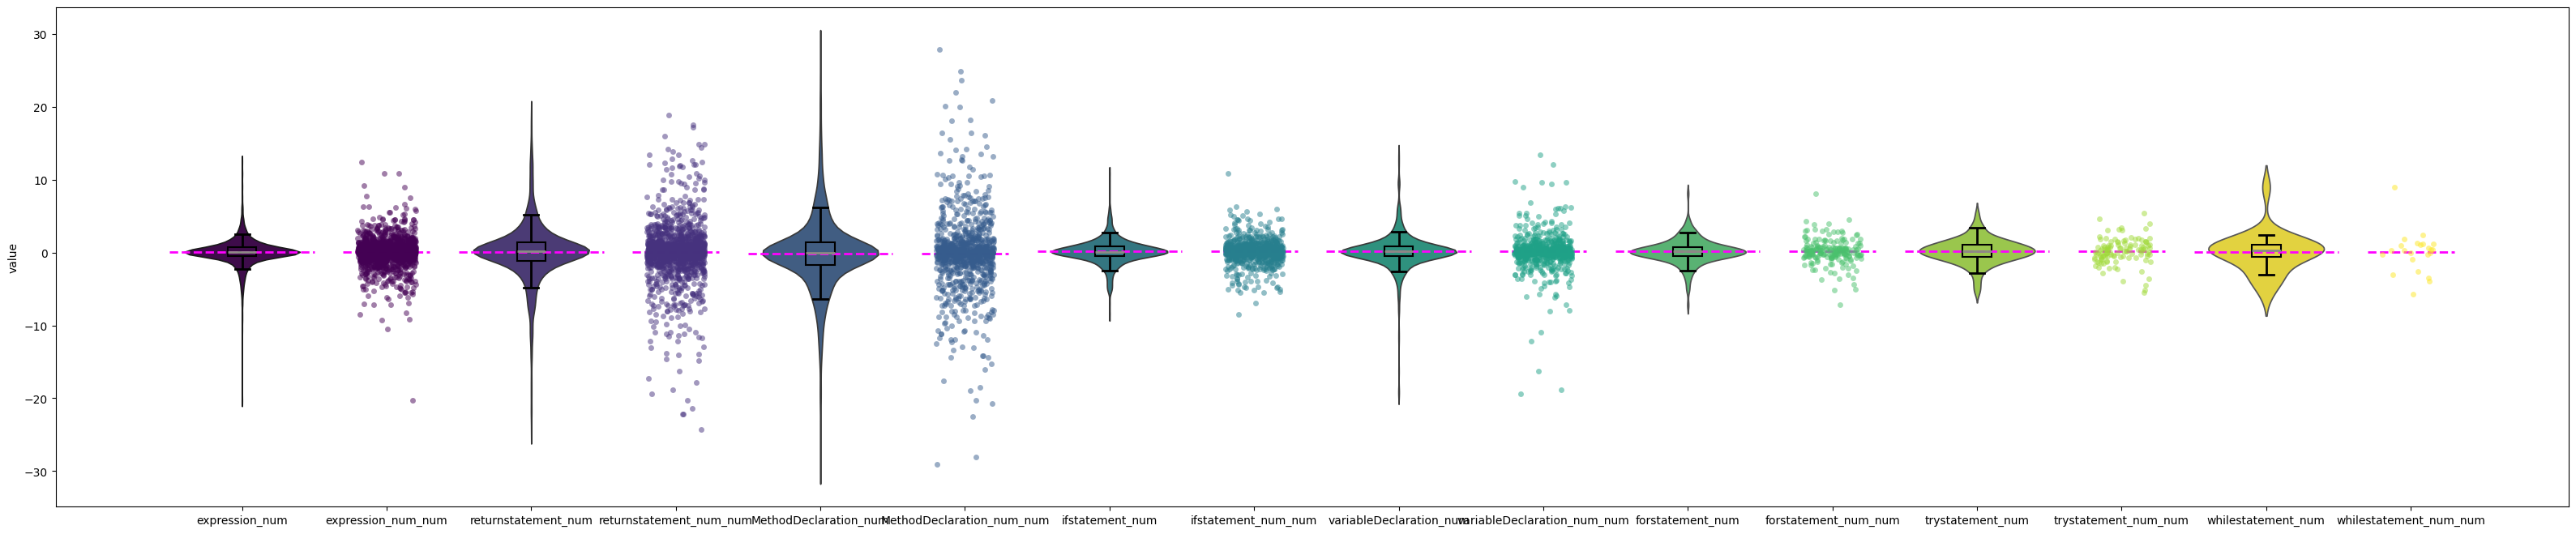

In [270]:
# 原数据  * 100  ，按照道理数据分布应不会变
all_colunm_df_false_copy = all_colunm_df_false.copy() * 10
get_paper_picture_other_color(all_colunm_df_false_copy)

绝对值均值

In [271]:
all_colunm_df_false_abs = all_colunm_df_false.abs()
all_colunm_df_false_abs.head()

expression_num  returnstatement_num  MethodDeclaration_num  \
0        0.193835             0.139482               0.012378   
1        0.052063             0.202758               0.131840   
2        0.364585             0.176777               0.425897   
3        0.091895             2.430000               1.048487   
4        0.140216             0.548456               0.224376   

   ifstatement_num  variableDeclaration_num  forstatement_num  \
0         0.052063                 0.193835          0.015434   
1         0.042921                 0.139482          0.031946   
2         0.072009                 0.202758          0.030566   
3         0.146474                 0.364585          0.074697   
4         0.477257                 0.091895          0.166823   

   trystatement_num  whilestatement_num  
0          0.015434            0.028533  
1          0.052992            0.025739  
2          0.042921            0.130149  
3          0.074167            0.895594  
4          0.043912            0.237688

In [272]:
count_greater_than_1 = (all_colunm_df_false_abs > 1).sum().sum()
count_greater_than_2 = (all_colunm_df_false_abs > 2).sum().sum()
count_greater_than_4 = (all_colunm_df_false_abs > 4).sum().sum()
count_greater_than_5 = (all_colunm_df_false_abs > 5).sum().sum()
count_greater_than_1,count_greater_than_2,count_greater_than_4,count_greater_than_5

(139, 17, 0, 0)

In [273]:
mean_abs_values_false = all_colunm_df_false_abs.mean()
print(mean_abs_values_false)

expression_num             0.110752
returnstatement_num        0.247453
MethodDeclaration_num      0.320285
ifstatement_num            0.114660
variableDeclaration_num    0.138849
forstatement_num           0.115220
trystatement_num           0.127914
whilestatement_num         0.178806
dtype: float64


expression_num             0.110752
returnstatement_num        0.247453
MethodDeclaration_num      0.320285
ifstatement_num            0.114660
variableDeclaration_num    0.138849
forstatement_num           0.115220
trystatement_num           0.127914
whilestatement_num         0.178806
dtype: float64


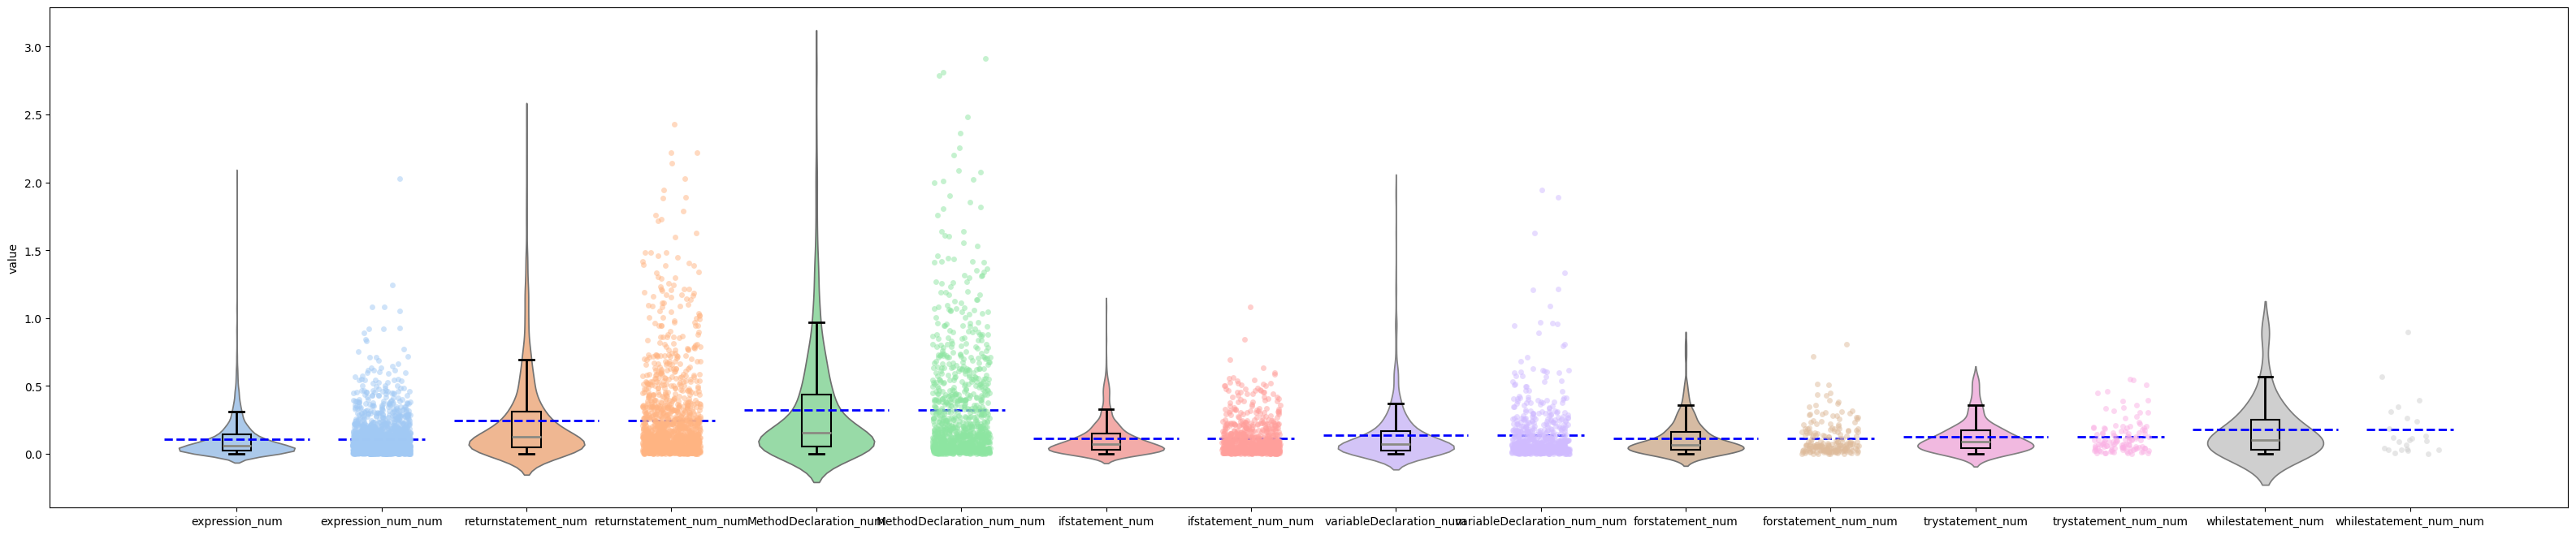

In [274]:
get_paper_picture(all_colunm_df_false_abs)

In [275]:
all_colunm_df_false_for_Winsorization = all_colunm_df_false.copy()
all_colunm_df_false_Winsorization = Winsorization_outliers(all_colunm_df_false_for_Winsorization)

列expression_num的第1个分位数-0.5450521511900001,第99个分位数0.49759185793999805
列returnstatement_num的第1个分位数-1.39084845568,第99个分位数1.237433398160001
列MethodDeclaration_num的第1个分位数-1.47390020628,第99个分位数1.64044497428
列ifstatement_num的第1个分位数-0.50479301836,第99个分位数0.5031598272799997
列variableDeclaration_num的第1个分位数-0.75646301781,第99个分位数0.7923936659799942
列forstatement_num的第1个分位数-0.5059817396,第99个分位数0.42969988800000025
列trystatement_num的第1个分位数-0.50409352816,第99个分位数0.4541694656799997
列whilestatement_num的第1个分位数-0.53025835394,第99个分位数0.7508544748800008


expression_num             0.006117
returnstatement_num        0.008414
MethodDeclaration_num     -0.011694
ifstatement_num            0.012193
variableDeclaration_num    0.015795
forstatement_num           0.015750
trystatement_num           0.018717
whilestatement_num        -0.013586
dtype: float64


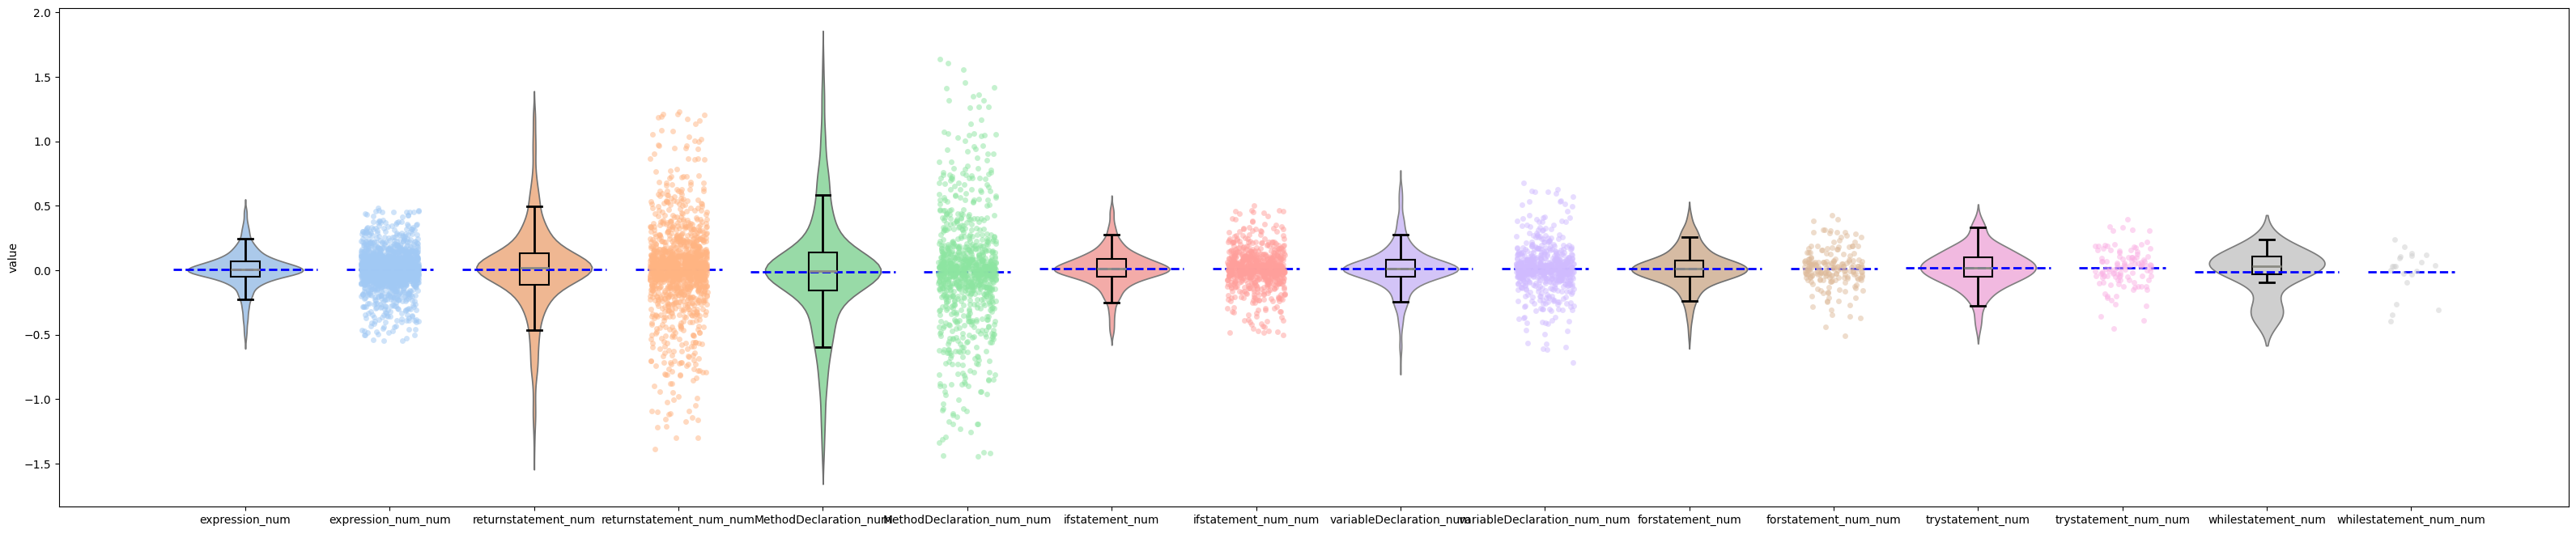

In [276]:
get_paper_picture(all_colunm_df_false_Winsorization)

expression_num             0.097263
returnstatement_num        0.217763
MethodDeclaration_num      0.282715
ifstatement_num            0.103827
variableDeclaration_num    0.115667
forstatement_num           0.104637
trystatement_num           0.113644
whilestatement_num         0.126110
dtype: float64


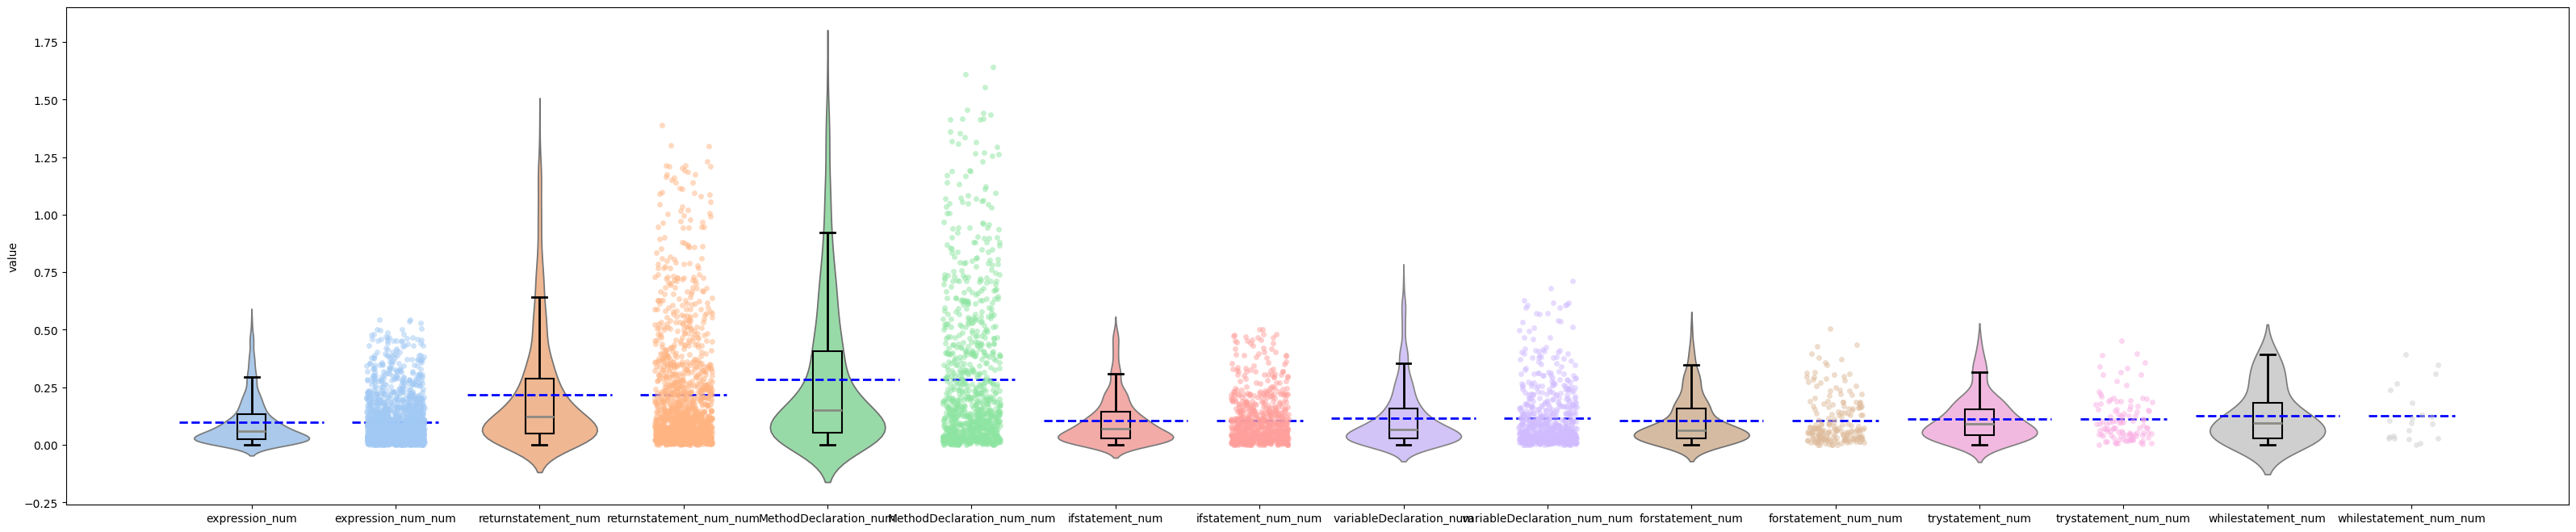

In [277]:
all_colunm_df_Winsorization_false_abs = all_colunm_df_false_Winsorization.abs()
get_paper_picture(all_colunm_df_Winsorization_false_abs)

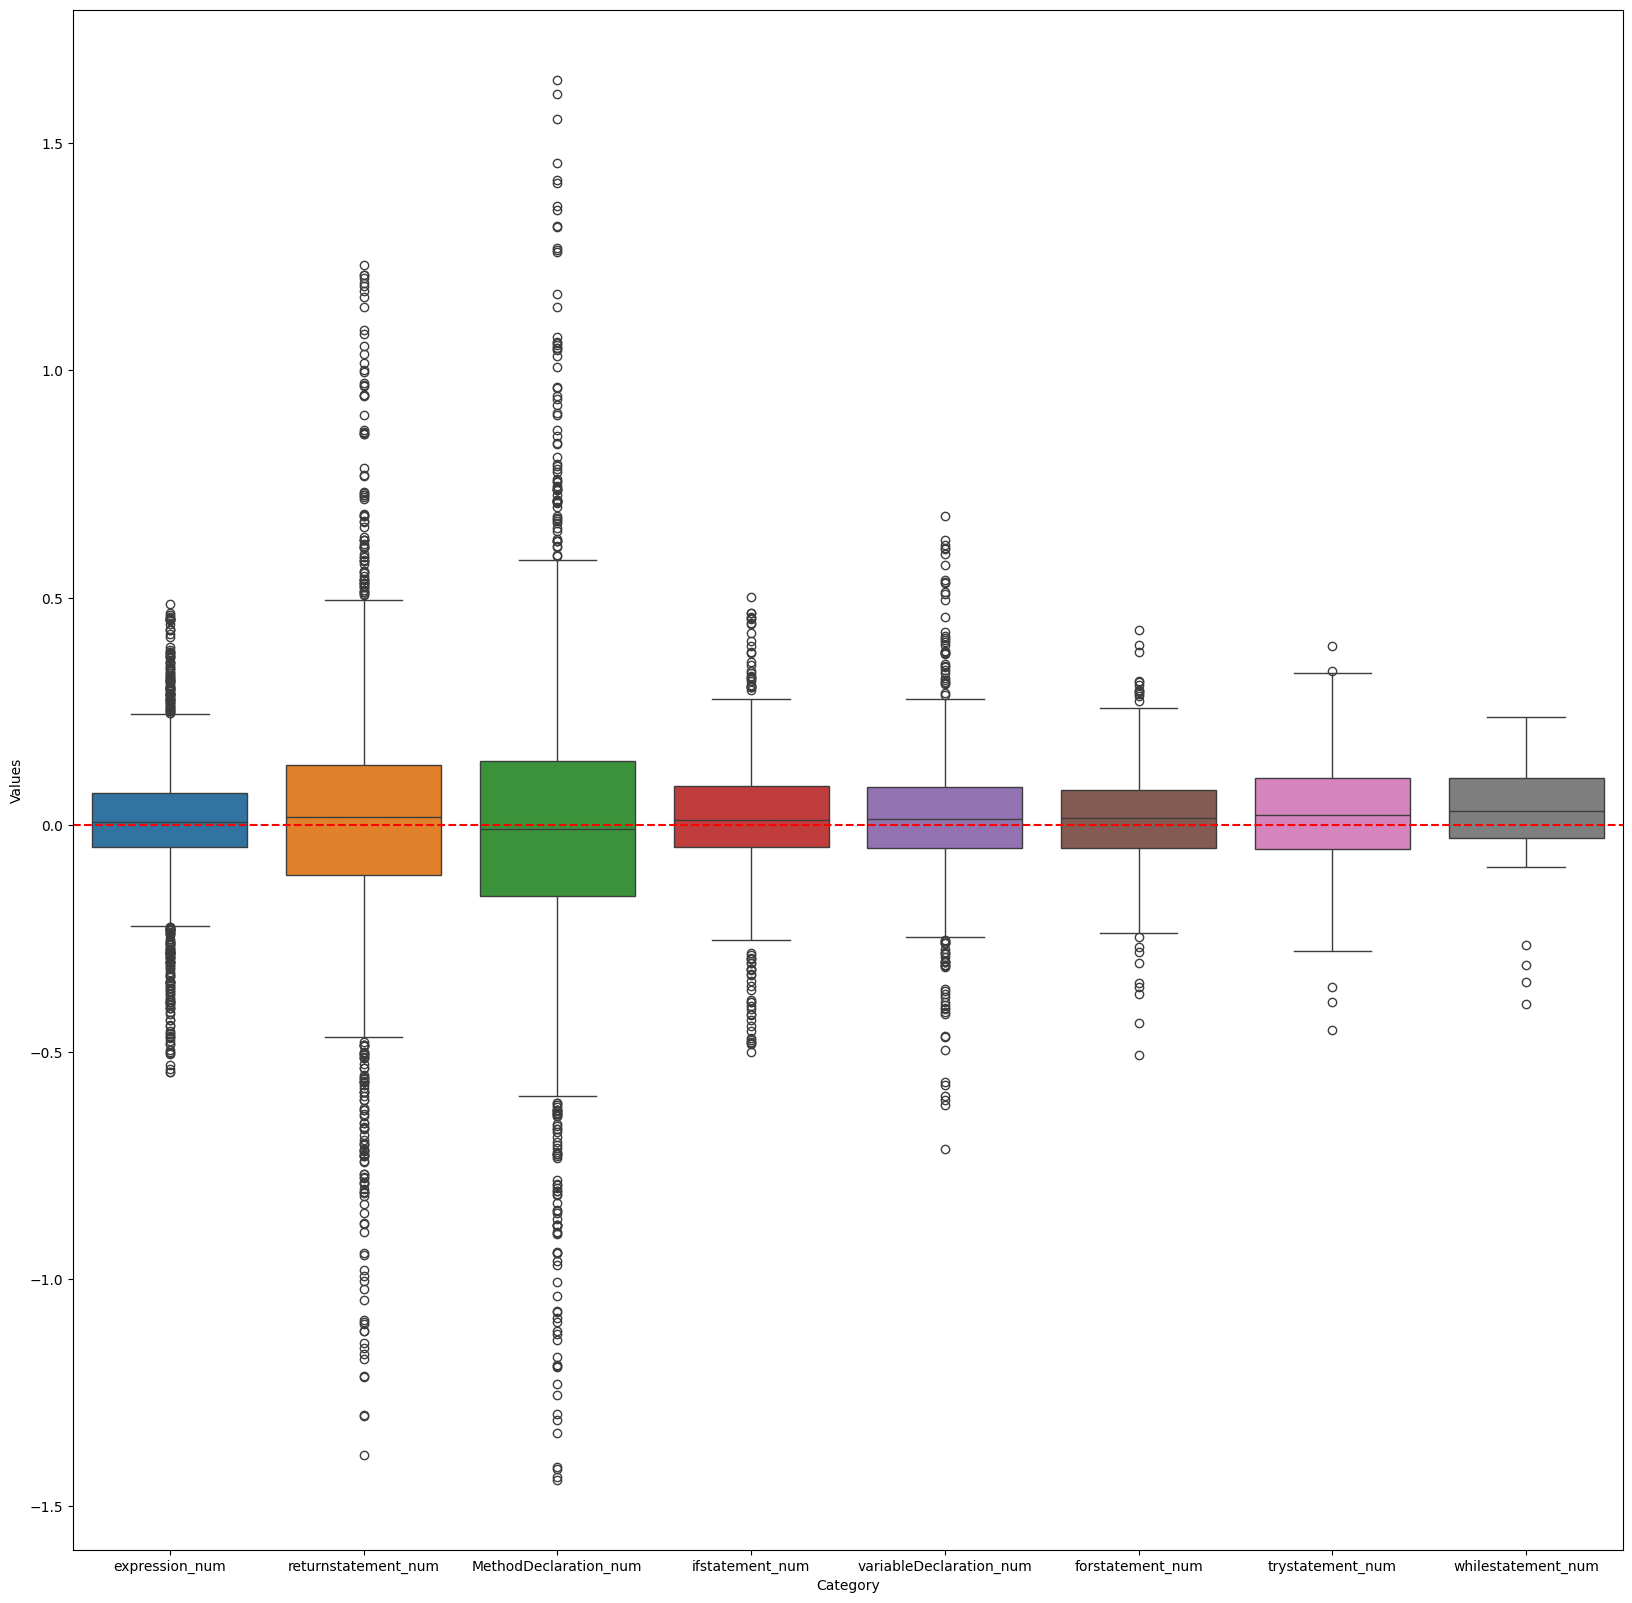

In [278]:
# 绘制箱线图
plt.figure(figsize=(20, 20))
sns.boxplot(data=all_colunm_df_false_Winsorization)

plt.xlabel('Category')
plt.ylabel('Values')
plt.axhline(y=0, color='r', linestyle='--')

plt.show()

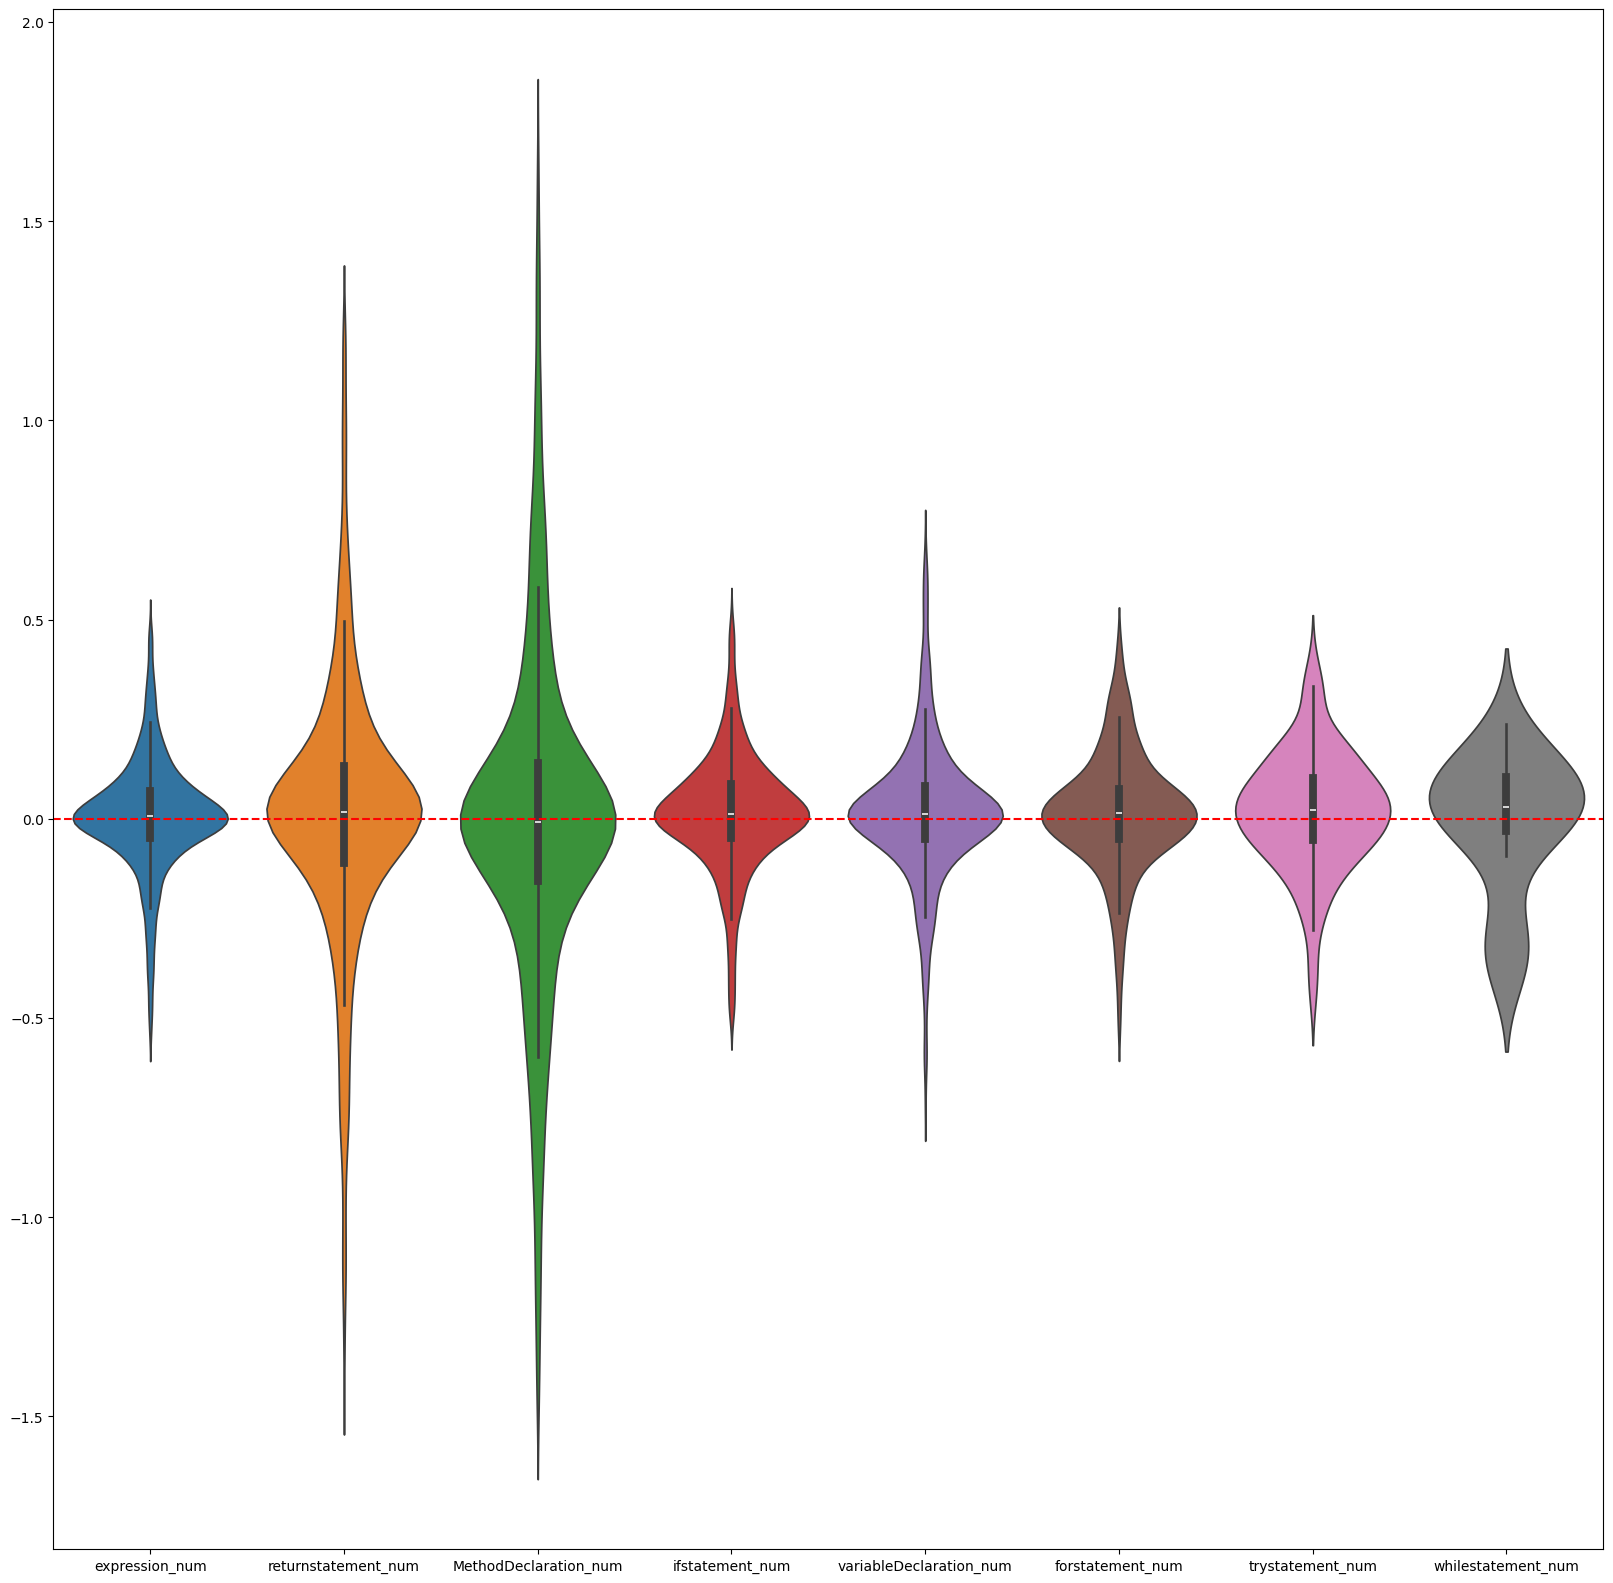

In [279]:
# Winsorization 小提琴图
plt.figure(figsize=(20,20))
sns.violinplot(data=all_colunm_df_false_Winsorization)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [280]:
all_colunm_df_false_for_iqr = all_colunm_df_false.copy()
all_colunm_df_false_iqr = iqr_outliers(all_colunm_df_false_for_iqr)

下四分位数-0.049042171,上四分位数0.0718462945,最小值下界-0.23037486925000003,最大值上界0.25317899275000005
下四分位数-0.1153265,上四分位数0.138486242,最小值下界-0.49604561300000005,最大值上界0.5192053550000001
下四分位数-0.16839966099999998,上四分位数0.145037152,最小值下界-0.6385548804999999,最大值上界0.6151923715
下四分位数-0.050416134,上四分位数0.08885790000000002,最小值下界-0.259327185,最大值上界0.297768951
下四分位数-0.05287278925,上四分位数0.08358321375000001,最小值下界-0.25755679375,最大值上界0.28826721825
下四分位数-0.05304345825,上四分位数0.07831115125,最小值下界-0.2500753725,最大值上界0.2753430655
下四分位数-0.056428278,上四分位数0.103169069,最小值下界-0.2958242985,最大值上界0.3425650895
下四分位数-0.0607881455,上四分位数0.1092668175,最小值下界-0.31587059,最大值上界0.364349262


expression_num             0.011169
returnstatement_num        0.019317
MethodDeclaration_num     -0.017792
ifstatement_num            0.015147
variableDeclaration_num    0.013879
forstatement_num           0.013278
trystatement_num           0.027084
whilestatement_num         0.023917
dtype: float64


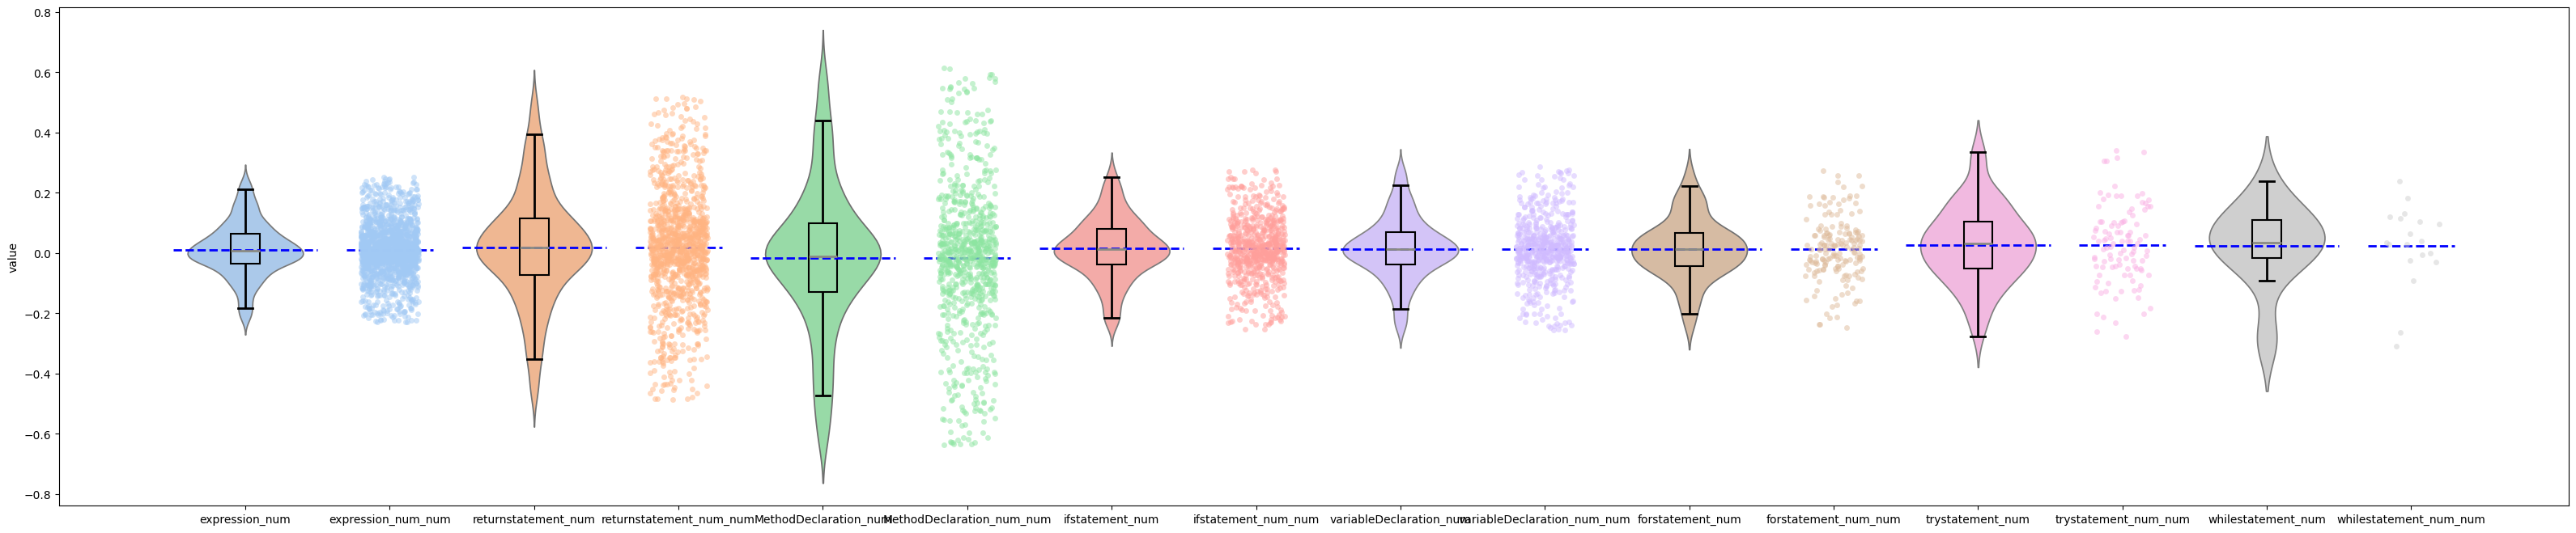

In [281]:
get_paper_picture(all_colunm_df_false_iqr)

expression_num             0.069286
returnstatement_num        0.139122
MethodDeclaration_num      0.176804
ifstatement_num            0.079798
variableDeclaration_num    0.077909
forstatement_num           0.078707
trystatement_num           0.102803
whilestatement_num         0.100451
dtype: float64


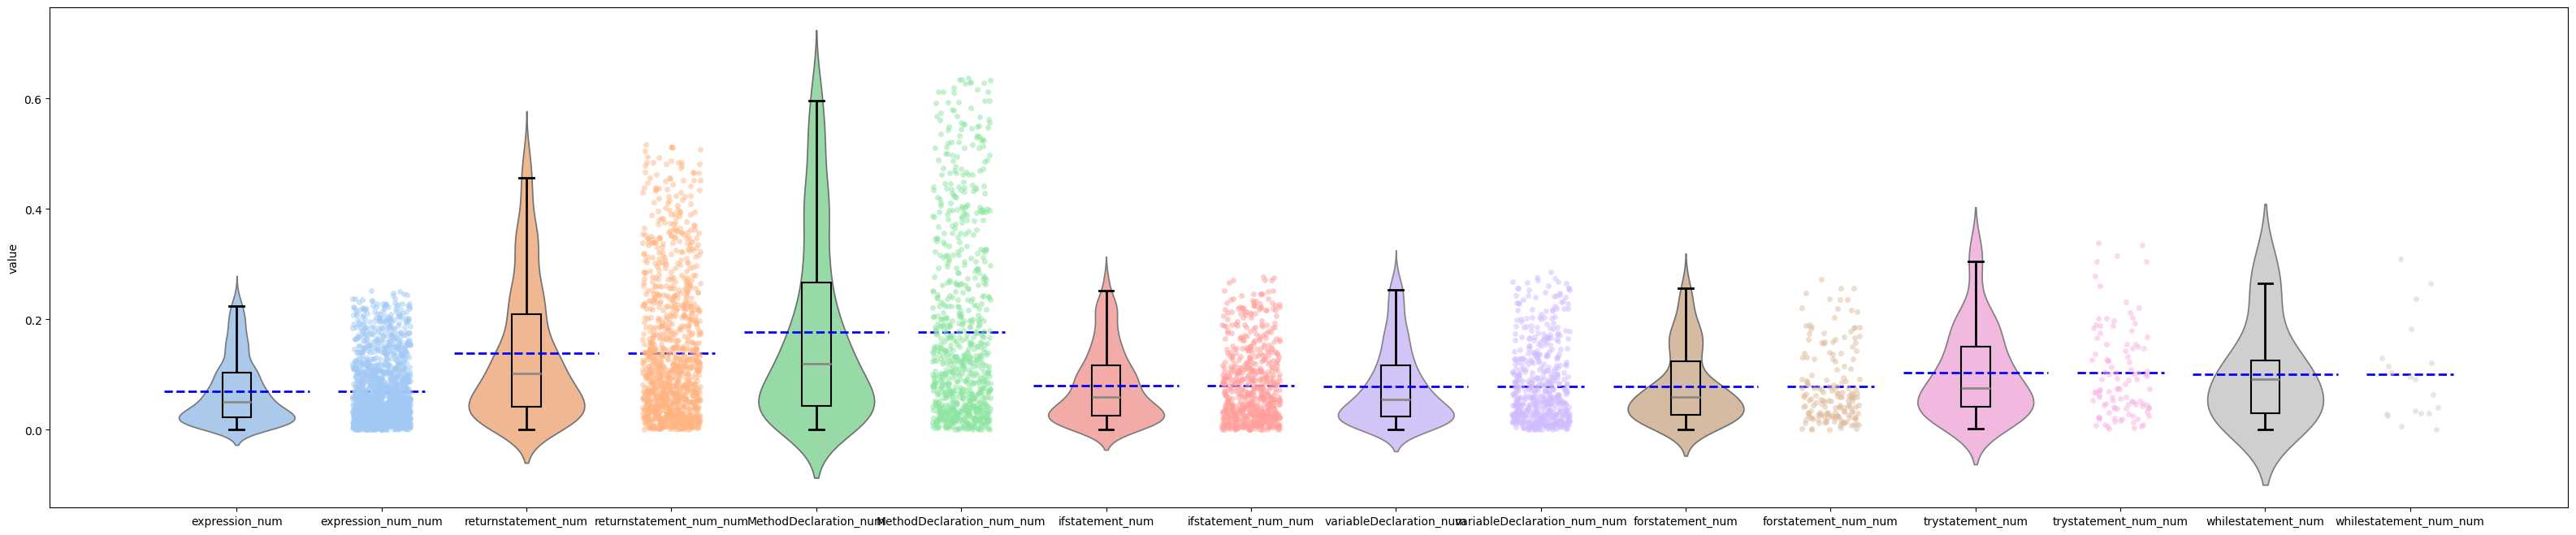

In [282]:
all_colunm_df_iqr_false_abs = all_colunm_df_false_iqr.abs()
get_paper_picture(all_colunm_df_iqr_false_abs)

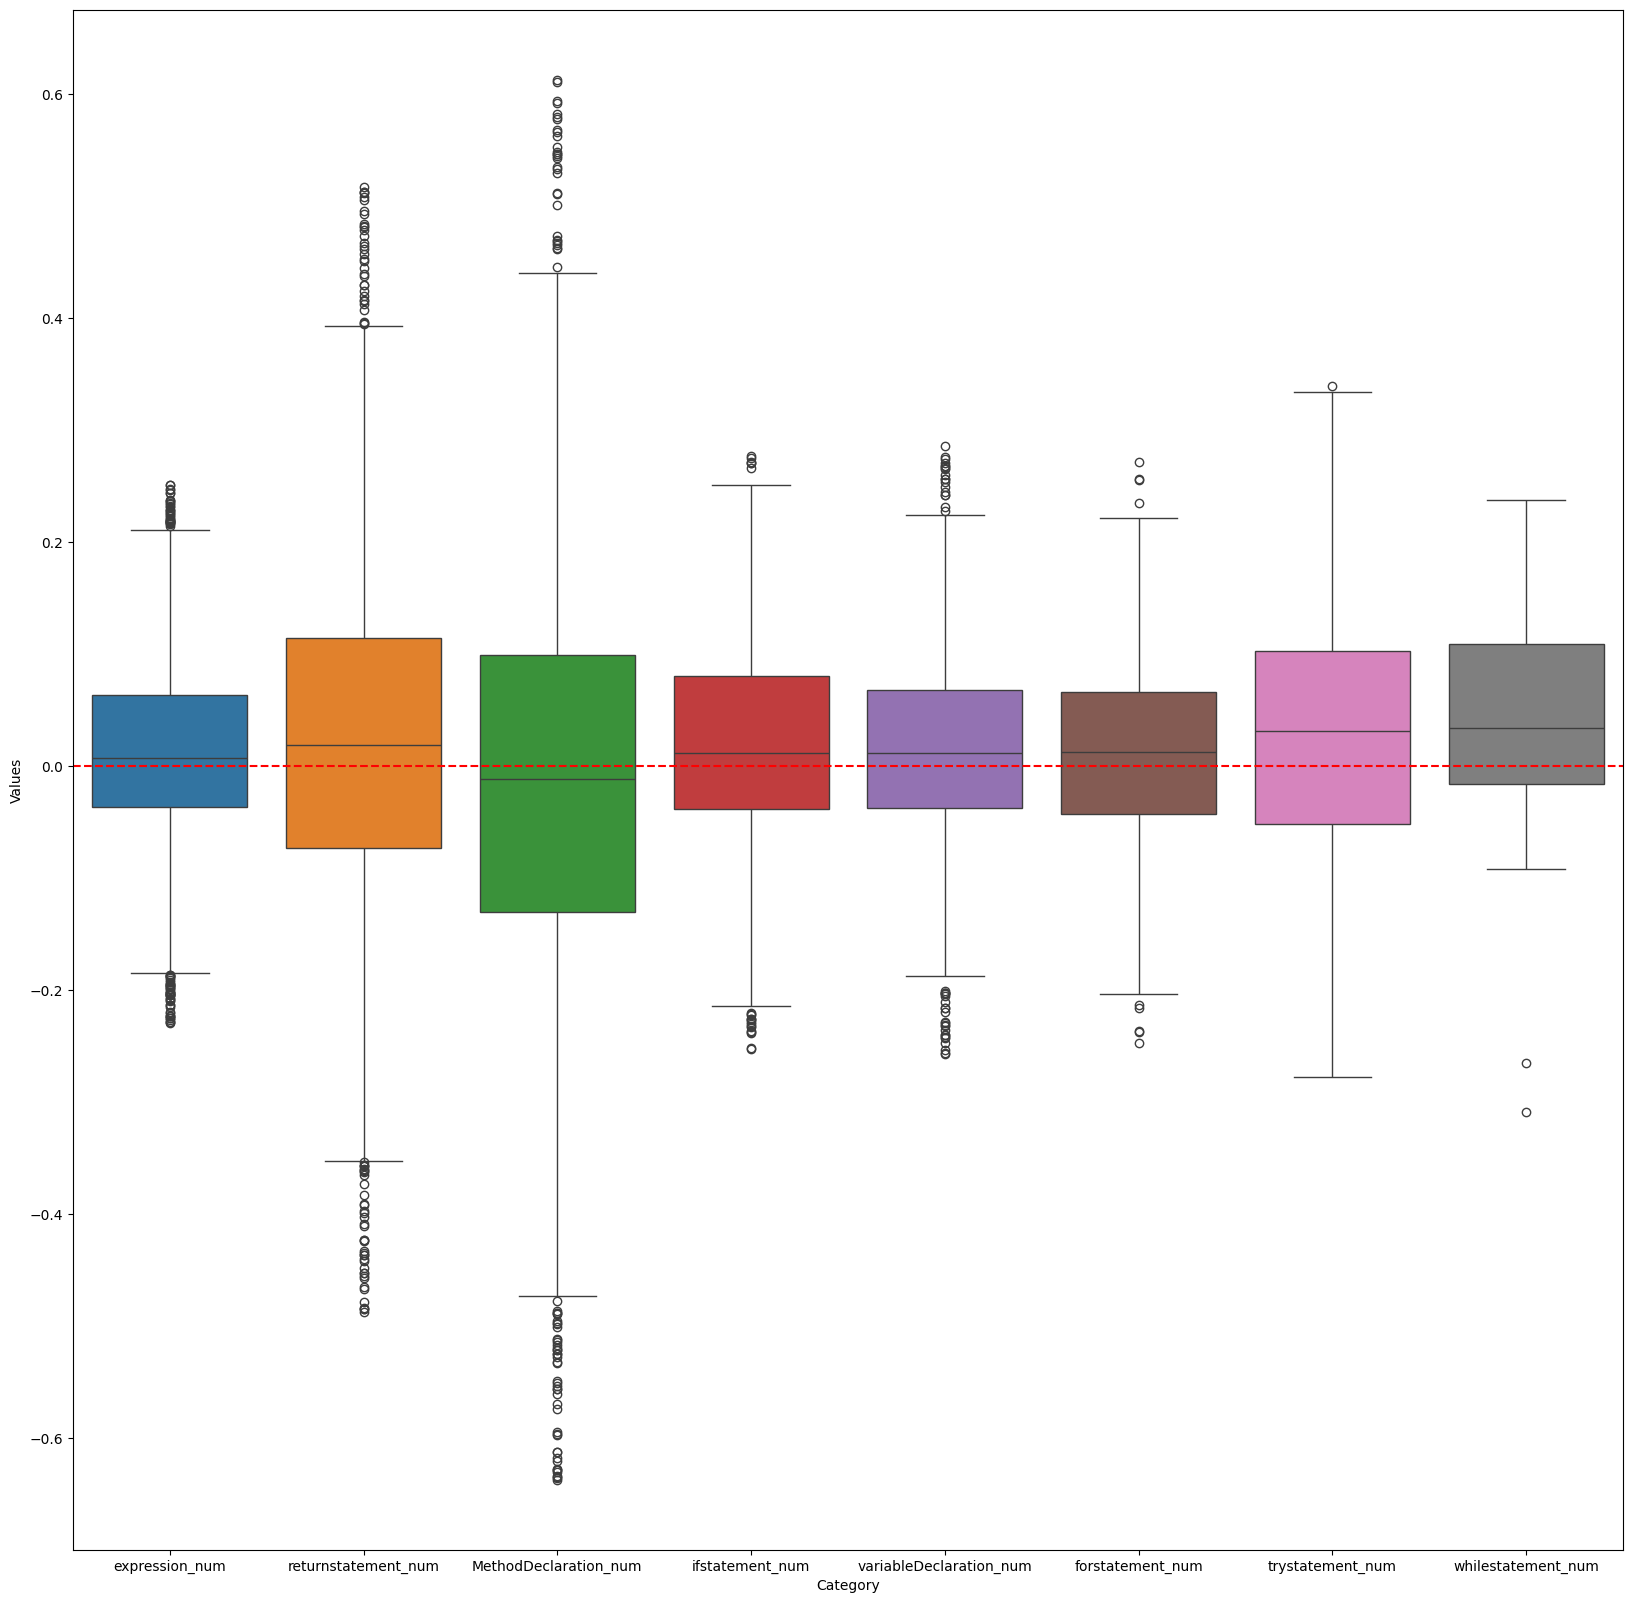

In [283]:
# 绘制箱线图
plt.figure(figsize=(20, 20))
sns.boxplot(data=all_colunm_df_false_iqr)

plt.xlabel('Category')
plt.ylabel('Values')
plt.axhline(y=0, color='r', linestyle='--')

# 保存图形为图片文件
# plt.savefig('boxplot.png', dpi=300, bbox_inches='tight')

plt.show()

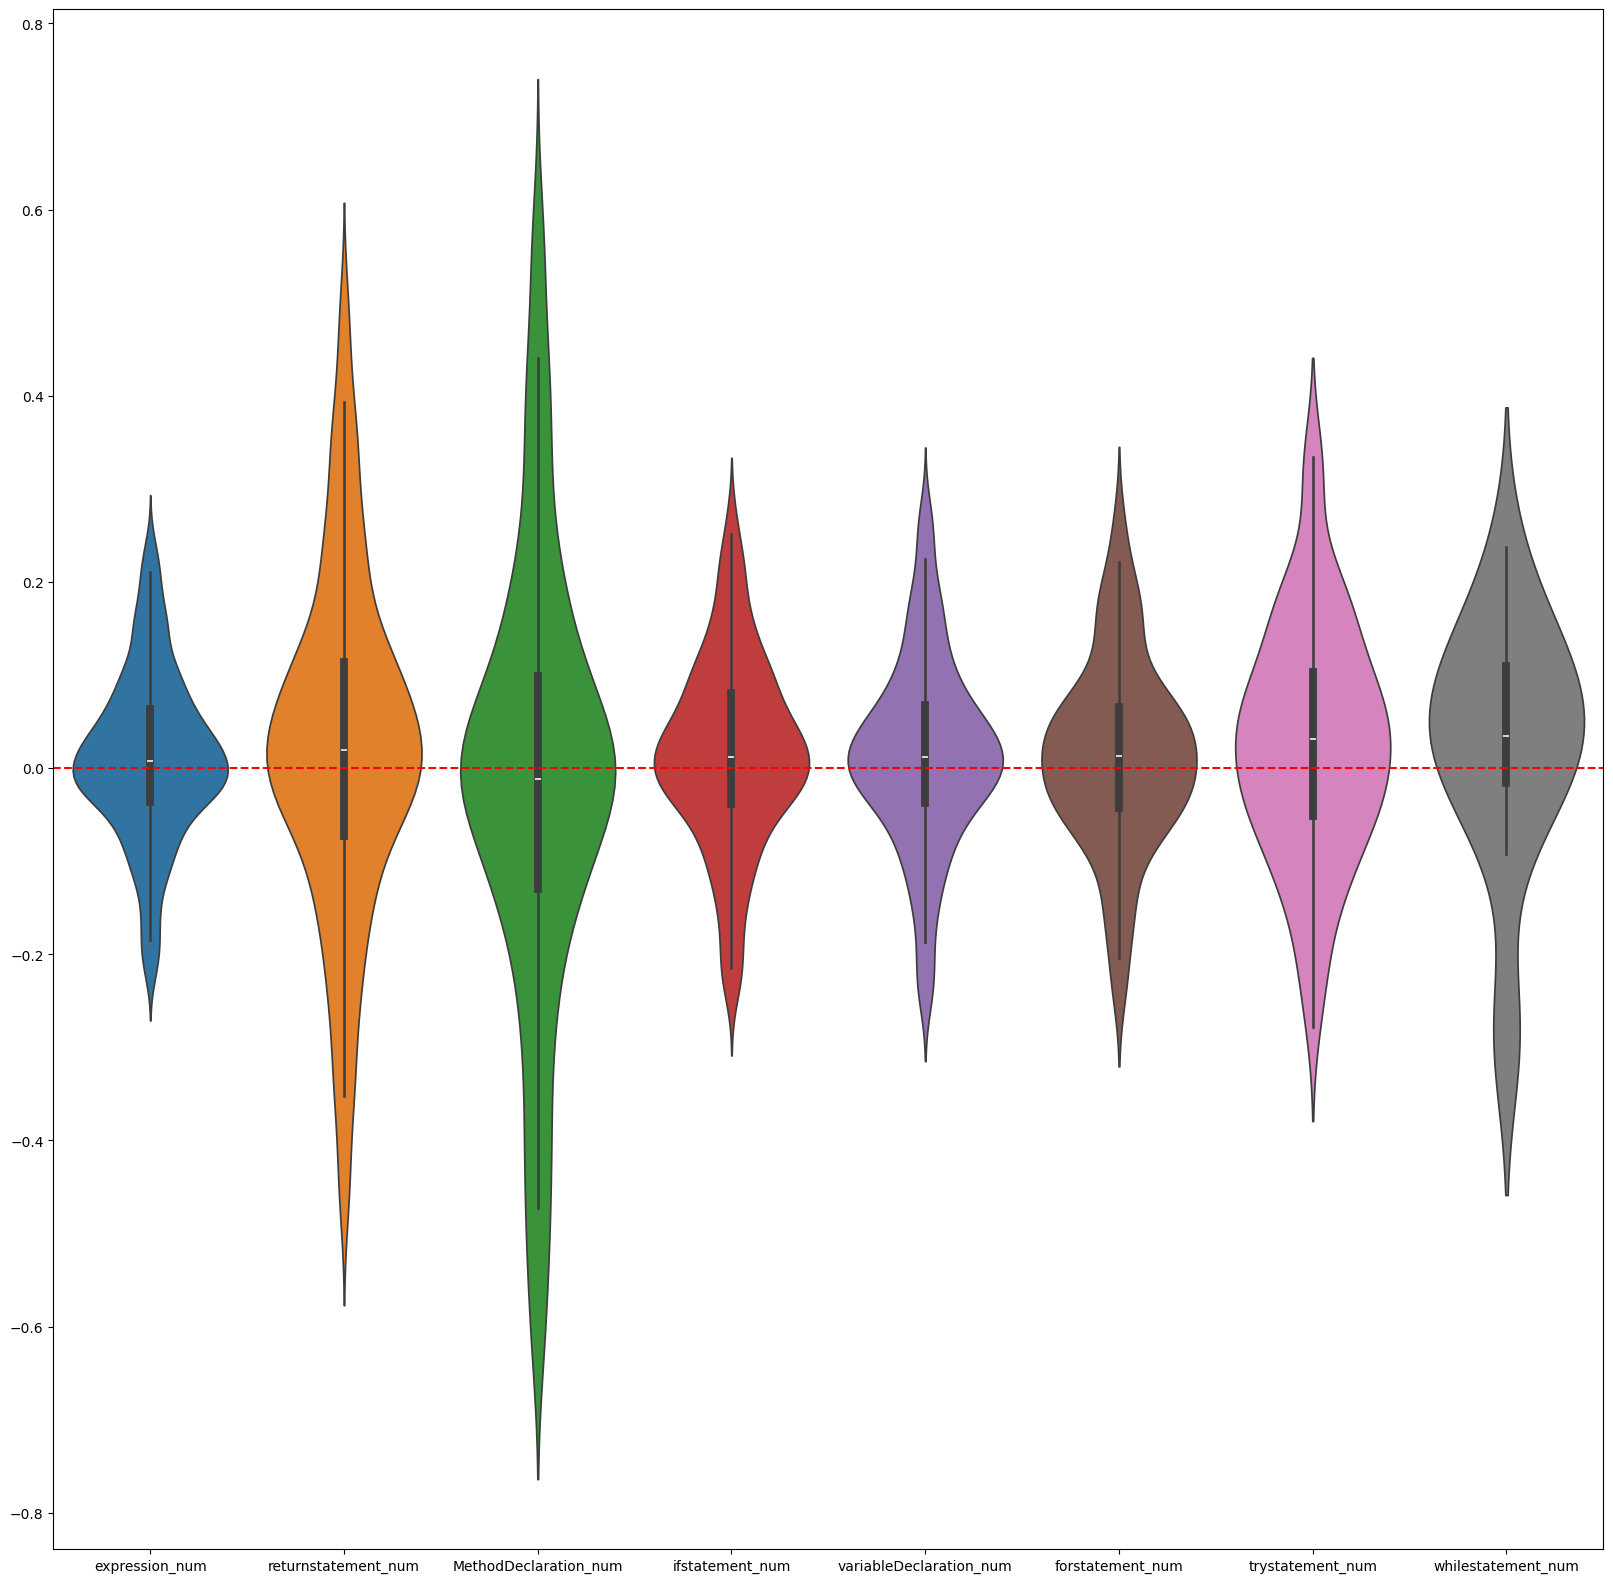

In [284]:
# iqr 小提琴图
plt.figure(figsize=(20,20))
sns.violinplot(data=all_colunm_df_false_iqr)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

这个是 * 100 的 用不上 

In [285]:
linelevel_attribution_false = pd.read_json('linelevel_attribution_false.json')
linelevel_attribution_true = pd.read_json('linelevel_attribution_true.json')
linelevel_attribution_false['value'] = linelevel_attribution_false['value'] * 100
linelevel_attribution_true['value'] = linelevel_attribution_true['value'] * 100

In [286]:
def clean_data(df):
    for column_name in df.columns:
        for index,_ in df.iterrows():
            i = df.at[index, column_name]
            if i > 180 or i < -180:
                df.at[index, column_name] = np.nan
    return df


true

In [287]:
linelevel_attribution_true = get_all_colunm_df(linelevel_attribution_true)
linelevel_attribution_true_copy = linelevel_attribution_true.copy()
all_colunm_df = clean_data(linelevel_attribution_true_copy)

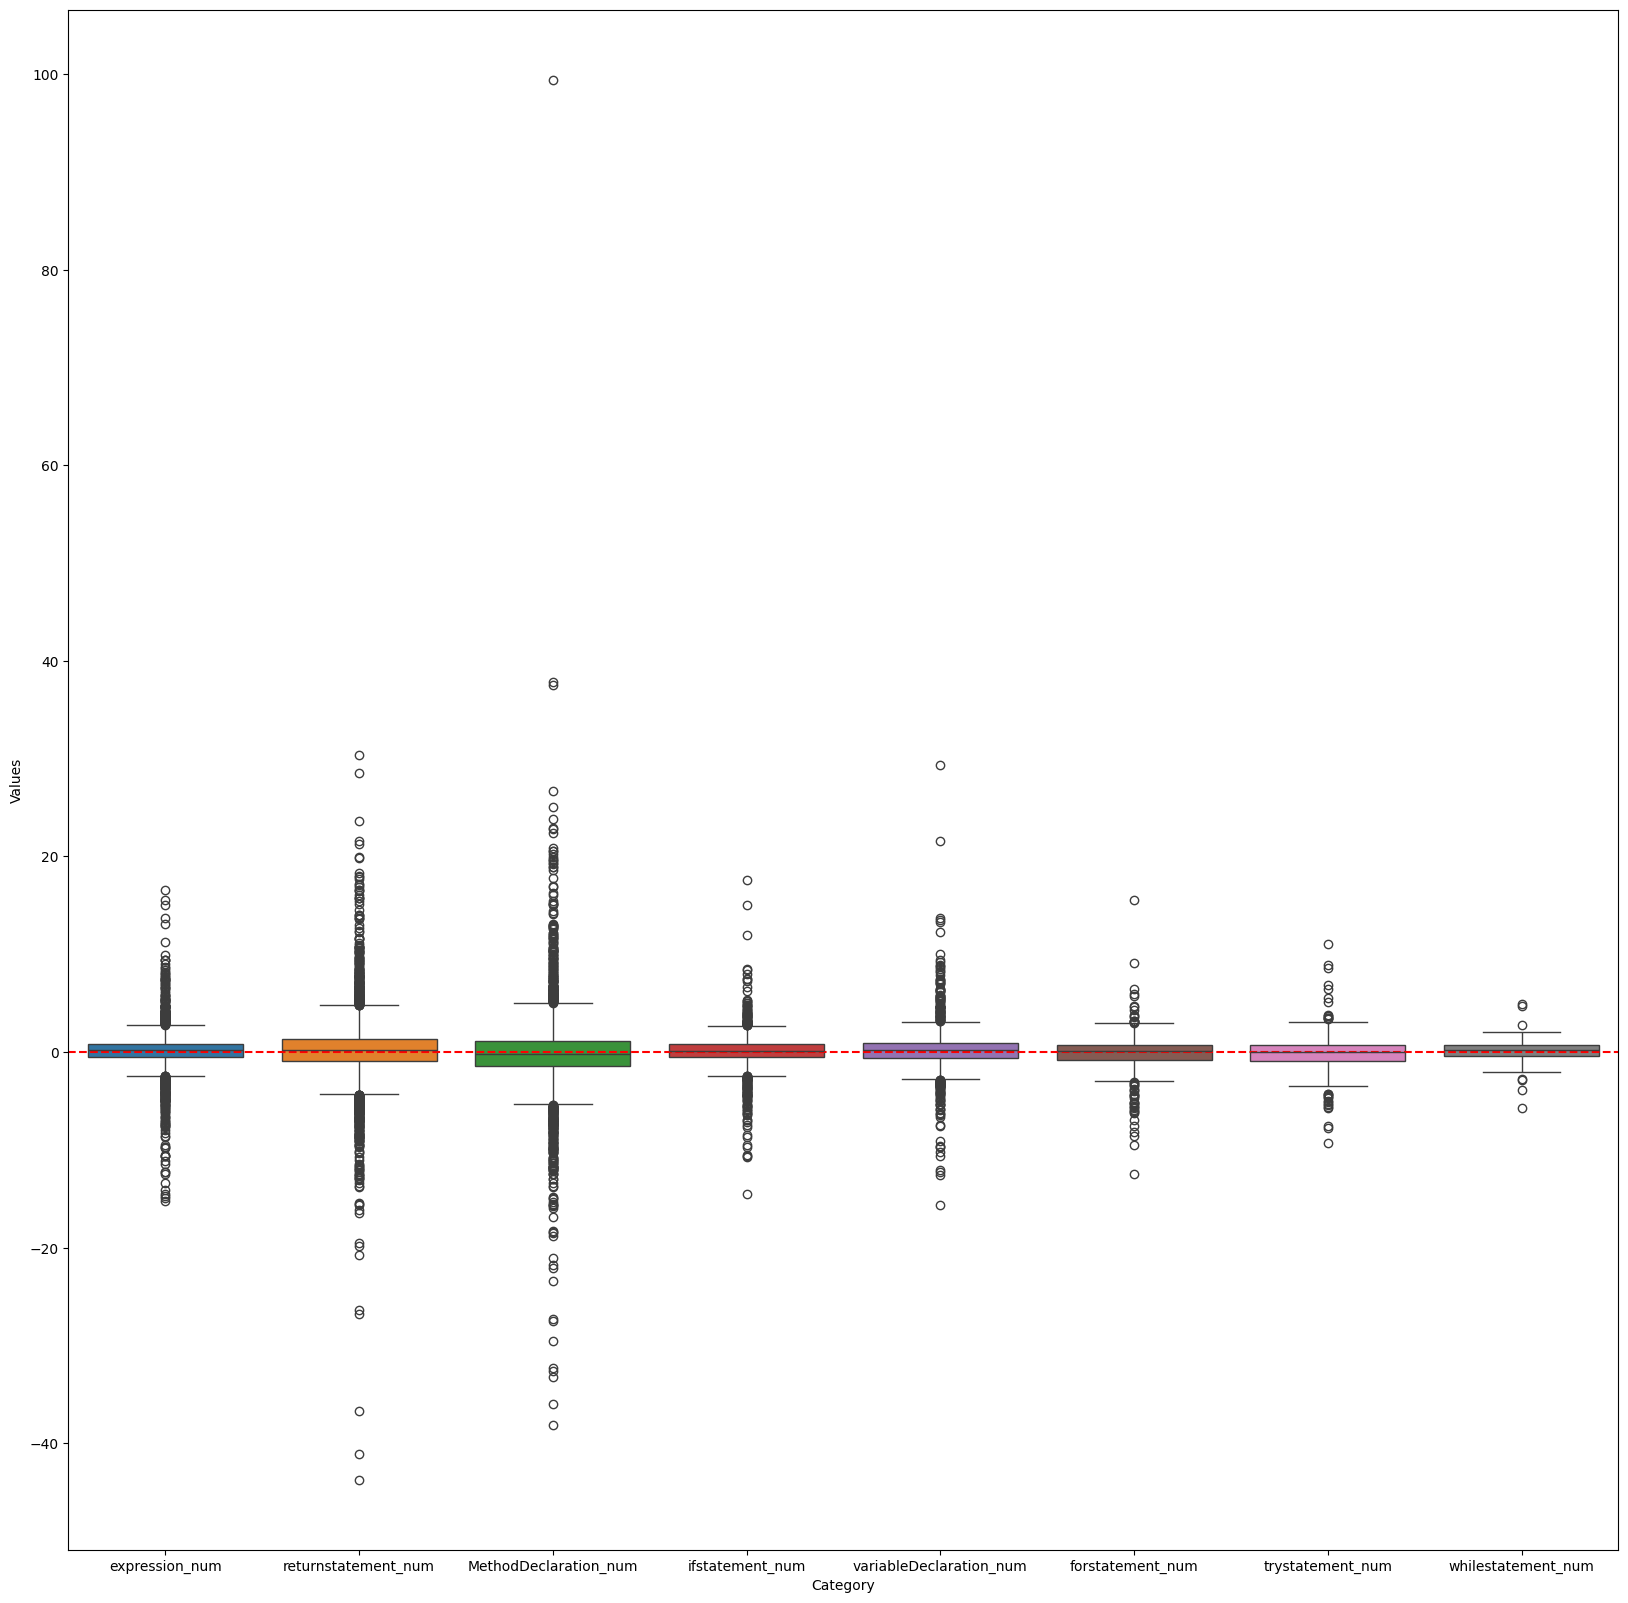

In [288]:
# 绘制箱线图
plt.figure(figsize=(20, 20))
sns.boxplot(data=all_colunm_df)

plt.xlabel('Category')
plt.ylabel('Values')

plt.axhline(y=0, color='r', linestyle='--')
plt.show()

列expression_num的第1个分位数-5.8607160022,第99个分位数5.487505199599984
列returnstatement_num的第1个分位数-11.5898541216,第99个分位数12.796566937200046
列MethodDeclaration_num的第1个分位数-15.406791286399999,第99个分位数18.000435060399987
列ifstatement_num的第1个分位数-5.8640354059,第99个分位数4.727679175199993
列variableDeclaration_num的第1个分位数-6.254275037999999,第99个分位数8.041537126000026
列forstatement_num的第1个分位数-6.47687309,第99个分位数4.605896086600004
列trystatement_num的第1个分位数-5.7464081908,第99个分位数6.837417618399999
列whilestatement_num的第1个分位数-4.511275732300001,第99个分位数4.7850189625


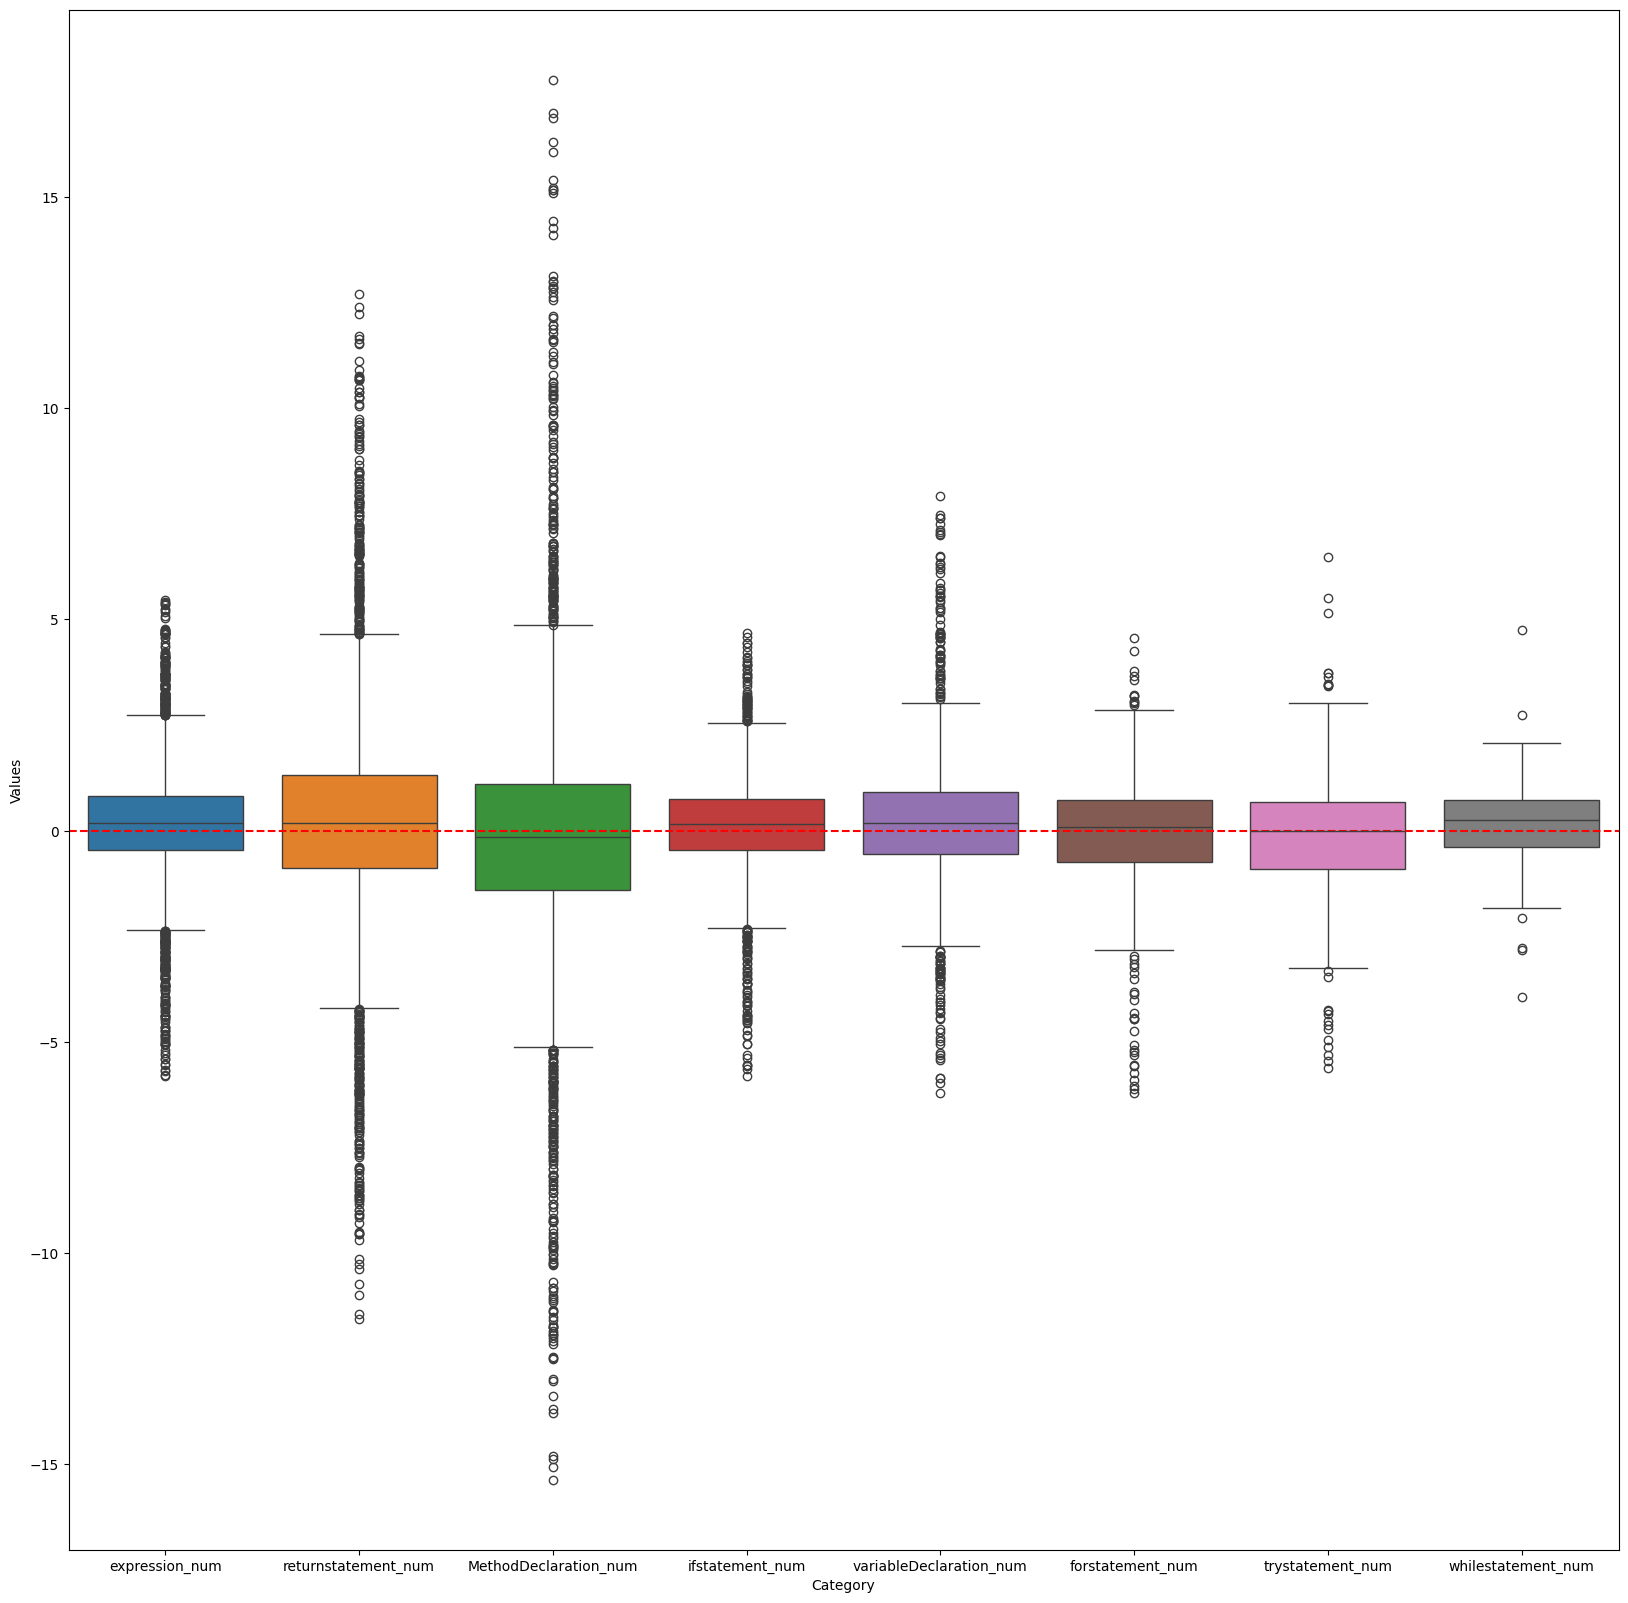

In [289]:
all_colunm_df_for_Winsorization = all_colunm_df.copy()
all_colunm_df_Winsorization = Winsorization_outliers(all_colunm_df_for_Winsorization)

# 绘制箱线图
plt.figure(figsize=(20, 20))
sns.boxplot(data=all_colunm_df_Winsorization)

plt.xlabel('Category')
plt.ylabel('Values')
plt.axhline(y=0, color='r', linestyle='--')

plt.show()

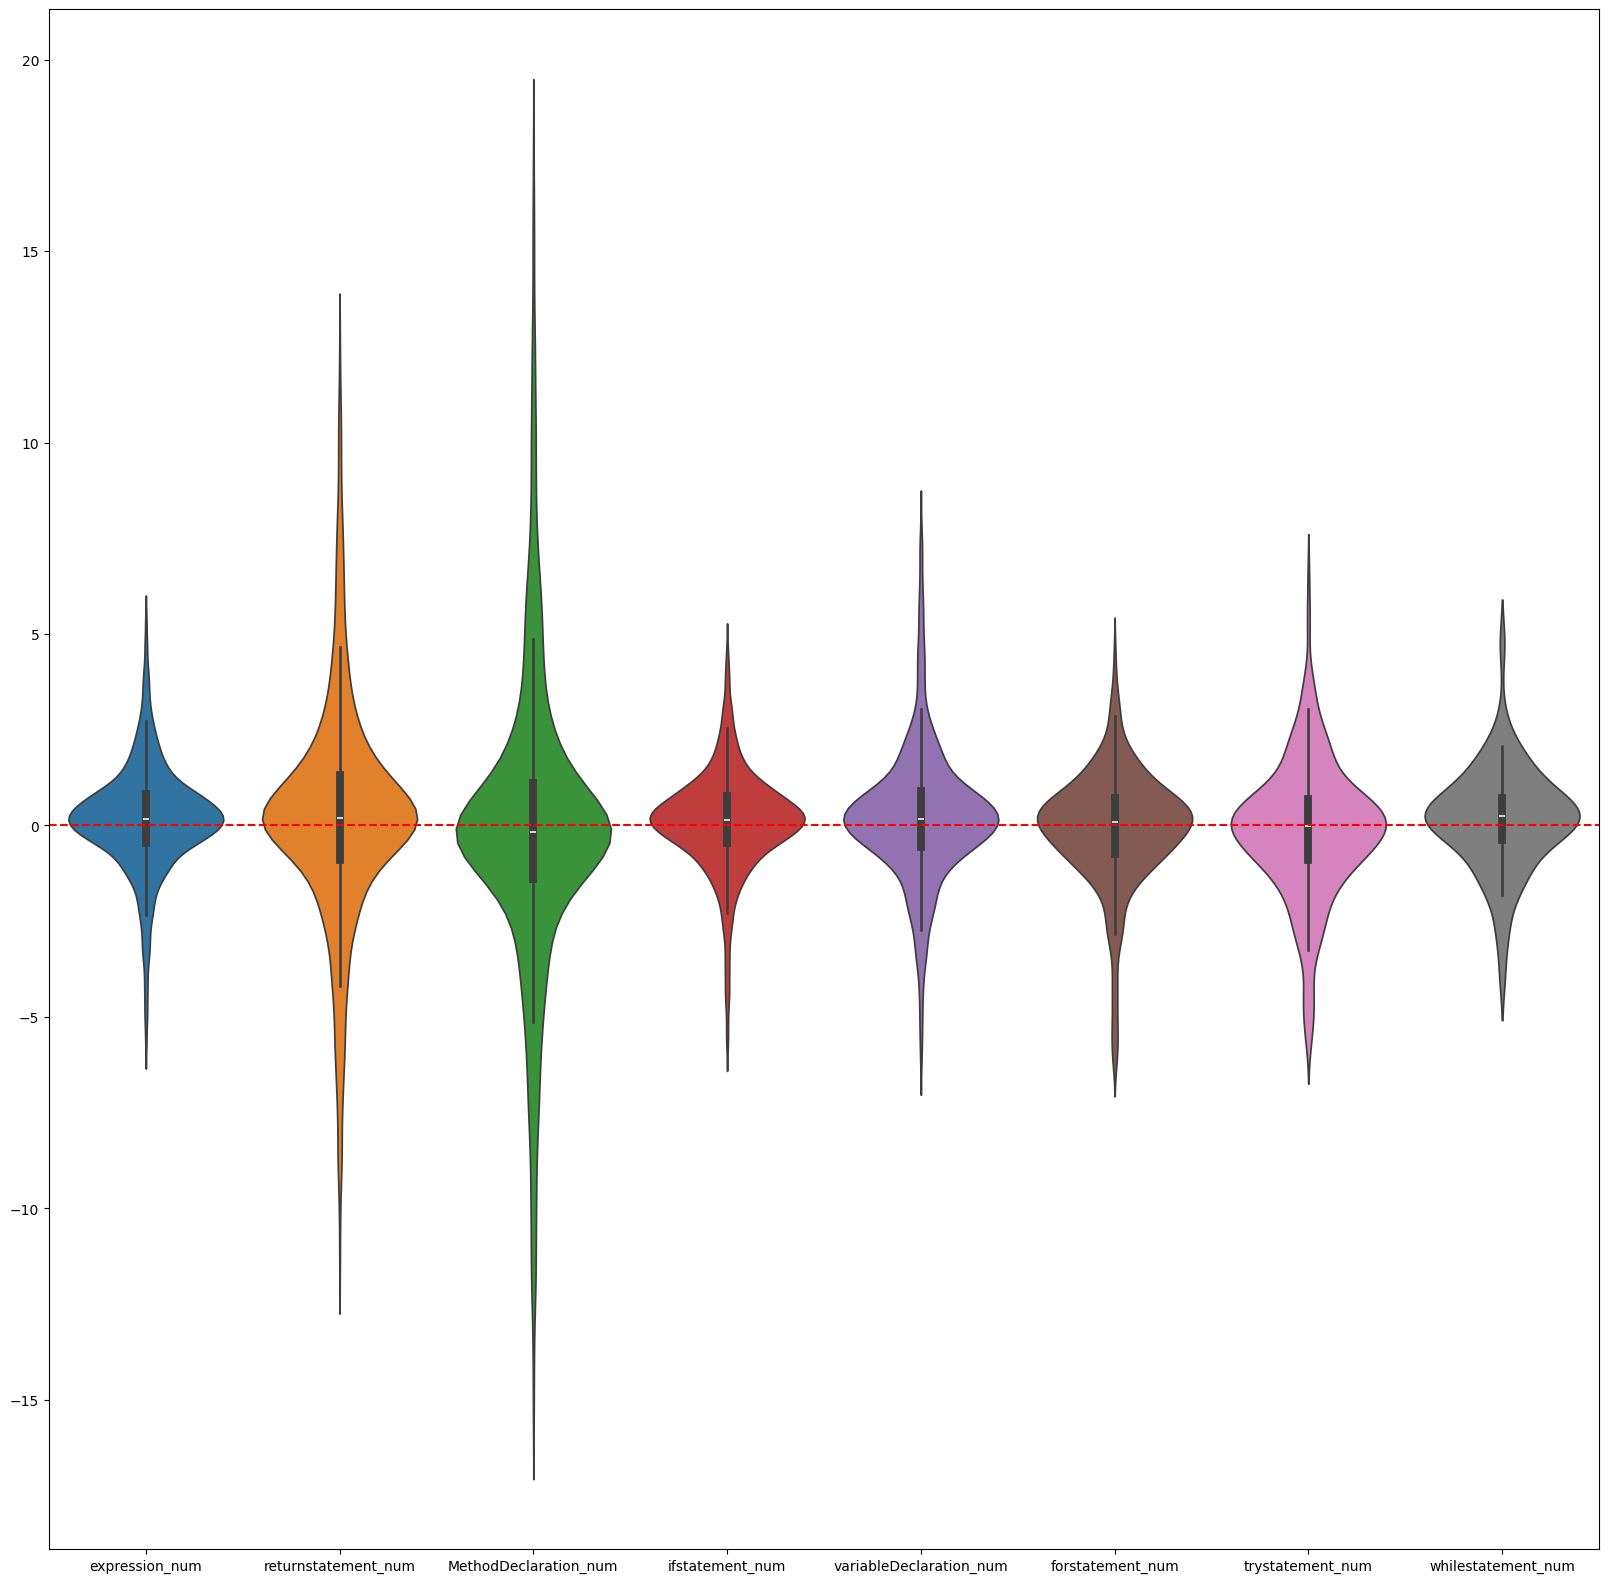

In [290]:
# Winsorization 小提琴图
plt.figure(figsize=(20,20))
sns.violinplot(data=all_colunm_df_Winsorization)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

下四分位数-0.47109599,上四分位数0.8409236850000001,最小值下界-2.4391255025000005,最大值上界2.8089531975
下四分位数-0.9212901000000001,上四分位数1.36373932,最小值下界-4.3488342300000005,最大值上界4.79128345
下四分位数-1.4422835875,上四分位数1.1582931175000002,最小值下界-5.343148644999999,最大值上界5.059158175
下四分位数-0.49094056500000005,上四分位数0.7909114075000001,最小值下界-2.41371852375,最大值上界2.7136893662500006
下四分位数-0.566338,上四分位数0.9224956799999999,最小值下界-2.79958852,最大值上界3.1557462
下四分位数-0.771169565,上四分位数0.738741835,最小值下界-3.036036665,最大值上界3.003608935
下四分位数-0.94124529,上四分位数0.75847757,最小值下界-3.49082958,最大值上界3.3080618600000005
下四分位数-0.38585701000000006,上四分位数0.7311296475,最小值下界-2.06133699625,最大值上界2.40660963375


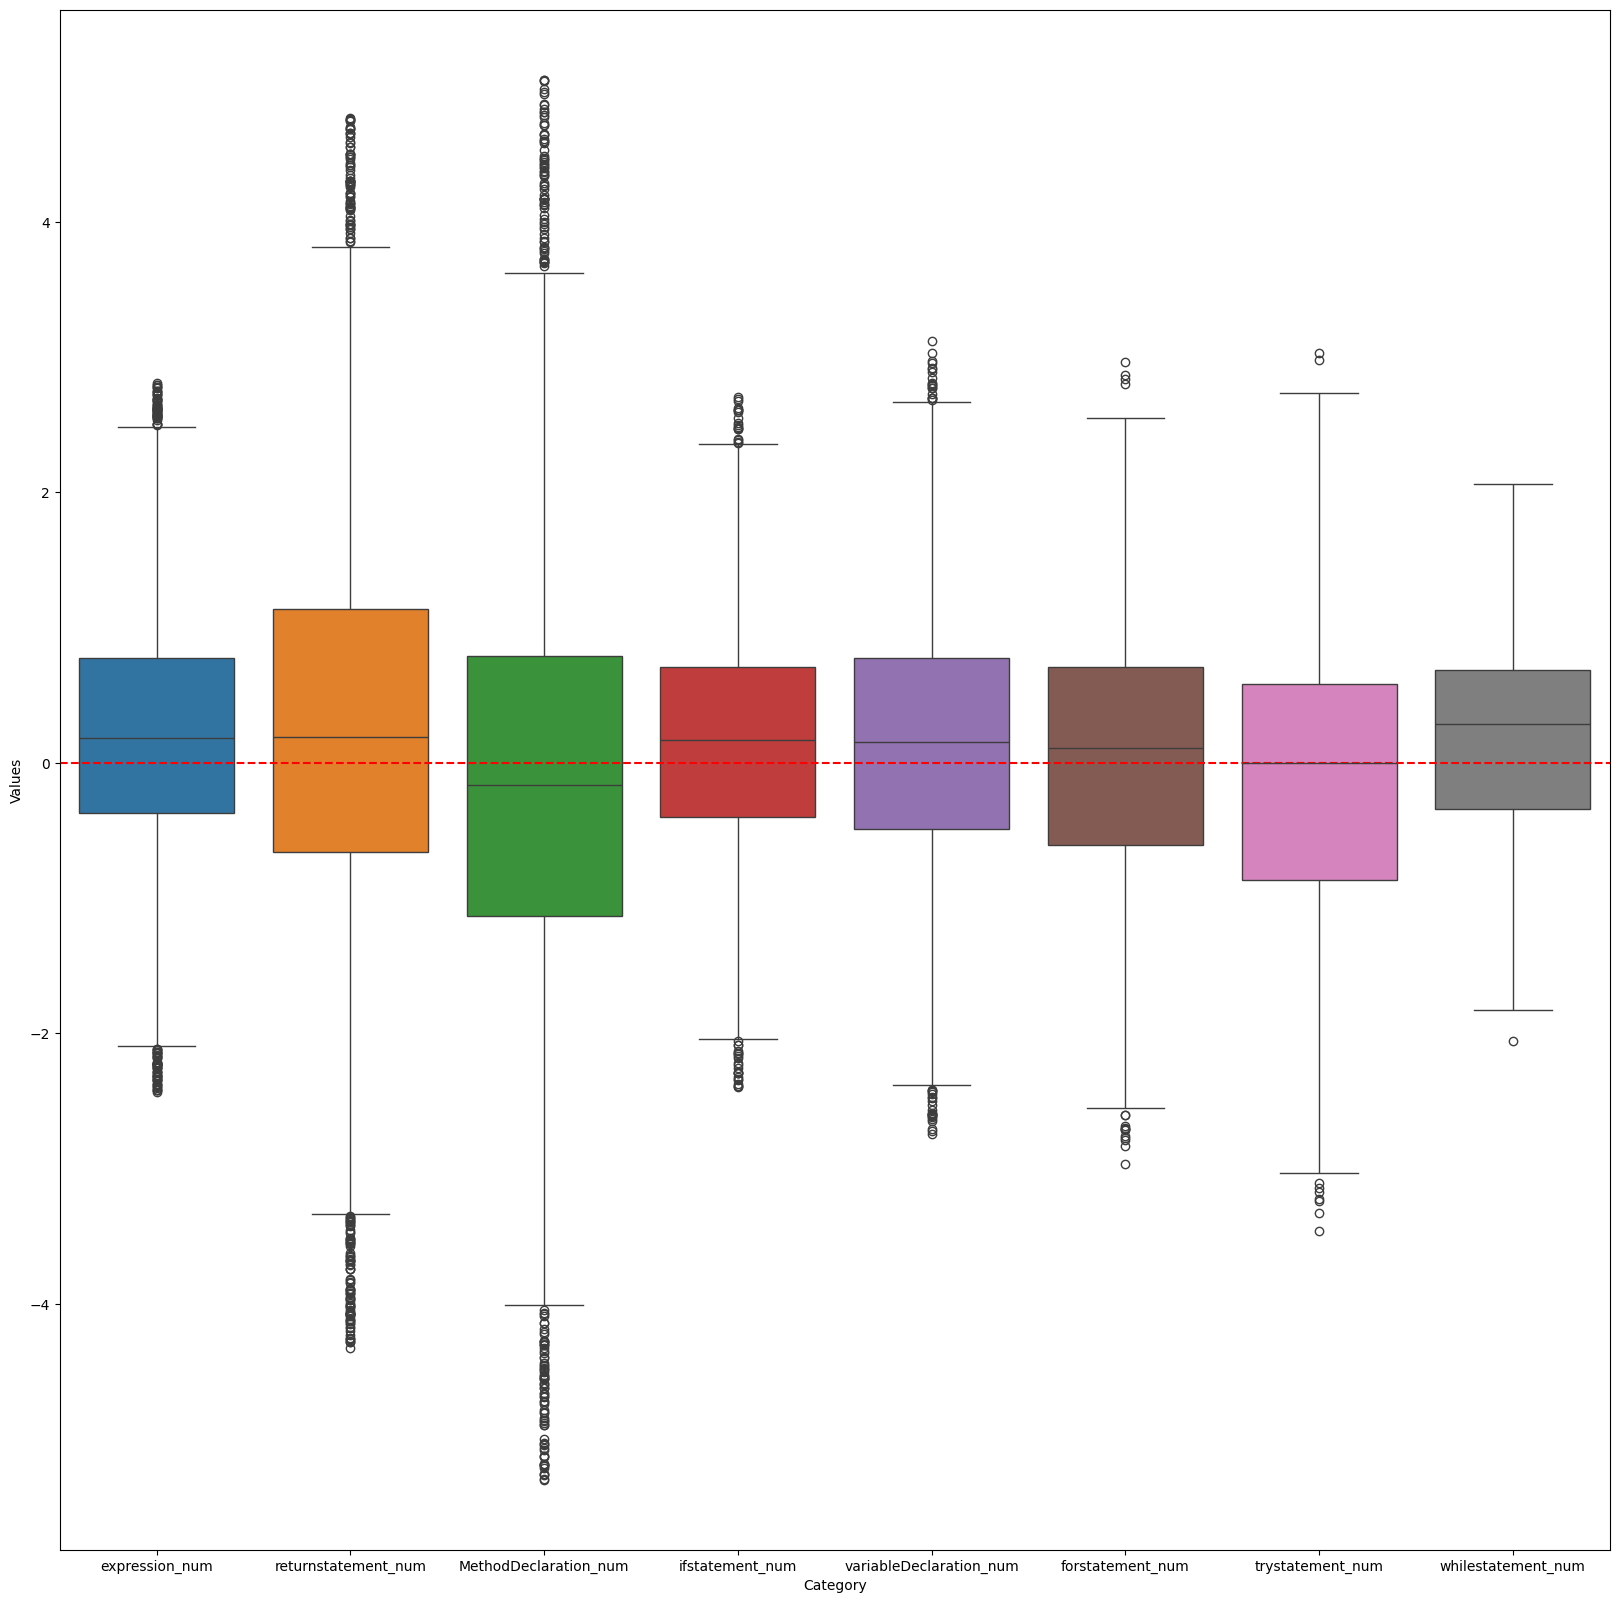

In [291]:
all_colunm_df_for_iqr = all_colunm_df.copy()
all_colunm_df_iqr = iqr_outliers(all_colunm_df_for_iqr)

# 绘制箱线图
plt.figure(figsize=(20, 20))
sns.boxplot(data=all_colunm_df_iqr)

plt.xlabel('Category')
plt.ylabel('Values')
plt.axhline(y=0, color='r', linestyle='--')

plt.show()

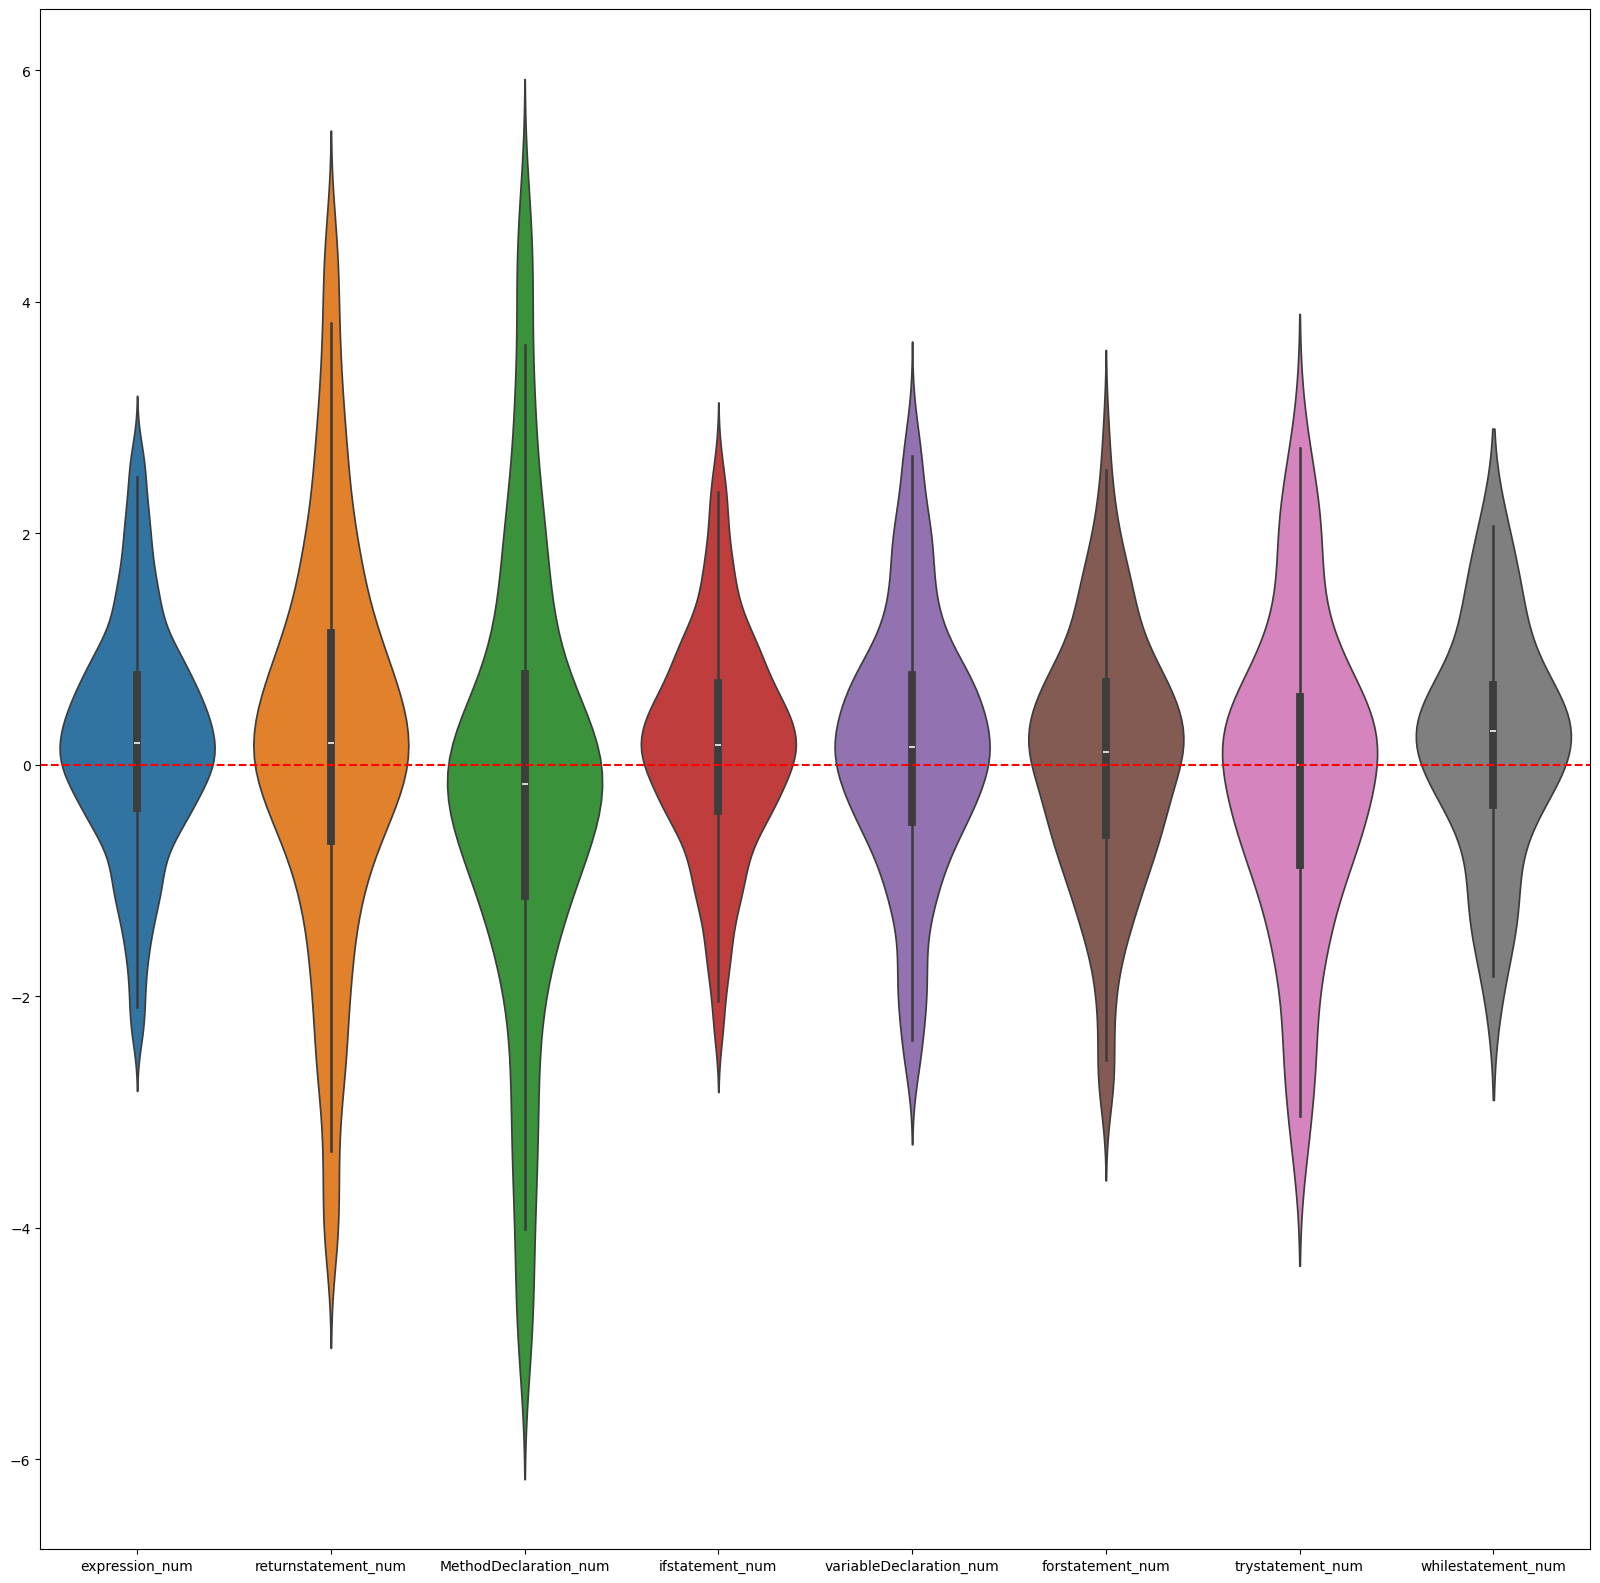

In [292]:
# iqr 小提琴图
plt.figure(figsize=(20,20))
sns.violinplot(data=all_colunm_df_iqr)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

false

In [293]:
linelevel_attribution_false = get_all_colunm_df(linelevel_attribution_false)
linelevel_attribution_false_copy = linelevel_attribution_false.copy()
all_colunm_df = clean_data(linelevel_attribution_false_copy)

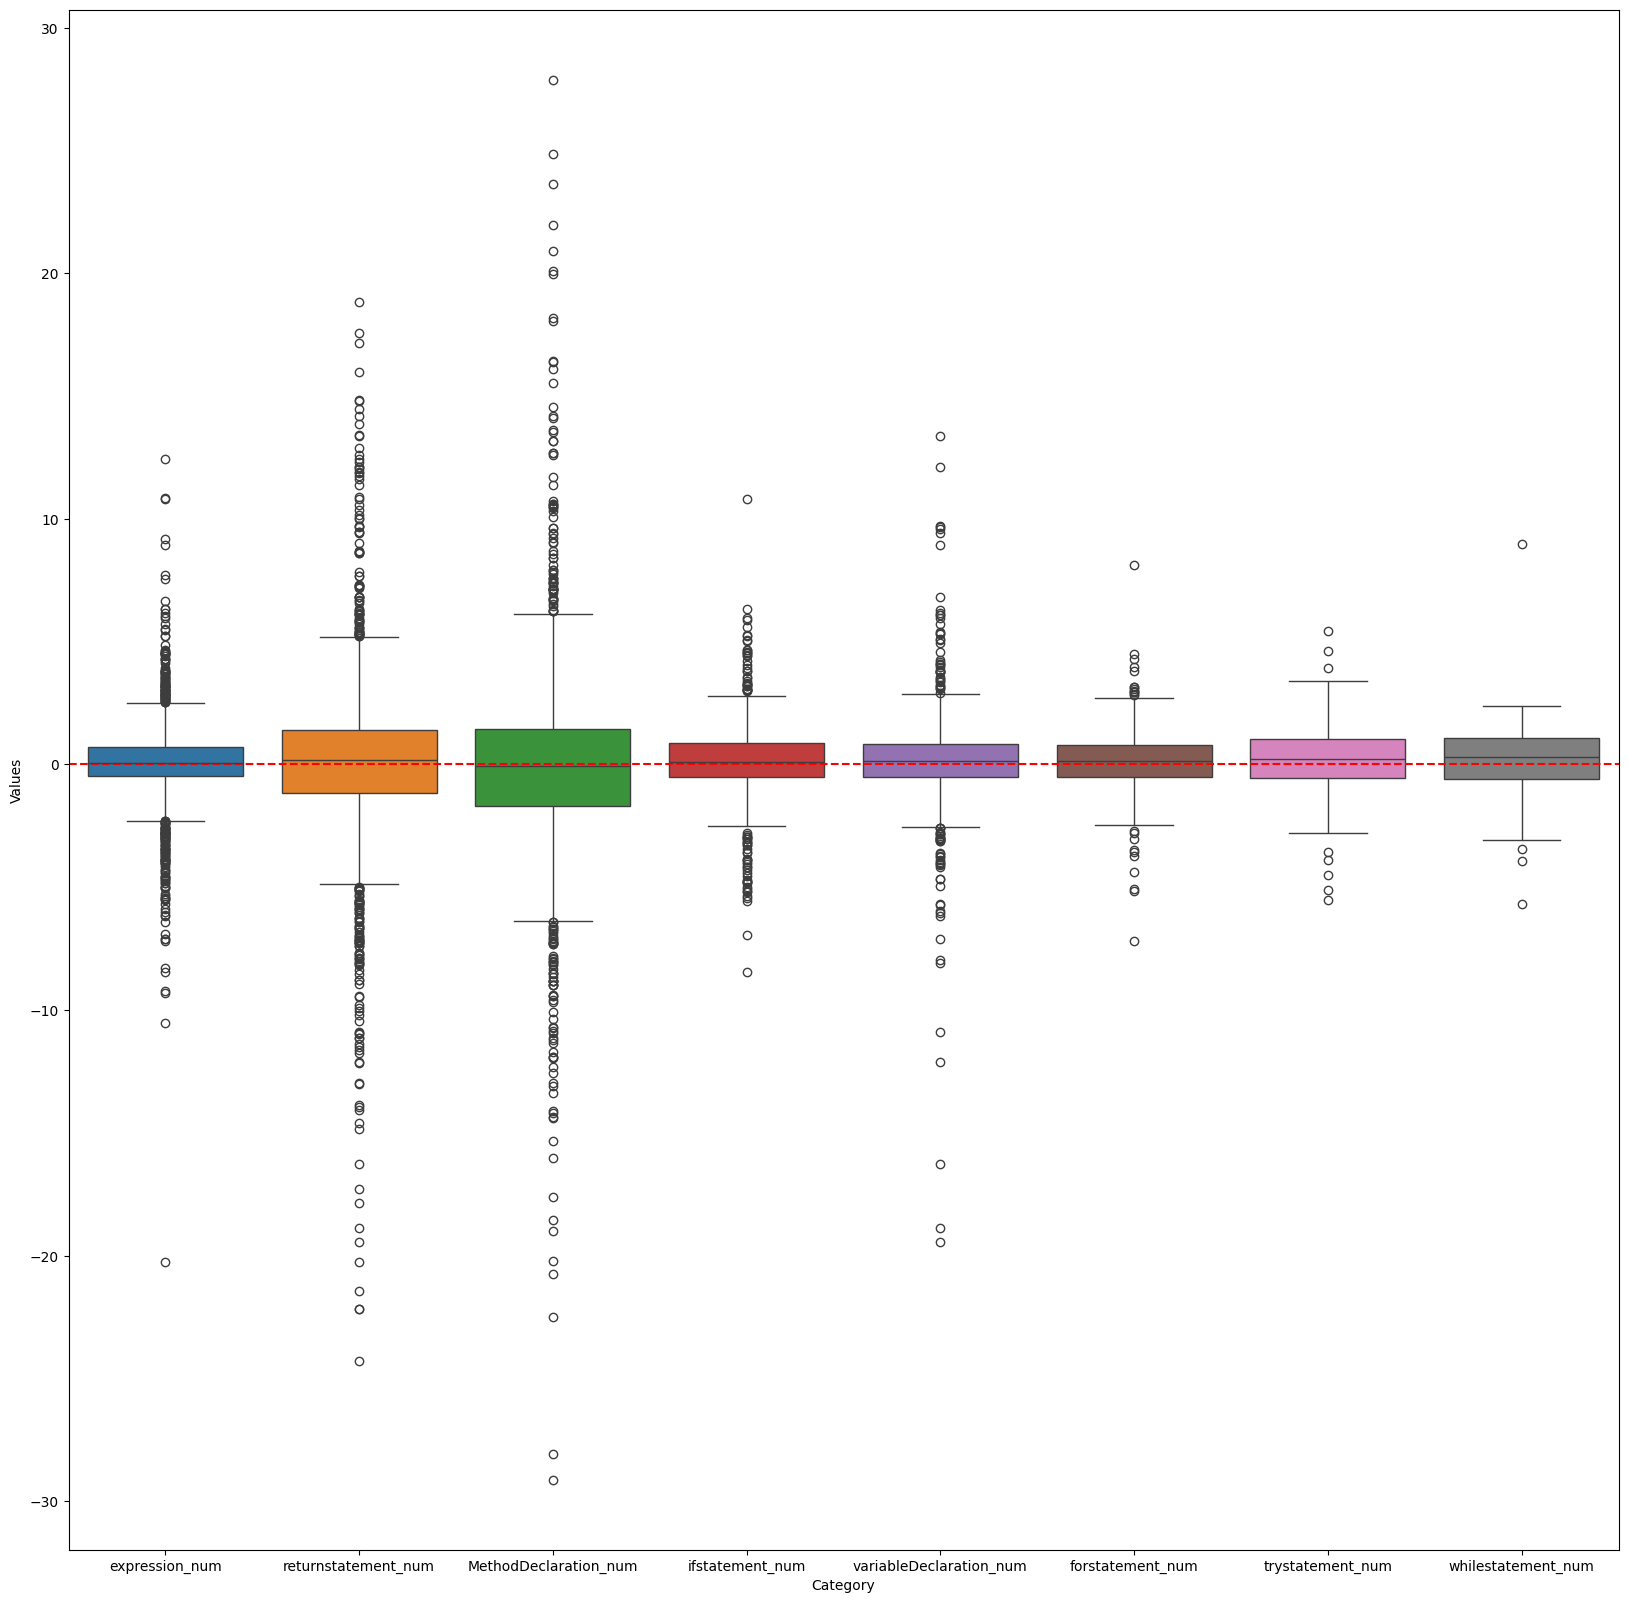

In [294]:
# 绘制箱线图
plt.figure(figsize=(20, 20))
sns.boxplot(data=all_colunm_df)

plt.xlabel('Category')
plt.ylabel('Values')

plt.axhline(y=0, color='r', linestyle='--')
plt.show()

列expression_num的第1个分位数-5.450521511900001,第99个分位数4.9759185793999805
列returnstatement_num的第1个分位数-13.908484556800001,第99个分位数12.374333981600008
列MethodDeclaration_num的第1个分位数-14.739002062800001,第99个分位数16.4044497428
列ifstatement_num的第1个分位数-5.0479301836,第99个分位数5.0315982727999975
列variableDeclaration_num的第1个分位数-7.564630178100001,第99个分位数7.923936659799942
列forstatement_num的第1个分位数-5.059817396,第99个分位数4.296998880000003
列trystatement_num的第1个分位数-5.0409352815999995,第99个分位数4.541694656799997
列whilestatement_num的第1个分位数-5.3025835394000005,第99个分位数7.508544748800007


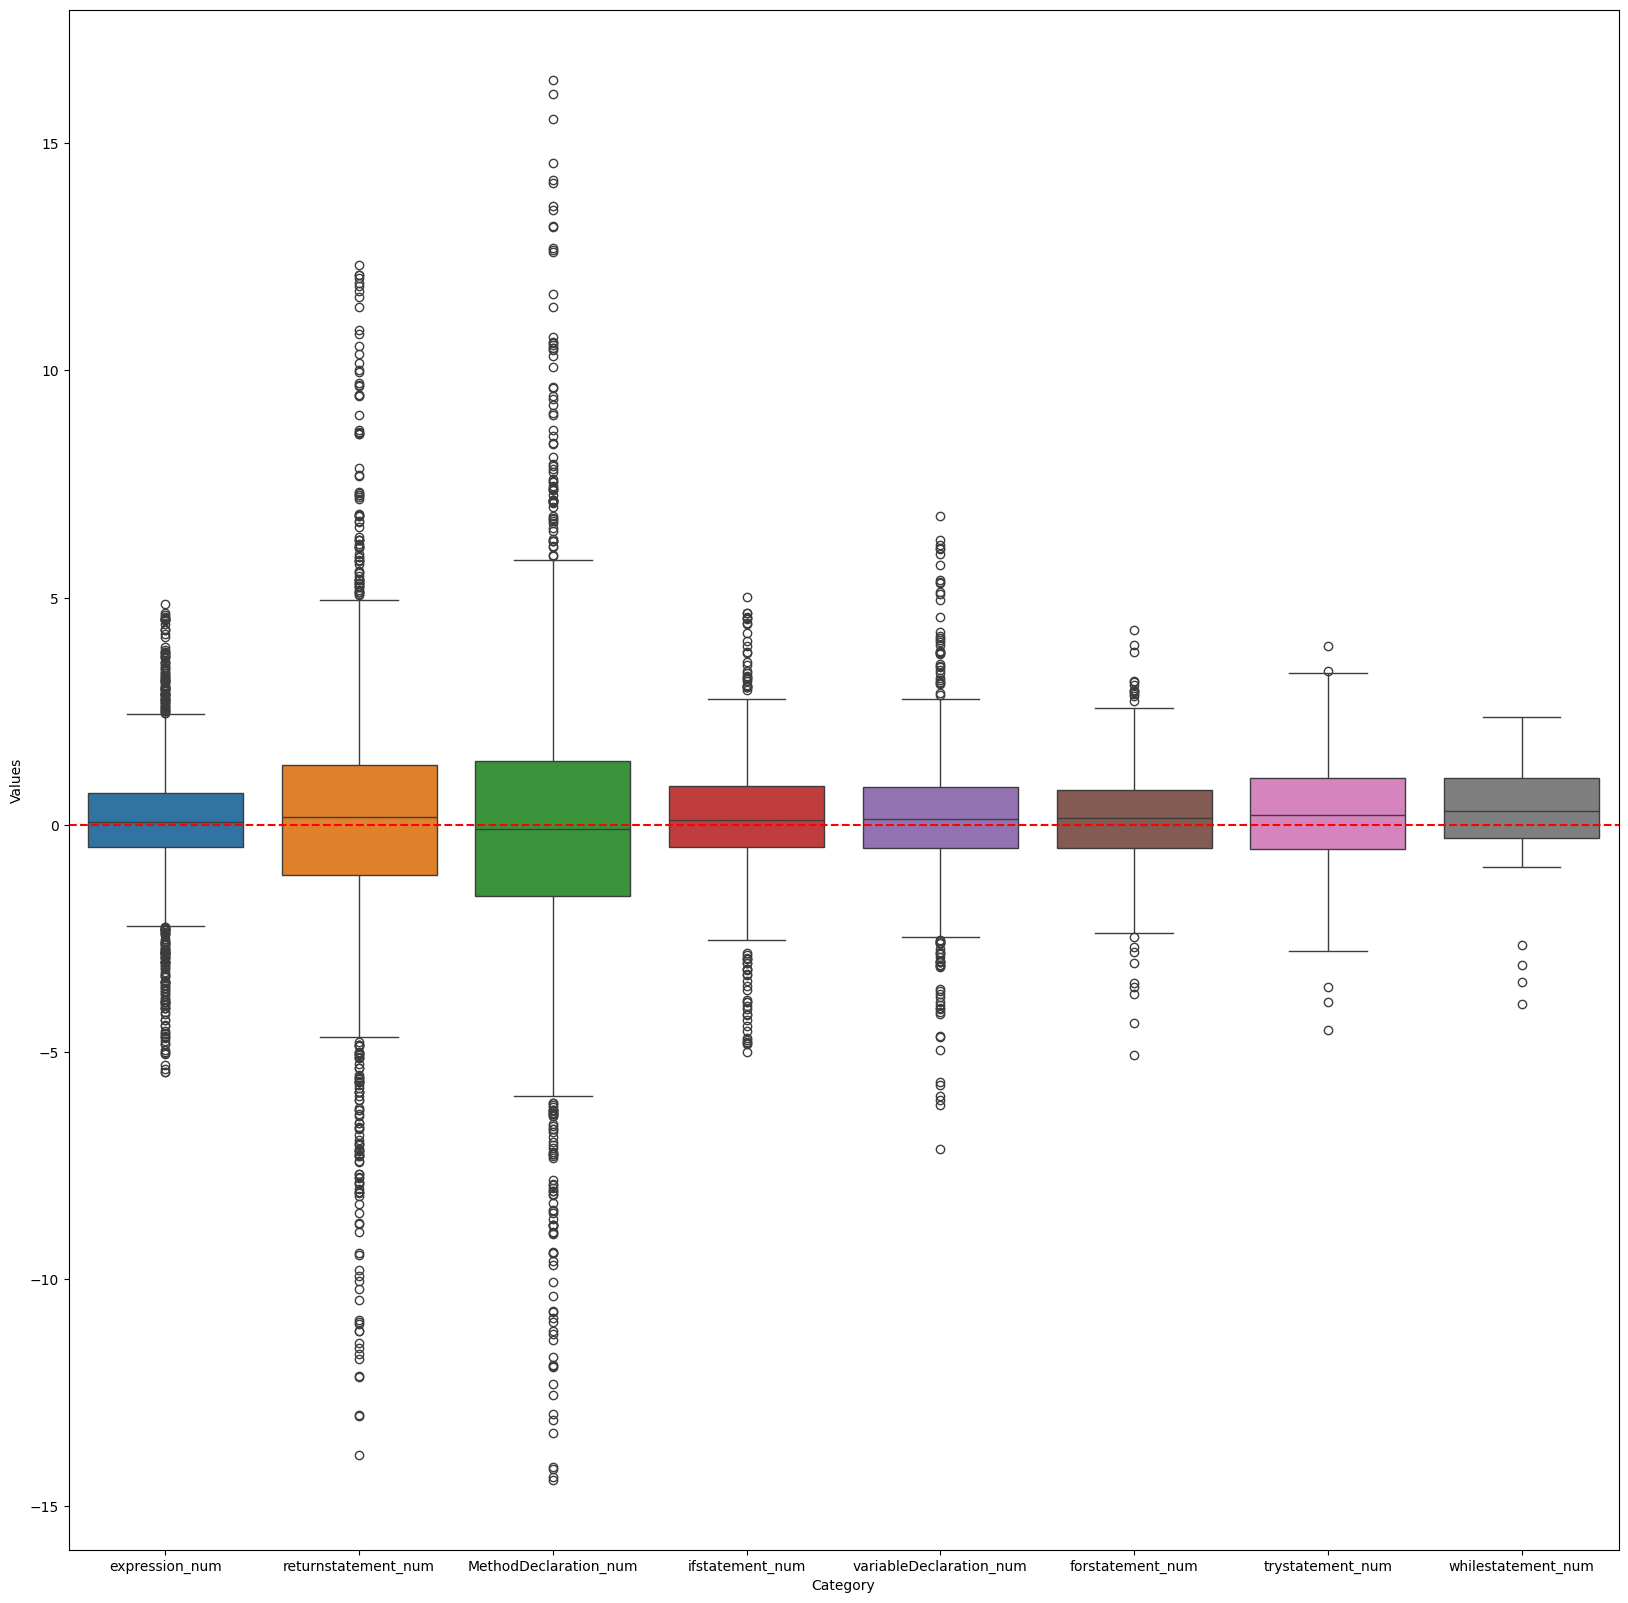

In [295]:
all_colunm_df_for_Winsorization = all_colunm_df.copy()
all_colunm_df_Winsorization = Winsorization_outliers(all_colunm_df_for_Winsorization)

# 绘制箱线图
plt.figure(figsize=(20, 20))
sns.boxplot(data=all_colunm_df_Winsorization)

plt.xlabel('Category')
plt.ylabel('Values')
plt.axhline(y=0, color='r', linestyle='--')

plt.show()

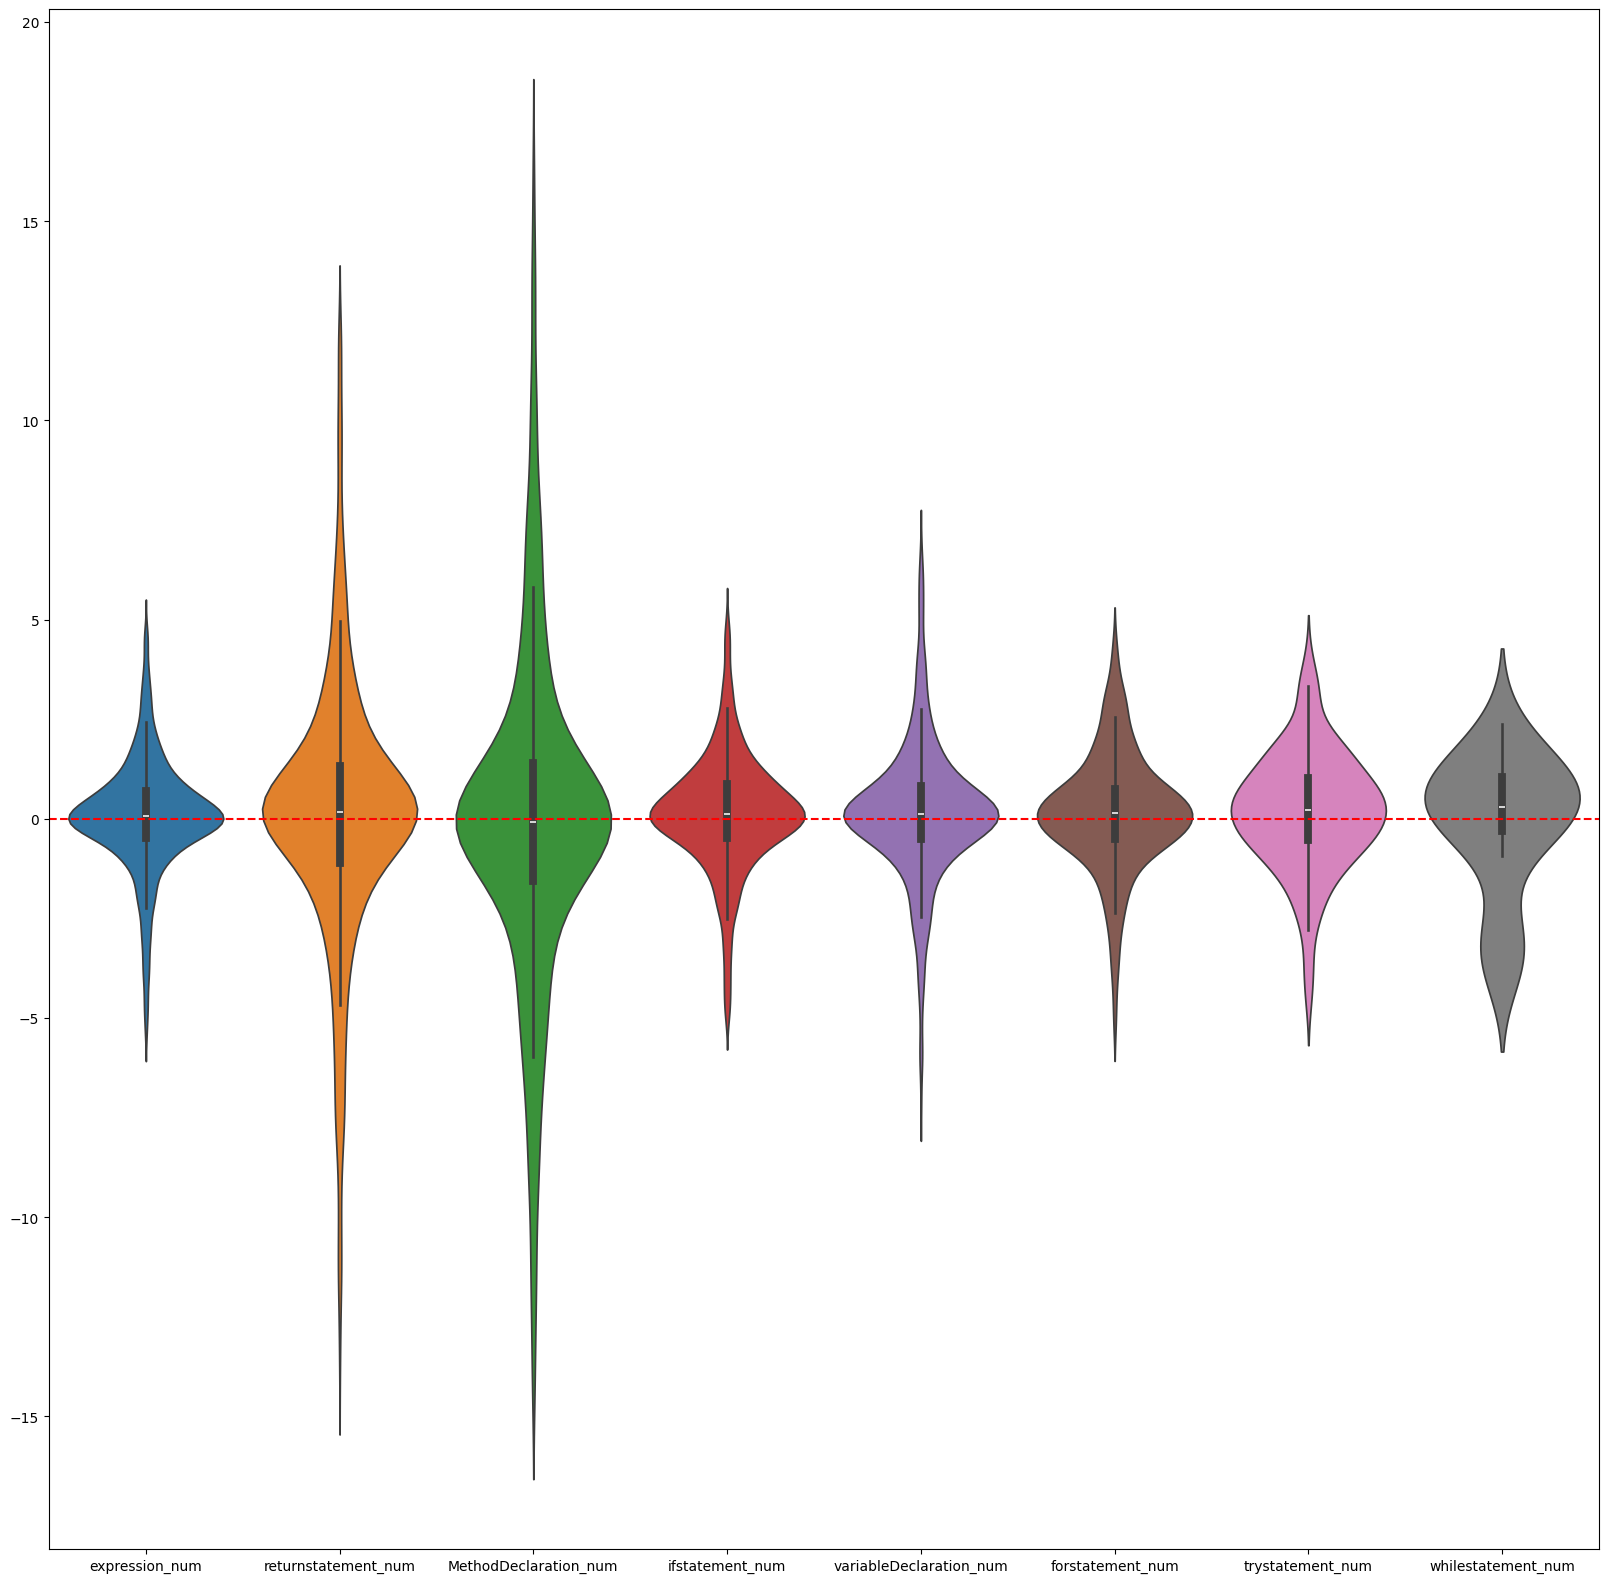

In [296]:
# Winsorization 小提琴图
plt.figure(figsize=(20,20))
sns.violinplot(data=all_colunm_df_Winsorization)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

下四分位数-0.49042171,上四分位数0.7184629450000001,最小值下界-2.3037486925,最大值上界2.5317899275
下四分位数-1.153265,上四分位数1.3848624200000001,最小值下界-4.960456130000001,最大值上界5.192053550000001
下四分位数-1.68399661,上四分位数1.45037152,最小值下界-6.385548804999999,最大值上界6.151923715
下四分位数-0.50416134,上四分位数0.8885790000000001,最小值下界-2.5932718500000003,最大值上界2.9776895100000003
下四分位数-0.5287278925000001,上四分位数0.8358321375000001,最小值下界-2.5755679375000007,最大值上界2.882672182500001
下四分位数-0.5304345825000001,上四分位数0.7831115125,最小值下界-2.500753725,最大值上界2.753430655
下四分位数-0.56428278,上四分位数1.03169069,最小值下界-2.958242985,最大值上界3.425650895
下四分位数-0.607881455,上四分位数1.092668175,最小值下界-3.1587059,最大值上界3.64349262


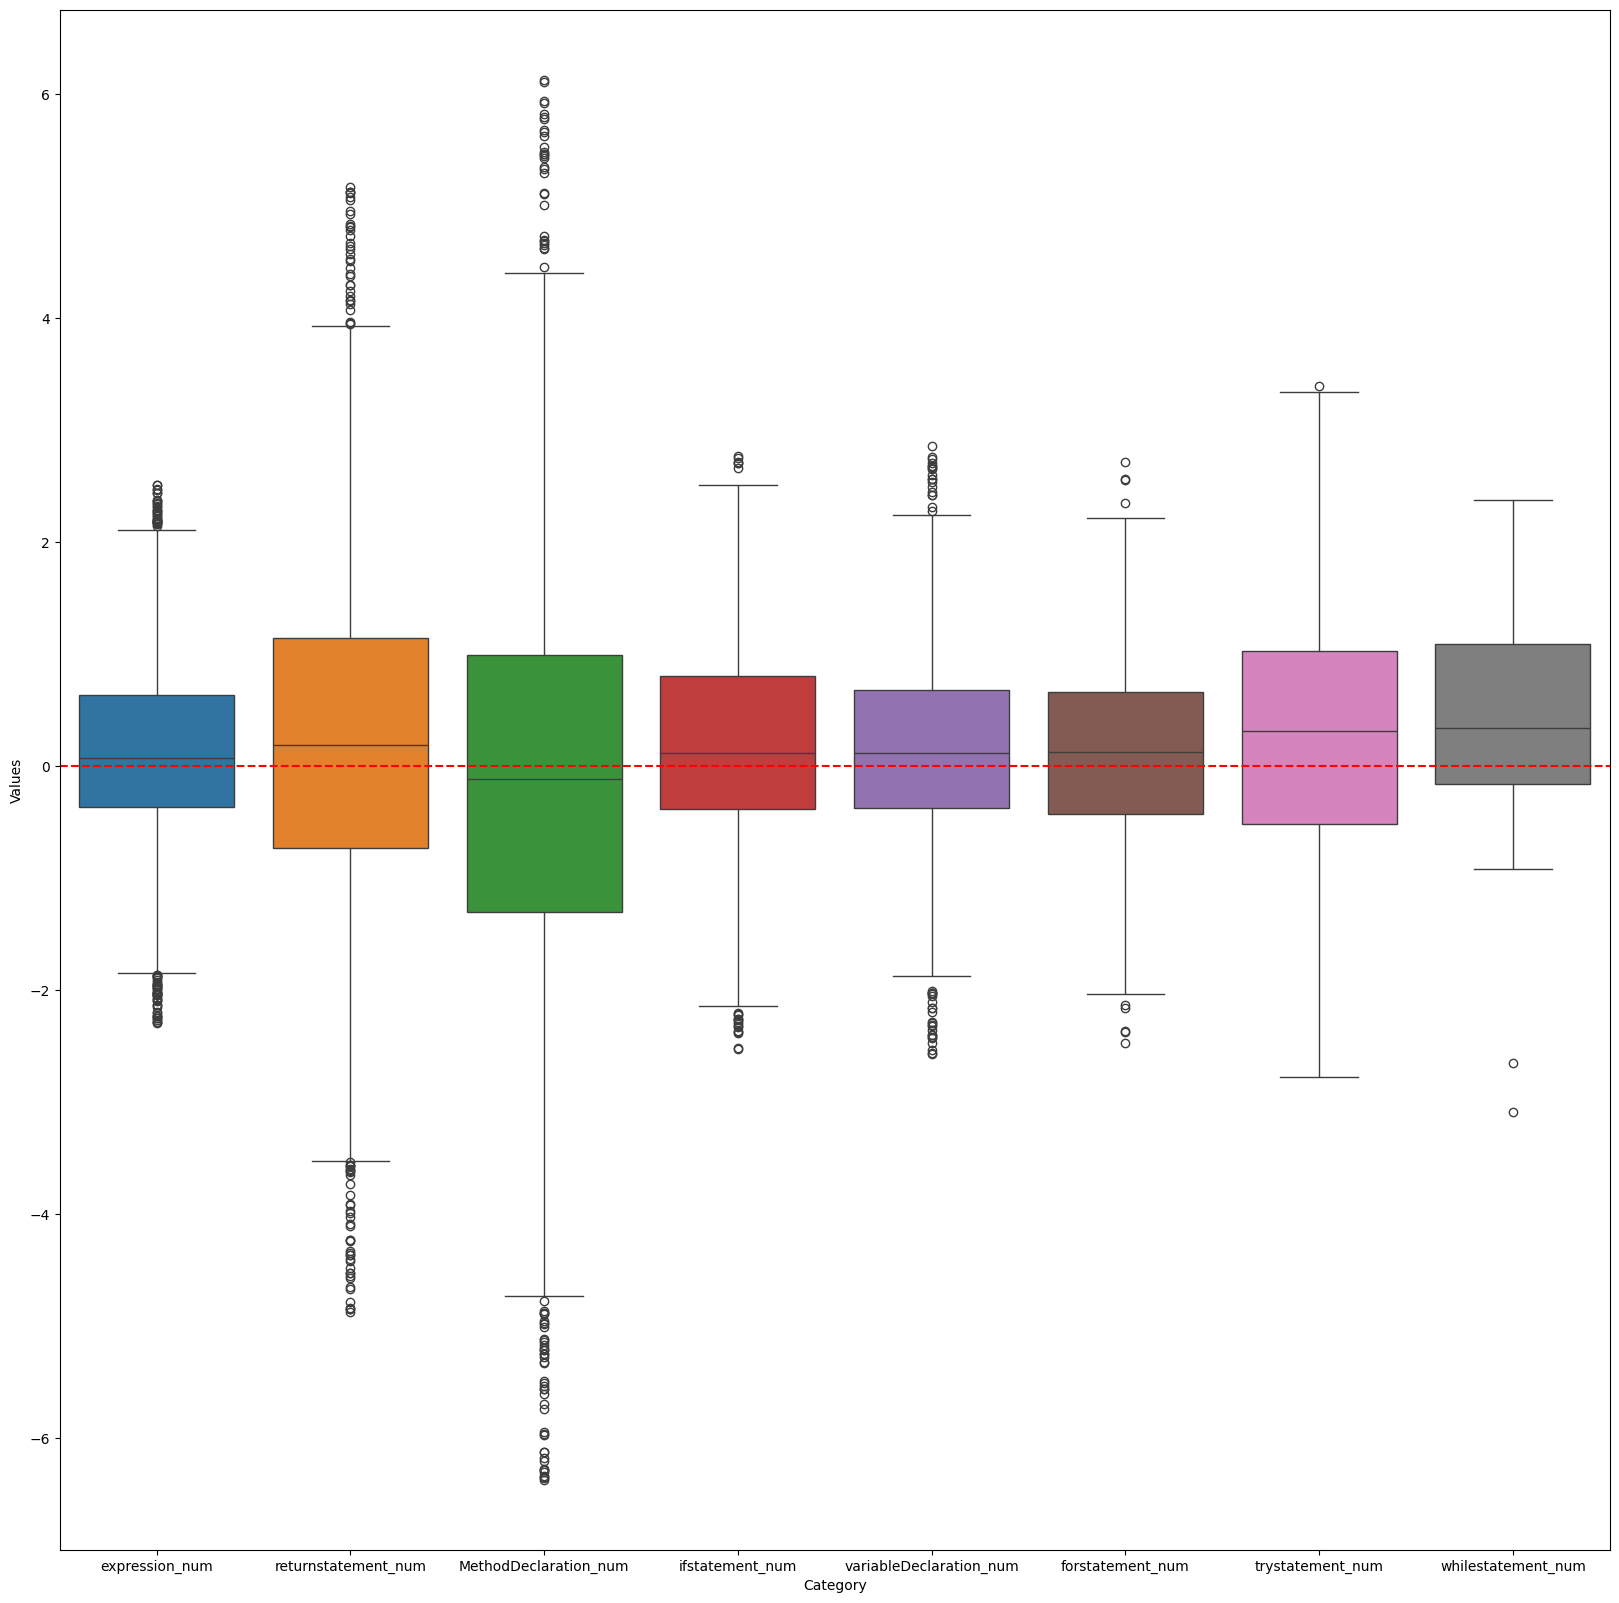

In [297]:
all_colunm_df_for_iqr = all_colunm_df.copy()
all_colunm_df_iqr = iqr_outliers(all_colunm_df_for_iqr)

# 绘制箱线图
plt.figure(figsize=(20, 20))
sns.boxplot(data=all_colunm_df_iqr)

plt.xlabel('Category')
plt.ylabel('Values')
plt.axhline(y=0, color='r', linestyle='--')

plt.show()

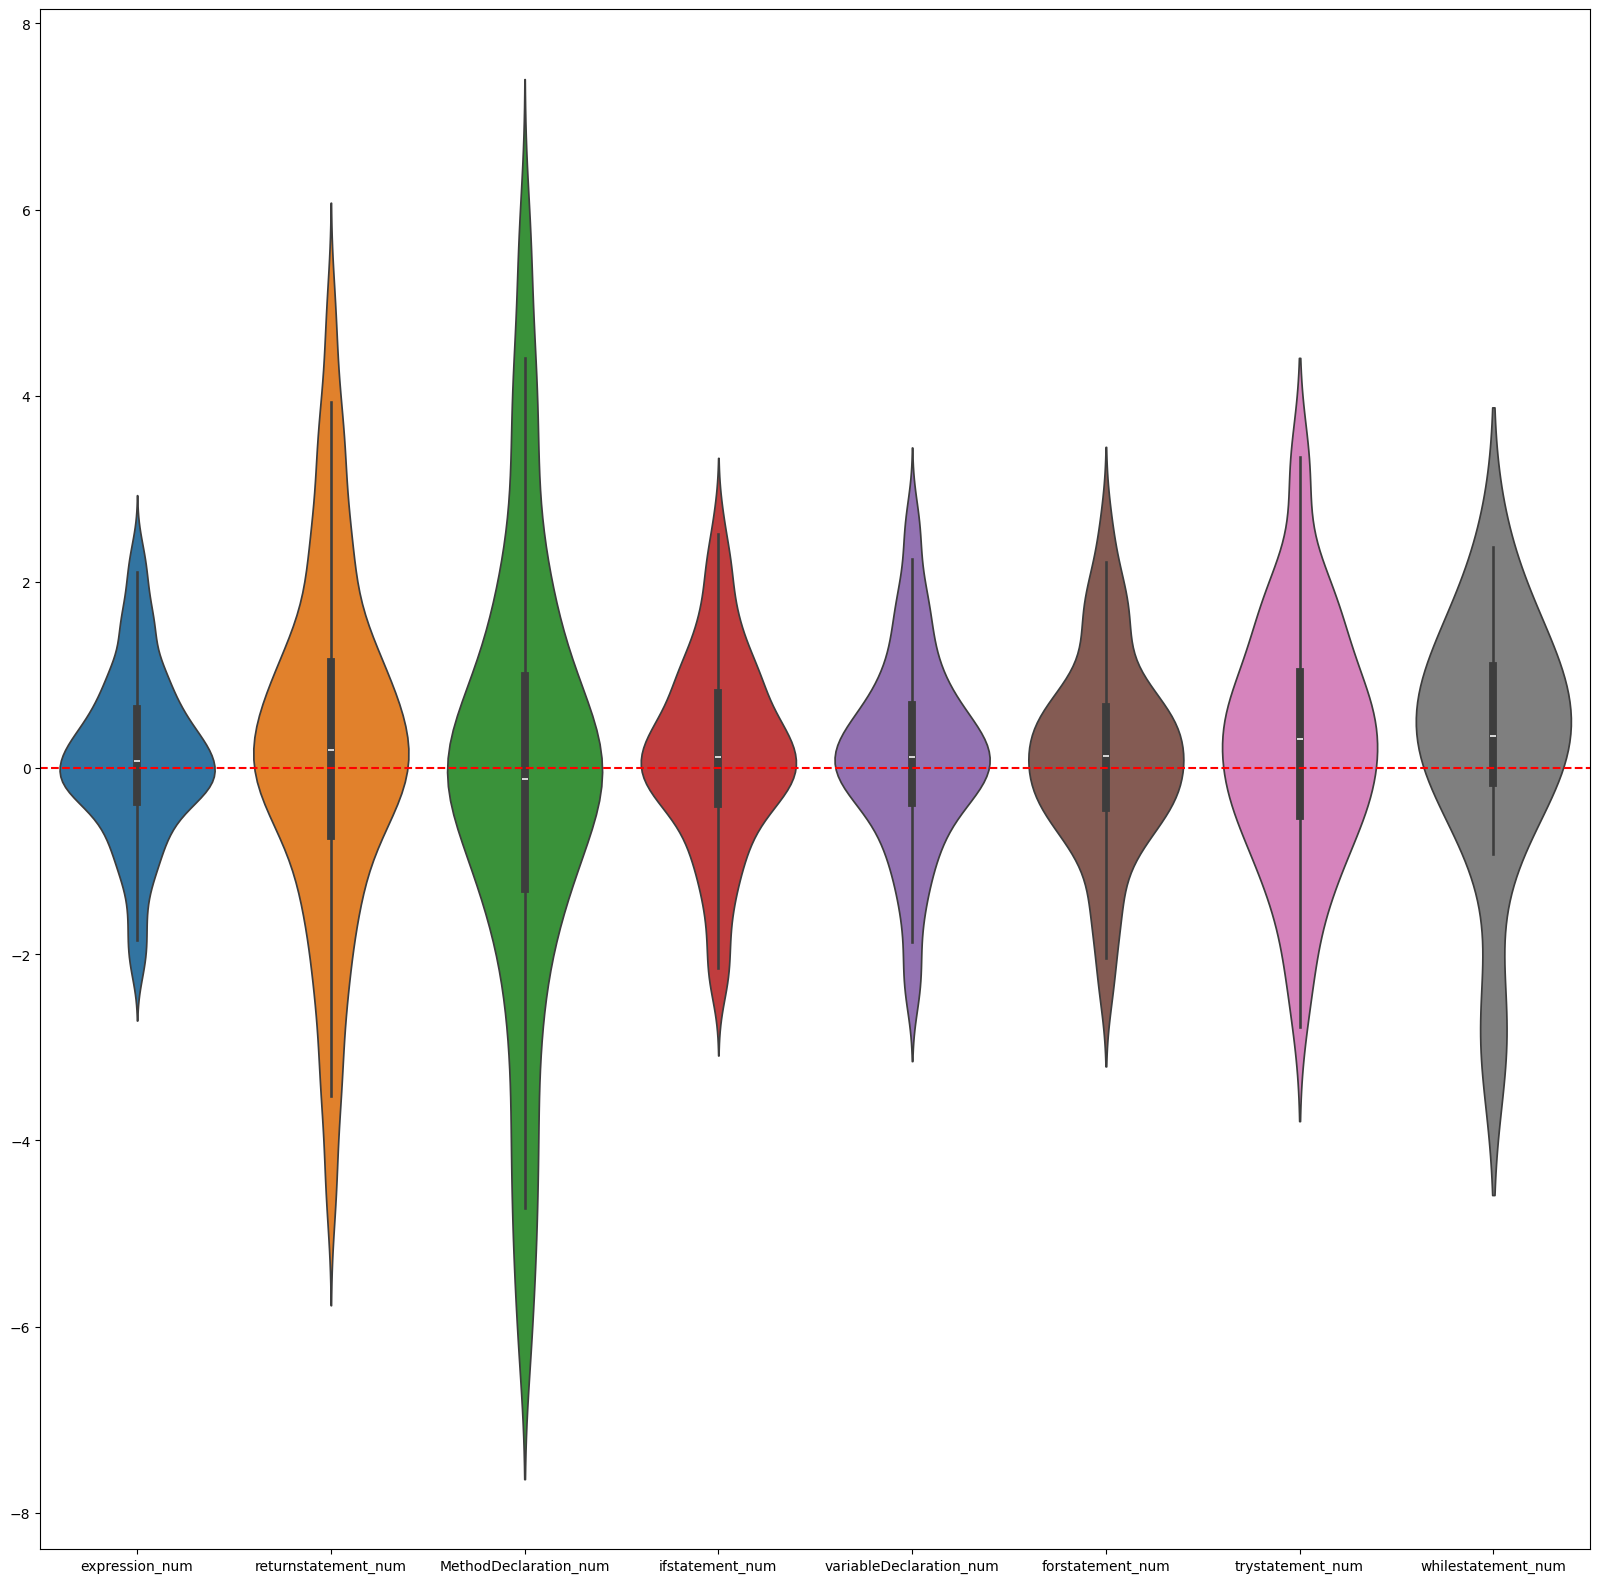

In [298]:
# iqr 小提琴图
plt.figure(figsize=(20,20))
sns.violinplot(data=all_colunm_df_iqr)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()